# **<font color='red'>Final Project of The Course: Machine Learning</font>**

<font color='purple'><strong>Mostafa Kermani Nia</strong></font> : 810101575  
<font color='purple'><strong>Aidin Kazemi</strong></font> : 810101561  
<font color='purple'><strong>Amir Naddaf Fahmideh</strong></font> : 810101540  
<font color='purple'><strong>Taha Majlesi</strong></font> : 810101504  


# **<font color='orange'>PART 1: Reviewing and improving the initial report</font>**

Each of the teammates in this phase read and improved their own part of initial report.

# **<font color='orange'>PART 2: Downloading The Data and Performing Preprocessing, Feature Extraction and Visualization</font>**

### <font color='cyan'>Downloading the data</font>

First we write this code that checks for the existence of a file named `file_flag` in the current directory to determine whether to download and extract a ZIP file.

- If `file_flag` **does not exist**, the script:
  1. Downloads a ZIP file from Google Drive using `gdown`.
  2. Extracts the ZIP file into a temporary directory (`/content/temp`).
  3. Moves the extracted folder from its nested location to `/content`.
  4. Deletes the temporary extraction directory.
  5. Creates an empty `file_flag` file to indicate that the process has already been completed.

- This prevents redundant downloads and extractions unless `file_flag` is manually deleted.

In [ ]:
# Delete "file_flag" in parent folder if you want to change the "if" block
import gdown
import os

if not os.path.exists("file_flag"):
  !gdown 1-EhN3JREEsGvcCj2R5LBJ2eczSPwth7A
  !unzip "/content/HW1_M.zip" -d /content/temp
  !mv  "/content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M" "/content"
  !rm -rf "/content/temp"
  !touch file_flag

Downloading...
From (original): https://drive.google.com/uc?id=1-EhN3JREEsGvcCj2R5LBJ2eczSPwth7A
From (redirected): https://drive.google.com/uc?id=1-EhN3JREEsGvcCj2R5LBJ2eczSPwth7A&confirm=t&uuid=c6f498d2-70f8-4c16-a479-16fef119daaf
To: /content/HW1_M.zip
100% 4.09G/4.09G [00:58<00:00, 69.5MB/s]
Archive:  /content/HW1_M.zip
   creating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/
  inflating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/HW1_Q5_810801072_Male.mp3  
  inflating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/HW1.Q4j.810102087_female.mp3  
  inflating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/HW1_Q3_810103262_male.mp3  
  inflating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/HW1_Q6_810600133_female.mp3  
  inflating: /content/temp/content/drive/MyDrive/ML_final/Copy of Audio_project/HW1_M/HW1_Q4_159403005_male.mp3  
  inflating:

In this phase we write this code snippet that scans the specified folder for audio files with certain extensions and counts the number of files found.

- It imports the `os` and `glob` modules for file handling.
- The variable `audio_folder_path` stores the path to the folder containing audio files.
- A tuple `audio_extensions` defines the allowed audio formats (`.mp3`, `.wav`, `.flac`, `.aac`).
- The `glob.glob()` function retrieves all files in the folder, and the list comprehension filters them based on their extensions.
- The total number of matching audio files is printed.
- A debug section (commented out) allows printing the list of detected audio files if needed.

In [ ]:
import os
import glob

# Define the path to the folder containing audio files
audio_folder_path = '/content/HW1_M'

# Define allowed audio file extensions
audio_extensions = ('.mp3', '.wav', '.flac', '.aac')

# Get the list of all audio files in the specified folder
raw_audio_files = [
    file for file in glob.glob(os.path.join(audio_folder_path, '*'))
    if file.lower().endswith(audio_extensions)
]

print(f"The number of filtered audio files: {len(raw_audio_files)}")

# Uncomment for debug
# print("Found filtered audio files:")
# for file in raw_audio_files:
#     print(file)

The number of filtered audio files: 822


Here, we categorize a list of audio file names based on gender. First, we initialize two empty lists: `male_list` for files containing `"male"` and `female_list` for files containing `"female"`. Then, we iterate through `raw_audio_files`, convert each name to lowercase for case-insensitive matching, and append it to the appropriate list. Finally, we print the count of male and female files. Debugging lines are available but commented out for optional inspection.

In [ ]:
# Lists to store categorized strings
male_list = []
female_list = []

# Categorizing based on the presence of 'male' or 'female'
for string in raw_audio_files:
    lower_string = string.lower()
    if "female" in lower_string:
        female_list.append(string)
    elif "male" in lower_string:
        male_list.append(string)

print(f"male num: {len(male_list)}")
print(f"female num: {len(female_list)}")

# Uncomment for debug: Output results
# print("Male list:", male_list)
# print("Female list:", female_list)

male num: 592
female num: 190


Here, we aim to create a balanced dataset for classification, ensuring that female samples make up at least **25%** of the total. Since there were too few female speakers, we decided to take an equal number of male and female samples.  

- We take **380 samples (190 male + 190 female)**.  
- We use `random.sample()` to randomly pick **190 male** and **190 female** samples.  
- Then, we **shuffle** the list with `random.shuffle()` to ensure randomness before further processing.  
- Finally, we print the dataset size to confirm the selection.

In [ ]:
import random

random.seed(42)  # Set random seed for reproducibility

gender_audio_files = random.sample(male_list, k=190) + random.sample(female_list, k=190)

random.shuffle(gender_audio_files)

print(len(gender_audio_files))

380


Here, we split the `gender_audio_files` list into training and testing sets. First, we calculate the threshold by taking 75% of the total files. Then, we assign the first 75% of the list to `train_audio_files` and the remaining 25% to `test_audio_files`. Finally, we print the number of files in each set.

In [ ]:
threshold = int(0.75 * len(gender_audio_files))

train_audio_files = gender_audio_files[:threshold]

test_audio_files = gender_audio_files[threshold:]

print(f"train_len: {len(train_audio_files)}, test_len: {len(test_audio_files)}")

train_len: 285, test_len: 95


Here, we carefully structure the dataset to ensure a balanced distribution for identity classification.  

First, we split the `gender_audio_files` list into training and testing sets. We calculate the threshold as **75% of the total files**, assigning the first 75% to `train_audio_files` and the remaining 25% to `test_audio_files`. This split ensures enough data for training while reserving unseen samples for evaluation.  

Now, we focus on **student selection and dataset balancing**. Since we need a well-structured dataset, we intentionally arrange all questions of each individual sequentially and separate male and female files. This allows us to later form three **symmetrical identity groups**, making classification more reliable.  

To achieve this, we extract **9-digit student IDs** from filenames using regex. We maintain a dictionary where each key is a student ID and the value is a list of that student's filenames. After extracting IDs, we shuffle them randomly to **avoid biases** in selection.  

Next, we select **9 students per gender**, ensuring that each has exactly **7 files**. This guarantees uniform data distribution across individuals. Once we reach 9 students for both males and females, we combine their data into `selected_files_by_id`, forming a **balanced** dataset.  

Finally, debug lines are included but commented out, allowing an optional check of the final selection if needed.

In [ ]:
import re
import random

def extract_and_select_students(filenames):
    id_to_files = {}

    # Store filenames for each student ID
    for file in filenames:
        pattern = r'[/_](\d{9})[/_]'  # Match 9-digit student IDs between / or _
        match = re.findall(pattern, file)
        if match:
            student_id = match[0]
            if student_id not in id_to_files:
                id_to_files[student_id] = []
            id_to_files[student_id].append(file)

    # Shuffle student IDs to randomize selection
    shuffled_ids = list(id_to_files.keys())
    random.shuffle(shuffled_ids)

    # Select 9 students who have 7 files
    selected_students = {}
    for student_id in shuffled_ids:
        if len(id_to_files[student_id]) == 7:
            selected_students[student_id] = id_to_files[student_id]
            if len(selected_students) == 9:
                break  # Stop when we reach 18 students

    return selected_students

# Example usage
selected_files_by_id_male = extract_and_select_students(male_list)
selected_files_by_id_female = extract_and_select_students(female_list)

selected_files_by_id = []
for val in list(selected_files_by_id_male.values()) + list(selected_files_by_id_female.values()):
  selected_files_by_id = selected_files_by_id + val

# Uncomment for detailed output
# for file in selected_files_by_id:
#     print(file)

### <font color='cyan'>Performing Preprocessing</font>

#### Noise Reduction

Based on the structure of this project, since we are working with audio recordings of speakers, mostly recorded at home, we are likely to encounter stationary background noises (e.g., laptop fan noise). To address this, we start with Spectral Subtraction to remove stationary noise. Following that, we apply a bandpass filter to isolate the frequency range of human speech.

This is the implementation of spectral subtraction. For the noise sample, we use an innovative method where we trim the silent parts of the audio. Any constant noise will be present in these silent parts, so they work well as a noise sample. We then use this sample in our denoising function.

The details of implementation are as follows:

First, we check if the `"noise_flag"` file exists to determine whether `noisereduce` is already installed. If not, we install it and create the flag file to avoid redundant installations.  

Next, we define `spectral_subtraction_with_dynamic_noise`, a function that removes background noise using spectral subtraction.  

1. **Identify Noise Segments:**  
   - We detect silent regions in the audio using `librosa.effects.split()`, which finds intervals where the amplitude is below `silence_threshold` (default `-40 dB`).  
   - If a segment is at least `100ms` long, we consider it a potential noise sample.  
   - We collect these segments until they reach `max_noise_duration` (default `1 second`).  

2. **Construct the Noise Sample:**  
   - If noise segments exist, we concatenate them into a single noise sample.  
   - If no valid noise is found, we use an array of zeros as a fallback.  

3. **Apply Spectral Subtraction:**  
   - We pass the original signal and the extracted noise sample to `nr.reduce_noise()`, which removes the estimated noise.  

Finally, the function returns the **denoised signal**, ensuring cleaner audio for further processing.

In [ ]:
if not os.path.exists("noise_flag"):
  !pip install noisereduce
  !touch noise_flag

import librosa
import noisereduce as nr
import numpy as np

# Extract silence-based noise and apply spectral subtraction
def spectral_subtraction_with_dynamic_noise(y, sr, max_noise_duration=1.0, silence_threshold=-40):

    # Identify silence regions
    intervals = librosa.effects.split(y, top_db=abs(silence_threshold))
    noise_segments = []

    for start, end in intervals:
        # Check if the segment qualifies as "silent" (low amplitude)
        if end - start >= sr * 0.1:  # At least 100ms
            noise_segments.append(y[start:end])
            if sum(len(seg) for seg in noise_segments) >= sr * max_noise_duration:
                break

    # Combine all silence segments into a single noise sample
    if noise_segments:
        noise_sample = np.concatenate(noise_segments[:min(int(sr * max_noise_duration),len(noise_segments))])
    else:
        noise_sample = np.zeros(int(sr * max_noise_duration))  # Fallback in case no noise found

    # Apply spectral subtraction
    denoised_signal = nr.reduce_noise(y=y, sr=sr, y_noise=noise_sample)

    return denoised_signal  # Return only the processed audio

Now, we design a **bandpass filter** to retain frequencies within a specific range. First, we calculate the **Nyquist frequency** (half of `sr`) and normalize the cutoff frequencies. Then, we create a **Butterworth filter** using `butter()`, specifying the order and frequency range. Finally, we apply the filter with `lfilter()`, allowing only the desired frequencies to pass through.

In [ ]:
from scipy.signal import butter, lfilter

def bandpass_filter(signal, lowcut, highcut, sr, order=6):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

#### Resampling the signal

Here, we resample audio to a **target sampling rate** (default `44100 Hz`). If the original rate matches the target, we return the signal as is. Otherwise, we use `librosa.resample()` to adjust the sampling rate.

In [ ]:
def resample_audio(y, sr, target_sr=44100):
    if sr == target_sr:  # Skip resampling if already at target rate
        return y

    return librosa.resample(y, orig_sr=sr, target_sr=target_sr)  # Resample audio

####Silence Trimming

In this section, we remove **leading and trailing silence** from the audio. Using `librosa.effects.trim()`, we detect and trim low-amplitude regions below `top_db` (default `20 dB`), then return the cleaned signal.

In [ ]:
def trim_audio(y, sr, top_db=20):
    trimmed_signal, _ = librosa.effects.trim(y, top_db=top_db)  # Trim silence
    return trimmed_signal

#### Normalization

Here, we **normalize** the audio to scale its amplitude between `-1` and `1`, ensuring consistent volume levels. This helps in reducing variations caused by different recording conditions.

In [ ]:
def normalize_audio(y):
    return librosa.util.normalize(y)

#### Load And Trim

Using this function we trim an audio file, **keeping only the most informative part** based on spectral centroid analysis. The goal is to **reduce data size** while preserving a valuable signal portion, thereby decreasing computation time and resource usage.

**Implementation Details:**

1. **Load the Audio:**  
   - The function reads an audio file using `librosa.load()`, preserving its original sampling rate (`sr=None`).

2. **Check Duration:**  
   - If the audio is **shorter than the required duration (`needed_dur`)**, it is returned as is.

3. **Compute Spectral Centroid:**  
   - The **spectral centroid** represents the "center of mass" of the spectrum, often correlating with perceived brightness or energy of the sound.  
   - Using `librosa.feature.spectral_centroid()`, we extract the centroid for each frame.

4. **Find the Most Energetic Segment:**  
   - We determine the **timestamp of the highest spectral centroid**, assuming this corresponds to the most **informative** or **energetic** part of the signal.
   - The timestamp is converted to a **sample index**.

5. **Extract a Fixed-Length Segment Around the Centroid:**  
   - A window of `needed_dur` seconds is defined around the centroid, ensuring the extracted segment is centered around the most energetic region.  
   - Edge cases are handled:
     - If the centroid is **too close to the beginning**, the segment extends forward.
     - If it's **near the end**, the segment shifts backward to maintain the exact required duration.

6. **Return the Trimmed Audio:**  
   - The extracted segment, now **focused on the most relevant part of the audio**, is returned along with the sampling rate.

This ensures that the retained portion is **dense with meaningful acoustic features**, making further processing more effective.

In [ ]:
import librosa
import numpy as np
import os

def trim_audio_to_spectral_centroid(file, needed_dur=30):
    # Load audio file
    y, sr = librosa.load(file, sr=None)

    # Calculate duration in seconds
    duration = len(y) / sr

    # If audio is shorter than needed duration, return as is
    if duration < needed_dur:
        return y, sr

    # Compute spectral centroid
    centroid_frames = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Convert centroid from frames to time
    times = librosa.times_like(centroid_frames, sr=sr)

    # Find the frame index of the max centroid (most "energetic" part)
    centroid_time = times[np.argmax(centroid_frames)]

    # Convert centroid time to sample index
    centroid_index = int(centroid_time * sr)

    # Define start and end indices for a needed_dur-second segment
    segment_length = needed_dur * sr  # Needed duration in samples
    half_segment = segment_length // 2

    # Handle edge cases where centroid is near the beginning or end
    start_idx = max(0, centroid_index - half_segment)
    end_idx = min(len(y), centroid_index + half_segment)

    # Ensure extracted segment is exactly needed_dur seconds
    if start_idx == 0:
        end_idx = min(len(y), end_idx + abs(centroid_index - half_segment))
    if end_idx == len(y):
        start_idx = max(0, start_idx - abs(centroid_index + half_segment - len(y)))

    # Extract the segment
    y_trimmed = y[start_idx:end_idx]

    return y_trimmed, sr


#### <font color='cyab'>Full Preprocess Pipeline</font>

Using this function, we preprocess audio through multiple steps. First, we extract a **30s** segment around the most energetic part using spectral centroid. Then, we remove background noise with spectral subtraction. Next, we apply a **bandpass filter (80-5000 Hz)** to retain speech frequencies. After that, we resample to **44.1kHz** for consistency. We then trim any remaining silence and normalize the amplitude. Finally, the processed file is saved, and the new signal is returned.

In [ ]:
import soundfile as sf

preprocessed_files = []

def preprocess(file, save_dir="processed_audio"):
    target_sr = 44100

    y, sr = trim_audio_to_spectral_centroid(file, needed_dur=30)  # Load and trim audio
    y_denoised = spectral_subtraction_with_dynamic_noise(y, sr)  # Noise reduction
    filtered_y = bandpass_filter(y_denoised, 80, 5000, sr)  # Speech: 80-5000 Hz
    resampled_y = resample_audio(filtered_y, sr, target_sr=target_sr)  # Resample to 44.8kHz
    trimmed_y = trim_audio(resampled_y, 25)  # Trim silence
    normalized_y = normalize_audio(trimmed_y)  # Normalize amplitude

    # Define save path
    file_name = os.path.basename(file)
    file_name = "modified_" + file_name
    save_path = os.path.join(save_dir, file_name)

    preprocessed_files.append(save_path)

    # Save normalized audio
    sf.write(save_path, normalized_y, target_sr)

    return normalized_y , target_sr

### <font color='cyan'>Feature Selection</font>

#### Fundamental Frequency (F0)
F0 is the lowest frequency of a speech signal, related to vocal cord vibrations. Males typically have lower F0 (85–180 Hz) than females (165–255 Hz), making it crucial for **gender classification**. It also helps in **speaker identification** by capturing individual pitch variations.

In [ ]:
import tensorflow as tf

def compute_f0(y, sr, fmin=50, fmax=500):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute F0 using YIN
    f0 = librosa.yin(y.numpy(), fmin=fmin, fmax=fmax, sr=sr)

    return f0

#### MFCC (Mel-Frequency Cepstral Coefficients)
MFCCs represent the spectral envelope of speech, mimicking human auditory perception. They are the most effective features for **speaker identification**, encoding vocal tract characteristics. In **gender classification**, they capture articulation and frequency distribution differences.  

We extract the **fundamental frequency (F0)** using the YIN algorithm. First, we convert the signal to a TensorFlow tensor and ensure it's **mono** by averaging channels if needed. Then, we compute F0 within the given frequency range (`50-500 Hz`), which helps in analyzing pitch variations.

In [ ]:
def compute_mfcc(y, sr, n_mfcc=13):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Convert to NumPy array to ensure compatibility with librosa
    y_np = y.numpy()

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y_np, sr=sr, n_mfcc=n_mfcc)

    return mfccs


#### Spectral Centroid
Spectral centroid measures the brightness of a voice. Female voices usually have a higher centroid due to higher frequency content. It helps in **gender classification** and **speaker identification** by distinguishing vocal timbre.  

To compute the **spectral centroid**, representing the center of mass of the spectrum, we convert the signal to a TensorFlow tensor and ensure it's **mono** if needed. Then, we extract the spectral centroid, which helps in analyzing the **brightness** or **energy distribution** of the sound.

In [ ]:
def compute_spectral_centroid(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y.numpy(), sr=sr)

    return spectral_centroid

#### Spectral Flux
Spectral flux tracks changes in spectral energy across frames, reflecting speech dynamics. It aids in **speaker identification** by capturing articulation style and rhythm, while in **gender classification**, it helps differentiate speech energy transitions between males and females.  

Here, we compute **spectral flux**. First, we convert the signal to a TensorFlow tensor and ensure it's **mono** if needed. Then, we compute the **short-time Fourier transform (STFT)**, calculate the difference between consecutive frames, and sum the squared differences to capture **temporal spectral variations**.

In [ ]:
def compute_spectral_flux(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute spectral flux
    stft = np.abs(librosa.stft(y=y.numpy()))
    spectral_flux = np.sqrt(np.sum(np.diff(stft, axis=1) ** 2, axis=0))

    return spectral_flux

#### Spectral Bandwidth  

**Spectral bandwidth** measures the spread of frequencies around the spectral centroid, indicating how concentrated or dispersed the frequency content is.  

In **gender classification**, male voices typically have a lower spectral bandwidth due to their dominant lower frequencies, while female voices tend to have a broader bandwidth. In **speaker identification**, spectral bandwidth helps differentiate speakers based on their articulation and vocal tone characteristics.  

First, the signal is converted to a TensorFlow tensor and reduced to **mono** if it has multiple channels. Then, `librosa.feature.spectral_bandwidth()` is used to calculate the **spread of frequencies** around the spectral centroid, providing insights into how concentrated or dispersed the spectral content is.

In [ ]:
def compute_spectral_bandwidth(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y.numpy(), sr=sr)

    return spectral_bandwidth

#### Spectral Contrast  

**Spectral contrast** measures the difference in amplitude between peaks and valleys of the frequency spectrum, highlighting variations in timbre and tone.  

In **gender classification**, female voices tend to have higher spectral contrast due to greater formant dispersion, while male voices often exhibit lower contrast. In **speaker identification**, spectral contrast helps differentiate speakers based on vocal clarity and articulation patterns.  

The signal is first converted to a TensorFlow tensor and reduced to **mono** if it has multiple channels. Then, `librosa.feature.spectral_contrast()` is used to compute the **difference between peaks and valleys** in the frequency spectrum across `n_bands` frequency bands, helping to capture **tonal characteristics** and **harmonic richness** of the audio.

In [ ]:
def compute_spectral_contrast(y, sr, n_bands=6):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y.numpy(), sr=sr, n_bands=n_bands)

    return spectral_contrast

#### Zero-Crossing Rate (ZCR)  

**Zero-crossing rate (ZCR)** measures how frequently a signal changes sign, indicating the rate of amplitude transitions. It is widely used in speech and music analysis to distinguish between voiced and unvoiced sounds.  

In **gender classification**, male voices tend to have lower ZCR due to smoother waveforms, while female voices often exhibit higher ZCR due to higher frequency components. In **speaker identification**, ZCR helps differentiate speakers based on articulation style and speech dynamics.

To implement this, the signal is first converted to a TensorFlow tensor and reduced to **mono** if it has multiple channels. Then, `librosa.feature.zero_crossing_rate()` calculates the **rate at which the signal changes sign**, capturing information about the **noisiness** or **percussiveness** of the sound.

In [ ]:
def compute_zcr(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute zero-crossing rate
    zcr = librosa.feature.zero_crossing_rate(y=y.numpy())

    return zcr

#### Jitter  

**Jitter** quantifies the irregularity in fundamental frequency variations, indicating vocal stability. It is useful in **gender classification** (lower in males, slightly higher in females) and **speaker identification** by capturing voice steadiness.  

We first convert the signal to a TensorFlow tensor and reduced to **mono** if needed. `librosa.yin()` extracts the **fundamental frequency (F0)** across time. Then, jitter is computed as the **average absolute deviation of consecutive F0 values**, normalized by the previous value, which helps in analyzing **voice stability and irregularities** in pitch.


In [ ]:
def compute_jitter(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Extract F0 using librosa
    f0 = librosa.yin(y=y.numpy(), fmin=50, fmax=sr//2, sr=sr)

    # Compute jitter as the average absolute F0 deviation
    jitter = np.mean(np.abs(np.diff(f0)) / f0[:-1])

    return jitter

#### Shimmer  

**Shimmer** quantifies the irregularity in amplitude variations, indicating voice strength and stability. It is used in **gender classification** (higher in females due to softer phonation) and **speaker identification** by analyzing vocal amplitude fluctuations.  

Again at the first step, the signal is converted to a TensorFlow tensor and reduced to **mono** if needed. Short-term energy is computed using `librosa.feature.rms()` with **30ms frames** and a **50% hop length**. Shimmer is then calculated as the **average absolute deviation of consecutive energy values**, normalized by the previous value, which helps in analyzing **amplitude variations and vocal stability**.

In [ ]:
def compute_shimmer(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute short-term energy
    frame_length = int(sr * 0.03)  # 30ms frames
    hop_length = frame_length // 2
    energy = librosa.feature.rms(y=y.numpy(), frame_length=frame_length, hop_length=hop_length)[0]

    # Compute shimmer as the average absolute energy deviation
    shimmer = np.mean(np.abs(np.diff(energy)) / energy[:-1])

    return shimmer

#### Energy  

**Energy** represents the total power of an audio signal, calculated as the sum of squared amplitudes over time. It indicates the intensity and loudness of speech or sound.  

In **gender classification**, male voices typically have higher energy due to stronger vocal cord vibrations, while female voices tend to have lower overall energy. In **speaker identification**, energy helps distinguish speakers based on their speaking style, vocal effort, and articulation strength.  

In this section also, the signal is converted to a TensorFlow tensor and reduced to **mono** if needed. Energy is then computed as the **sum of squared amplitudes** of the signal, representing the **overall power** or **intensity** of the audio.

In [ ]:
def compute_energy(y, sr):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute energy as sum of squared amplitudes
    energy = tf.reduce_sum(tf.square(y))

    return energy.numpy()

#### Log Mel Spectrogram  

**Log Mel Spectrogram** represents the frequency content of a signal over time using the Mel scale, which aligns with human auditory perception. The logarithmic transformation enhances perceptual differences in amplitude.  

In **gender classification**, it captures differences in vocal tract characteristics, pitch distribution, and formant structures between male and female voices. In **speaker identification**, it provides a rich time-frequency representation, making it useful for distinguishing individual speech patterns and timbres.  

The signal is converted to a TensorFlow tensor and reduced to **mono** if needed. A **Mel spectrogram** with `n_mels` filters is computed using `librosa.feature.melspectrogram()`, capturing frequency content in a perceptually relevant scale. The result is then converted to **log scale** using `librosa.power_to_db()`, making variations in amplitude more distinguishable.

In [ ]:
def compute_log_mel_spectrogram(y, sr, n_mels=128):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y.numpy(), sr=sr, n_mels=n_mels)

    # Convert to log scale
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    return log_mel_spectrogram

#### Chroma Features  

**Chroma features** represent the distribution of energy across the 12 pitch classes (C, C#, D, ..., B) and capture harmonic and melodic characteristics of a signal.  

In **gender classification**, differences in harmonic structures between male and female voices can be reflected in chroma patterns. In **speaker identification**, chroma features help distinguish individuals based on their vocal timbre and pitch tendencies.  

ّIn this section as well, the signal is converted to a TensorFlow tensor and reduced to **mono** if needed. `librosa.feature.chroma_stft()` computes **chroma features**, representing the **distribution of pitch classes (12 semitones)** over time, which helps in analyzing **musical and harmonic content**.

In [ ]:
def compute_chroma_features(y, sr, n_chroma=12):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Compute chroma features
    chroma = librosa.feature.chroma_stft(y=y.numpy(), sr=sr, n_chroma=n_chroma)

    return chroma

#### Student ID

A regex pattern is used to extract a **9-digit student ID** from the filename, assuming it appears between `/` or `_`. `re.findall()` searches for matches, and if found, the first match is returned. If no match exists, `None` is returned.

In [ ]:
def find_sid(file):
  pattern = r'[/_](\d{9})[/_]'  # Match 9-digit student IDs between / or _
  match = re.findall(pattern, file)
  if match:
      return match[0]
  else:
    return None

#### Question Number

Same as SID, we just look for q num this time.

In [ ]:
def find_qnum(file):
  pattern = r'[/_](q\d{1})[/_]'  # Find question number
  match = re.findall(pattern, file.lower())
  if match:
      return match[0]
  else:
    return None

#### Gender

The filename is converted to **lowercase** for case-insensitive matching. If `"female"` is found in the string, `"female"` is returned; if `"male"` is found, `"male"` is returned.

In [ ]:
def find_gender(file):
  lower_string = file.lower()
  if "female" in lower_string:
      return "female"
  elif "male" in lower_string:
      return "male"

#### <font color='cyab'>Feature Selection Pipeline</font>

This function is designed to extract, process, and reduce audio features while maintaining **computational efficiency and meaningful representation**. The goal is to **reduce the dimensionality of raw extracted features** while ensuring that key information relevant to **speaker and gender classification** is retained.  

**Feature Selection Strategy:**

Each extracted feature can be either a **1D vector** (e.g., fundamental frequency) or a **2D matrix** (e.g., MFCC, chroma). Expanding all features without reduction would result in **5343 features**, which is computationally expensive.  
To address this:  
- If we take only the **mean** of each feature’s dimensions, it would reduce the feature count to **173**, but this might result in the **loss of fine details**.  
- Instead, we **retain at most 15 dimensions per feature**, leading to a **final representation of 60 features**, striking a balance between **informativeness and computational efficiency**.

**Implementation Details:**

1. **Preprocessing the Audio Signal:**  
   - The signal is first **converted to a TensorFlow tensor** for compatibility with deep learning workflows.  
   - If the audio is **multi-channel (stereo)**, it is converted to **mono** by averaging across channels.  

2. **Extracting Features:**  
   - The function computes **various acoustic and statistical features**, categorized as:  
     - **Pitch-based features:**  
       - **Fundamental frequency (F0)** using the YIN algorithm.  
     - **Spectral features:**  
       - **Spectral centroid:** Center of spectral energy distribution.  
       - **Spectral bandwidth:** Spread of frequencies around the centroid.  
       - **Spectral contrast:** Difference between spectral peaks and valleys.  
       - **Spectral flux:** Changes in spectral energy over time.  
       - **Zero-crossing rate (ZCR):** Rate at which the waveform changes sign.  
     - **Energy and amplitude-based features:**  
       - **Energy:** Sum of squared amplitude values.  
       - **Jitter:** Variation in fundamental frequency, useful for **voice quality analysis**.  
       - **Shimmer:** Variation in amplitude, indicating **vocal stability**.  
     - **Mel-frequency-based features:**  
       - **MFCC (Mel-frequency cepstral coefficients):** Captures short-term spectral characteristics of speech.  
       - **Log Mel spectrogram:** Represents frequency content in a **perceptually relevant scale**.  
       - **Chroma features:** Distribution of energy across **12 pitch classes**.  
     - **Metadata features:**  
       - **Student ID (sid)** extracted from filename.  
       - **Question number (qnum)** from filename.  
       - **Gender classification** (based on filename).  

3. **Dimensionality Reduction:**  
   - For **1D features** (e.g., spectral centroid, F0):  
     - The **mean** and **standard deviation** are computed to capture overall distribution.  
   - For **2D matrix features** (e.g., MFCC, chroma, log-mel spectrogram, spectral contrast):  
     - The **mean across time** is computed for each dimension.  
     - Up to **15 dimensions per feature** are retained (based on `max_dims`), ensuring a **consistent feature size**.  
   - For **scalar metadata** (e.g., gender, student ID, question number), values are stored as they are.  

4. **Final Output:**  
   - A **dictionary of reduced features** is returned, ensuring that all feature vectors have a **fixed dimensionality**.  


In [ ]:
import numpy as np
import tensorflow as tf

def extract_features(file, y, sr, keep_ratio=0.25, max_dims=15):
    # Convert to TensorFlow tensor
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert stereo/multi-channel to mono if needed
    if len(y.shape) > 1:
        y = tf.reduce_mean(y, axis=-1)

    # Extract all features
    raw_features = {
        "fundamental_frequency": compute_f0(y, sr),
        "mfcc": compute_mfcc(y, sr),
        "spectral_centroid": compute_spectral_centroid(y, sr),
        "spectral_flux": compute_spectral_flux(y, sr),
        "spectral_bandwidth": compute_spectral_bandwidth(y, sr),
        "zero_crossing_rate": compute_zcr(y, sr),
        "jitter": compute_jitter(y, sr),
        "shimmer": compute_shimmer(y, sr),
        "energy": compute_energy(y, sr),
        "log_mel_spectrogram": compute_log_mel_spectrogram(y, sr),
        "chroma_features": compute_chroma_features(y, sr),
        "spectral_contrast": compute_spectral_contrast(y, sr),
        "sid": find_sid(file),
        "qnum": find_qnum(file),
        "gender": find_gender(file)
    }

    # Reduce vector-based features properly
    reduced_features = {}

    for key, value in raw_features.items():
        if isinstance(value, np.ndarray) or isinstance(value, list):  # Check if feature is a vector
            value = np.array(value)  # Ensure NumPy format
            if value.ndim == 1:  # 1D Vector (e.g., F0, spectral features)
                reduced_features[f"{key}_mean"] = np.mean(value)
                reduced_features[f"{key}_std"] = np.std(value)
            elif value.ndim == 2:  # 2D Matrix (e.g., MFCC, log-mel, chroma, contrast)
                mean_values = np.mean(value, axis=1)  # Compute mean across the time axis
                num_dims = mean_values.shape[0]

                # Determine the number of dimensions to retain
                selected_dims = min(max_dims, num_dims)  # Ensure it does not exceed the total available dimensions

                selected_values = mean_values[:selected_dims]  # Select the first selected_dims values
                for i, v in enumerate(selected_values):
                    reduced_features[f"{key}_{i}"] = v  # Store each dimension separately
        else:
            reduced_features[key] = value  # Keep scalar values as they are

    return reduced_features


### <font color='cyan'>Preprocess and Feature selection concatination</font>

#### Concat Function

To implement this function, we ensure the existence of directories for **processed audio** and **CSV storage**. An empty DataFrame is initialized to store extracted features. For each file in `files_list`, we **preprocess the audio**, extract its **features**, and convert the feature dictionary into a DataFrame row. The row is appended to the main DataFrame, which is then saved as a **CSV file** in the specified directory.

In [ ]:
import os
import pandas as pd

def preprocess_extract_features(files_list, csv_name = "extracted_features.csv" , save_dir="processed_audio", csv_dir="processed_audio_csv_dir"):
    os.makedirs(save_dir, exist_ok=True)  # Ensure audio save directory exists
    os.makedirs(csv_dir, exist_ok=True)  # Ensure CSV save directory exists

    # Create an empty DataFrame to store extracted features
    features_df = pd.DataFrame()

    for file in files_list:
        # Preprocess audio and extract features
        y, sr = preprocess(file, save_dir)
        features_dict = extract_features(file,y, sr)

        # Convert feature dictionary to DataFrame format
        feature_row = pd.DataFrame([features_dict])

        # Append to the main DataFrame
        features_df = pd.concat([features_df, feature_row], ignore_index=True)

    # Save DataFrame to CSV
    csv_path = os.path.join(csv_dir,csv_name )
    features_df.to_csv(csv_path, index=False)

### <font color='cyan'>Creating CSVs</font>

#### Saving CSVs in Drive

Here, we first mount **Google Drive** to access storage. The function ensures that the **destination folder** in Drive exists. Then, it extracts the **file name** from the provided local CSV path and constructs the **destination path** inside Drive. Finally, the CSV file is moved to the specified Drive folder using `shutil.move()`, and the final location is printed.

In [ ]:
import shutil
import os
from google.colab import drive
drive.mount('/content/drive')

def save_csv_to_drive(local_csv_path, drive_folder_path="/content/drive/MyDrive/Extracted_Features"):

    # Ensure the drive folder exists
    os.makedirs(drive_folder_path, exist_ok=True)

    # Get the file name from path
    file_name = os.path.basename(local_csv_path)

    # Destination path
    drive_csv_path = os.path.join(drive_folder_path, file_name)

    # Move file to Google Drive
    shutil.move(local_csv_path, drive_csv_path)

    print(f"File saved to Google Drive at: {drive_csv_path}")
    return drive_csv_path


Mounted at /content/drive


#### Making The CSVs

This block, along with the next three, is **commented out** because they are **highly time-consuming**. Since the extracted CSV files have already been **saved and shared** with teammates, rerunning these operations is unnecessary.  

Each of the next three blocks **follows the same workflow**, so explaining them separately is redundant. They all **preprocess audio files, extract features, save the results as a CSV file, and move it to Google Drive**. The only difference is the dataset they process, but their structure and function remain identical.

In [ ]:
# Uncomment for gender train

# csv_name = "gender_train.csv"
# csv_dir = "gender_train_csv"
# save_dir = "gender_train_processed_audio"

# preprocess_extract_features(train_audio_files,csv_name=csv_name,save_dir=save_dir, csv_dir=csv_dir)

# csv_path = csv_dir + "/" + csv_name
# drive_path = save_csv_to_drive(csv_path)

In [ ]:
# Uncomment for gender test

# csv_name = "gender_test.csv"
# csv_dir = "gender_test_csv"
# save_dir = "gender_test_processed_audio"

# preprocess_extract_features(test_audio_files,csv_name=csv_name,save_dir=save_dir, csv_dir=csv_dir)

# csv_path = csv_dir + "/" + csv_name
# drive_path = save_csv_to_drive(csv_path)


In [ ]:
# Uncomment for ID train

# csv_name = "student_ids.csv"
# csv_dir = "student_ids_csv"
# save_dir = "student_ids_processed_audio"

# preprocess_extract_features(selected_files_by_id,csv_name=csv_name,save_dir=save_dir, csv_dir=csv_dir)

# csv_path = csv_dir + "/" + csv_name
# drive_path = save_csv_to_drive(csv_path)

#### Saving Some Of The Modified Files

This block is **commented out** because it is **time-consuming**, and the modified audio samples have already been **saved and shared**. Running it again is unnecessary. This function was used to **move modified audio samples** of **IDs dataset** to Google Drive. These modified samples serve as a **reference set**, allowing comparisons in the **following sections**. It first ensures that the **Google Drive folder exists**, then defines the **ZIP file path**, compresses the folder into a ZIP archive, and saves it in Drive. The final location of the ZIP file is printed.

In [ ]:
# import shutil
# import os

# def zip_and_upload_to_drive(folder_path, drive_folder_path="/content/drive/MyDrive/Audio_Backup", zip_name="test_audio_files_ml_final.zip"):

#     # Ensure the Google Drive folder exists
#     os.makedirs(drive_folder_path, exist_ok=True)

#     # Define ZIP file path
#     zip_path = os.path.join(drive_folder_path, zip_name)

#     # Compress the folder into ZIP
#     shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

#     print(f"ZIP file created and saved in Google Drive at: {zip_path}")
#     return zip_path

# zip_and_upload_to_drive(save_dir)

#### Debugging blocks

The following blocks are meant for debuggin, therefore won't be explained.

In [ ]:
# Aidin uncomment for debug

# csv_name = "test.csv"
# csv_dir = "test_csv"
# save_dir = "test_processed_audio"

# preprocess_extract_features(raw_audio_files[:3],csv_name=csv_name,save_dir=save_dir, csv_dir=csv_dir)

# csv_path = csv_dir + "/" + csv_name
# drive_path = save_csv_to_drive(final_csv_path)

In [ ]:
# Uncomment for debug
# def read_csv_file(csv_path):
#     try:
#         df = pd.read_csv(csv_path)  # Load CSV into a DataFrame
#         return df
#     except Exception as e:
#         print(f"Error reading CSV file: {e}")
#         return None

# df = read_csv_file(csv_path)
# df

### <font color='cyan'>Inspect and Visualize</font>

This block **downloads, moves, and extracts** a ZIP file of **ID classification samples**, avoiding redundant downloads. Since it’s **time-consuming**, pre-saved voices are used instead, but the cell can still be run if needed. The script **checks for a flag file** and, if missing, creates the destination folder, downloads and moves the ZIP file, extracts its contents, and sets the flag to prevent re-downloading.

In [ ]:
import os
import shutil
import zipfile

# Define paths
downloaded_file = "ID_files.zip"
destination_folder = "ID_files"


# Check if the file is already downloaded
if not os.path.exists("ID_files_flag"):

    # Ensure the folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Download the file
    !gdown 1-Ar4UIMpGD3CF1omalpZVs5G5fJHMgfk -O {downloaded_file}

    # Move the file to the destination folder
    shutil.move(downloaded_file, os.path.join(destination_folder, downloaded_file))

    # Extract if it's a ZIP file
    zip_path = os.path.join(destination_folder, downloaded_file)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)

    # Create a flag to prevent re-downloading
    !touch ID_files_flag

print(f"File moved to '{destination_folder}' and extracted successfully.")


File moved to 'ID_files' and extracted successfully.


If the flag file does not exist, the **student ID CSV** is downloaded using `gdown` and saved. The flag is then created to **avoid re-downloading** later.

In [ ]:
ID_csv_path = "student_ids.csv"

# Uncomment to run the block
# !rm ID_csv_flag

if not os.path.exists("ID_csv_flag"):
    !gdown 1-EQN78KR6QOt_Xg7m7VQAW167XHWZsiq -O {ID_csv_path}
    !touch ID_csv_flag

Here I find the list of sounds that i downloaded, with the same method i used earlier:

In [ ]:
ID_voic_files = [file for file in glob.glob(os.path.join(destination_folder, '*'))
    if file.lower().endswith(audio_extensions)]

#### Simple Visualization

To **better understand the data**, this function **randomly selects and plots waveforms** of **four audio files**. A **random seed** is set for consistency, and files are sampled from `audio_files`. Each selected file is **loaded with its original sampling rate**, and its waveform is plotted on a **2-row grid**. The x-axis represents **time (seconds)**, and the y-axis shows **amplitude**. Any loading errors are caught and displayed. Unused subplots are removed, and the final plot is adjusted for clarity. The function returns a dictionary containing the **loaded audio signals** and their **sampling rates**.

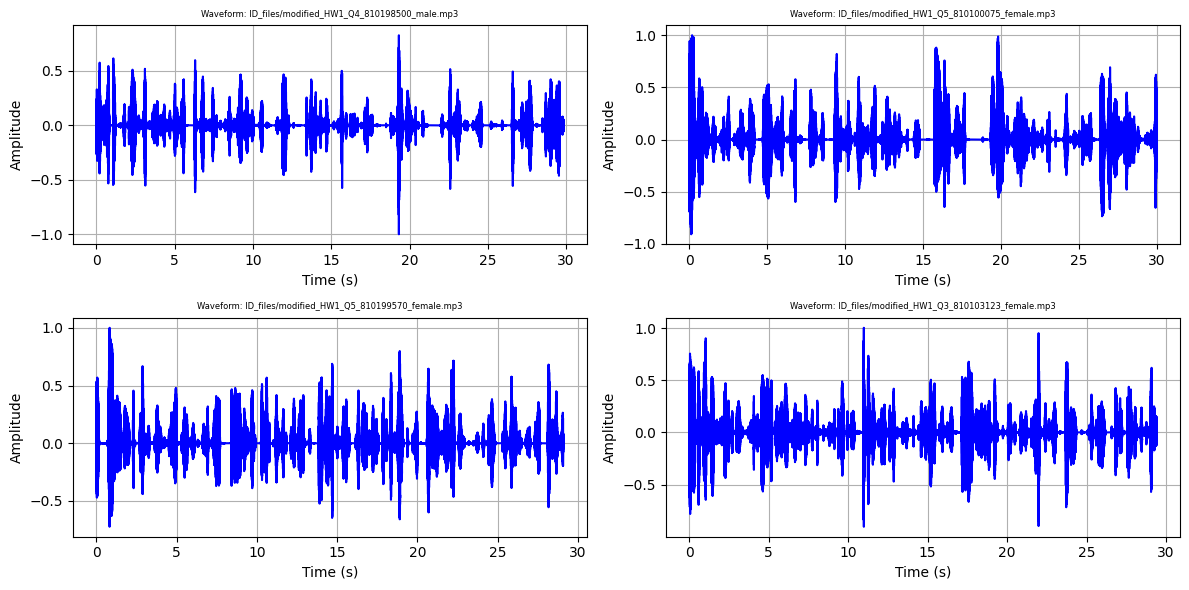

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import librosa
import librosa.display

def load_and_plot_random_audio(audio_files, num_files=4, seed=100):

    random.seed(seed)  # Set random seed
    selected_files = random.sample(audio_files, min(num_files, len(audio_files)))  # Select random files

    loaded_audio = {}

    # Create a 2 row grid for visualization
    rows, cols = 2, num_files // 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()

    for i, file in enumerate(selected_files):
        try:
            y, sr = librosa.load(file, sr=None)  # Load audio file
            loaded_audio[file] = (y, sr)

            time = np.linspace(0, len(y) / sr, num=len(y))  # Create time axis
            axes[i].plot(time, y, label=f"{file}", color='blue')
            axes[i].set_title(f"Waveform: {file}", fontsize=6)
            axes[i].set_xlabel("Time (s)")
            axes[i].set_ylabel("Amplitude")
            axes[i].grid(True)
        except Exception as e:
            print(f"Error loading {file}: {e}")

    # Remove unused subplots
    for j in range(len(selected_files), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return loaded_audio

loaded_audio = load_and_plot_random_audio(ID_voic_files)

The waveforms show clear speech signals with well-balanced amplitude and structure. Most non-speech parts have been removed, but some quiet segments remain, likely due to natural pauses in speech, such as soft phonemes, breathing, or brief hesitations. Since a **top dB threshold of 25** was used for silence trimming, lower-energy sounds may still be present instead of being fully removed. Additionally, the **maximum duration was set to 30 seconds**, ensuring that longer recordings were trimmed while keeping the most relevant speech content. The trimming was also performed **around the spectral centroid**, focusing on the most energy-dense parts of the speech. This helps maintain consistency across samples while preserving essential vocal characteristics.

#### Spectogram Visualization

This function **randomly selects, computes, and visualizes spectrograms** of a few audio files to gain insights into their **frequency content** over time. Spectrograms help in analyzing **speech characteristics, noise patterns, and vocal features** for tasks like **speaker identification and gender classification**.

**Implementation Details:**

1. **Random Selection of Files:**  
   - A **fixed seed (`seed=100`)** ensures reproducibility in random selection.  
   - `random.sample()` picks up to `num_files=4` files from `file_list`, ensuring variety in visualization.

2. **Computing Spectrograms:**  
   - Each selected file is **loaded with its original sampling rate** (`sr=None`).  
   - The **Short-Time Fourier Transform (STFT)** is applied using `librosa.stft(y)`, converting the time-domain signal into its frequency representation.  
   - The amplitude of the STFT is converted to **decibels (dB)** with `librosa.amplitude_to_db()`, making frequency variations more interpretable.  
   - The computed spectrograms, along with their sampling rates, are stored in a dictionary for later use.

3. **Plotting Spectrograms:**  
   - A **grid layout (2x2) is created** to display up to 4 spectrograms.  
   - `librosa.display.specshow()` is used to visualize the **log-scaled spectrogram** with the `"magma"` colormap, which enhances visibility of energy patterns.  
   - Titles are set for each subplot, displaying the corresponding **file name**.  
   - `ax.label_outer()` removes unnecessary labels to **keep the layout clean**.

4. **Adding a Colorbar for Amplitude Representation:**  
   - A **third column in the grid** is reserved for a **colorbar**, displaying amplitude levels in **dB**.  
   - The colorbar provides a reference for **interpreting spectral energy levels**, with its label rotated for better readability.

5. **Final Adjustments and Display:**  
   - `plt.subplots_adjust()` fine-tunes the spacing between plots for clarity.  
   - The function **displays the spectrograms** and returns a dictionary containing **spectrogram data and sampling rates**.

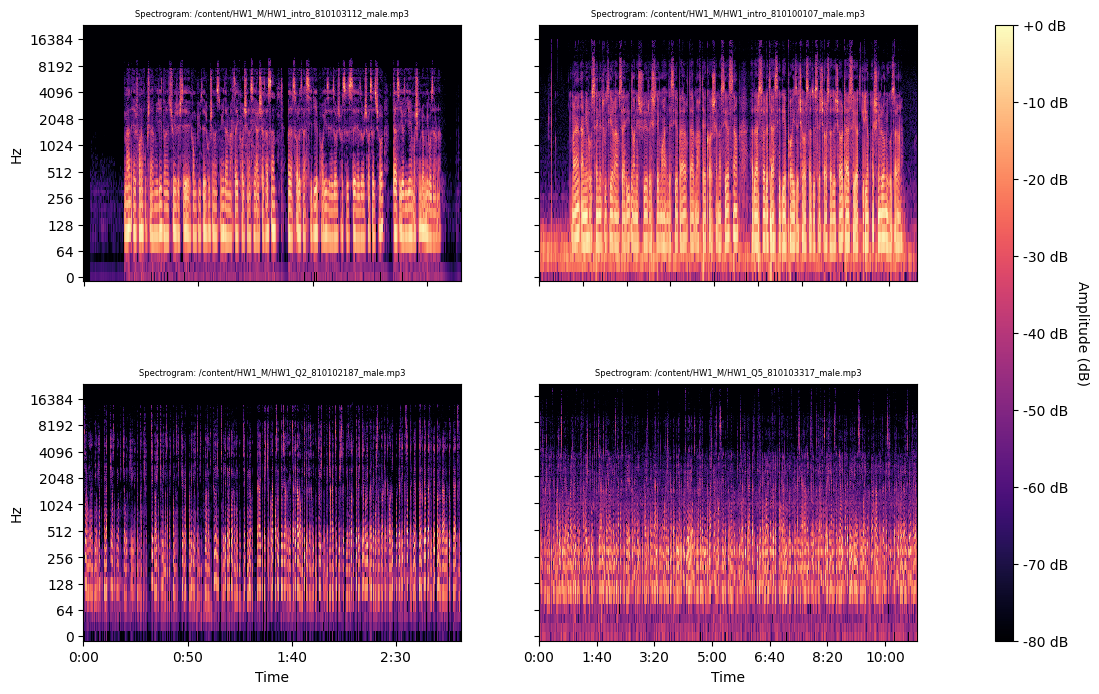

In [ ]:
import librosa
import numpy as np
import random
import matplotlib.pyplot as plt
import librosa.display

def compute_and_plot_spectrograms(file_list, num_files=4, seed=100):

    random.seed(seed)

    # Select random files
    selected_files = random.sample(file_list, min(num_files, len(file_list)))

    spectrograms = {}

    # Load and compute spectrograms
    for file in selected_files:
        try:
            y, sr = librosa.load(file, sr=None)  # Load audio
            S = librosa.stft(y)  # Compute STFT
            S_db = librosa.amplitude_to_db(abs(S), ref=np.max)  # Convert to dB scale
            spectrograms[file] = (S_db, sr)
        except Exception as e:
            print(f"Error loading {file}: {e}")

    # Plot the spectrograms
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 0.05])  # Grid for 2x2 spectrograms + colorbar

    axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(len(spectrograms))]

    for i, (file_name, (S_db, sr)) in enumerate(spectrograms.items()):
        ax = axes[i]
        img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma', ax=ax)
        ax.set_title(f"Spectrogram: {file_name}", fontsize=6)
        ax.label_outer()

    # Add colorbar
    cbar_ax = fig.add_subplot(gs[:, 2])
    cbar = fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB')
    cbar.set_label('Amplitude (dB)', rotation=270, labelpad=15)

    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.show()

    return spectrograms

# Example usage:
spectrogram_data = compute_and_plot_spectrograms(raw_audio_files)


##### **1. Trimming Based on Spectral Centroid (30s limit)**  
- The audio was trimmed around its spectral centroid, keeping up to 30 seconds of the most relevant speech.  
- Spectrograms show a uniform duration, and low-energy regions (e.g., silence) are mostly removed.  

##### **2. Noise Reduction Using Spectral Subtraction**  
- Stationary background noise was removed using spectral subtraction.  
- Spectrograms exhibit reduced high-frequency noise and cleaner speech representations.  

##### **3. Bandpass Filtering (80Hz - 5000Hz)**  
- Frequencies outside the human speech range were filtered out.  
- Low-frequency hums and high-frequency noise are no longer visible in the spectrograms.  

##### **4. Resampling to 44.1kHz**  
- All audio files were resampled to a uniform sample rate of 44.1kHz.  
- This ensures that all spectrograms have a consistent frequency scale for better comparison.  

##### **5. Silence Trimming**  
- Extended silent segments were removed to retain only speech.  
- Spectrograms appear denser with fewer long pauses.  

##### **6. Amplitude Normalization**  
- The amplitude of all audio samples was normalized.  
- The dynamic range of the spectrograms is more balanced, making energy levels comparable across different files.  

##### **Summary**  
- The preprocessing steps effectively removed irrelevant information while preserving speech-related details.  
- Spectrograms are cleaner, more uniform, and more suitable for speaker and gender classification tasks.  
- The impact of noise and variations in recording conditions has been minimized, ensuring that the extracted features primarily represent speech characteristics.  

#### Sound Comparison

Here, we define a function to **randomly select and play an original audio file along with its preprocessed version** for comparison. A **random seed** ensures reproducibility. The function finds the corresponding original file by **matching filenames**, loads both audio files, and plays them sequentially. If no match is found, an error message is displayed.

In [ ]:
import librosa
import random
import soundfile as sf
import IPython.display as ipd
import os

def play_random_audio_pair(original_files, preprocessed_files, seed=100):
    random.seed(seed)

    # Select a random preprocessed file
    preprocessed_file = random.choice(preprocessed_files)

    # Extract the base name (removing directory)
    base_name = os.path.basename(preprocessed_file)

    # Find the corresponding original file
    matched_original = None
    for orig in original_files:
        if os.path.basename(orig) in base_name:  # Match by base name
            matched_original = orig
            break

    if not matched_original:
        print(f"No matching original file found for {preprocessed_file}")
        return

    # Load both audio files
    y_original, sr_original = librosa.load(matched_original, sr=None)
    y_preprocessed, sr_preprocessed = librosa.load(preprocessed_file, sr=None)

    # Play both audio files
    print(f"Playing Original: {matched_original}")
    ipd.display(ipd.Audio(y_original, rate=sr_original))

    print(f"\nPlaying Preprocessed: {preprocessed_file}")
    ipd.display(ipd.Audio(y_preprocessed, rate=sr_preprocessed))

In [ ]:
play_random_audio_pair(raw_audio_files,ID_voic_files)

Playing Original: /content/HW1_M/HW1_Q4_810198500_male.mp3


The processed audio is shorter because silence removal eliminated pauses, reducing the original file. The loudness has decreased, likely due to normalization, and vocal tremors appear smoother. Breathing sounds are no longer present, indicating effective noise reduction. The removal of silent sections makes the speech more compact while keeping the main vocal content intact.

#### Implementing PCA

Here we make a function **Principal Component Analysis (PCA)** to a dataset, optimizing it for **dimensionality reduction** while preserving key information. We use this function in visualization task up ahead.

##### **Implementation Breakdown:**

##### **1. Loading the Dataset**  
The function begins by **reading the dataset** from the specified `csv_path` using Pandas. The dataset contains **both numerical and categorical columns**, with some features potentially requiring preprocessing before applying PCA.

##### **2. Filtering Numeric Features**  
Since PCA operates only on **numerical data**, the function:  
- **Extracts all numeric columns** using `select_dtypes(include=[np.number])`.  
- **Removes categorical features** such as `'gender'`, `'sid'`, and any other **non-numeric identifiers**.  
- Explicitly **drops `'sid'`** if it exists, as student IDs are unique identifiers that do not contribute to meaningful variance.  

This ensures that only **valid numerical features** remain for PCA transformation.

##### **3. Handling Missing and Infinite Values**  
Before PCA, **data integrity must be ensured**:  
- Any `inf` or `-inf` values are replaced with `NaN`.  
- **NaN values** are replaced with their respective column **means**, preventing missing data from distorting the PCA transformation.  

This step guarantees that all numeric features are **properly structured** and free of computational errors.

##### **4. Standardizing the Data**  
PCA is **highly sensitive to feature scaling**, so numerical data is **standardized** using `StandardScaler()`:  
- Each feature is scaled to have **zero mean and unit variance**.  
- This prevents features with **larger magnitudes** from disproportionately influencing the PCA components.  
- Standardization ensures that **each feature contributes equally** to the variance captured by PCA.

##### **5. Applying PCA for Dimensionality Reduction**  
Once the data is properly processed, PCA is applied:  
- `PCA(n_components=n_components)` initializes PCA with the specified number of components.  
- The **transformation is applied to the standardized dataset**, reducing it to a **new feature space** of `n_components` principal components.  
- The transformed data is **converted back into a Pandas DataFrame**, with column names **'PC1', 'PC2', ..., 'PCn'**.

This transformation retains the **most significant variance** while reducing redundancy, making it highly useful for **efficient classification and clustering**.

##### **6. Reintegrating Categorical Data**  
Since categorical columns (`'gender'`, `'sid'`, etc.) were removed earlier, they are now **added back** to the PCA-transformed dataset:  
- All **original non-numeric columns** are retrieved from the dataset.  
- If **'sid'** was present, it is explicitly restored.  
- The PCA DataFrame and categorical columns are concatenated, ensuring **both numerical and categorical attributes** remain.

This step ensures that the **dataset structure remains intact**, allowing proper **labeling and identification** after dimensionality reduction.

##### **7. Saving the Transformed Dataset (Optional)**  
If a `save_path` is provided, the PCA-transformed dataset is **saved as a CSV file**:  
- `final_df.to_csv(save_path, index=False)` writes the processed data to disk.  
- A **confirmation message** is printed to indicate the file’s location.  

This allows for **easy reuse** without requiring re-processing.

##### **8. Returning the Processed Data**  
Finally, the function returns `final_df`, now transformed into a **compact, high-variance representation**, suitable for **machine learning models**.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(csv_path, n_components, save_path=None):
    # Load dataset
    df = pd.read_csv(csv_path)

    # Remove non-numeric columns (like 'gender', 'sid', etc.)
    numeric_df = df.select_dtypes(include=[np.number])

    # Drop 'sid' column if it exists
    if "sid" in numeric_df.columns:
        numeric_df = numeric_df.drop(["sid"], axis=1)

    # Replace inf and NaN values with column mean
    numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_df.fillna(numeric_df.mean(), inplace=True)

    # Standardize the data
    scaler = StandardScaler()
    numeric_df_scaled = scaler.fit_transform(numeric_df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(numeric_df_scaled)

    # Convert back to DataFrame
    pca_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(n_components)])

    # Add categorical columns back (like 'gender', 'sid', etc.)
    non_numeric_df = df.select_dtypes(exclude=[np.number])
    if "sid" in df.columns:
        non_numeric_df["sid"] = df["sid"]

    final_df = pd.concat([pca_df, non_numeric_df.reset_index(drop=True)], axis=1)

    # Save the new dataset
    if save_path:
        final_df.to_csv(save_path, index=False)
        print(f"PCA-applied dataset saved at {save_path}")

    return final_df


#### PCA Visualization

Here, we **apply PCA to the dataset and visualize the transformed feature space**, coloring the data points based on **gender classification**. This helps in understanding how well **gender-based variations** are captured in the **principal components**.

##### **Implementation Breakdown:**

1. **Define CSV Path and PCA Components:**  
   - The dataset is loaded from `ID_csv_path`.  
   - `n_components` is set to **2 for 2D visualization** and **3 for 3D visualization**.

2. **Apply PCA Transformation:**  
   - The `apply_pca()` function is used to **reduce dimensionality** while preserving essential data variance.  
   - The dataset is transformed into `PC1`, `PC2`, and (if applicable) `PC3`.  

3. **Plotting the PCA-Transformed Data (`plot_pca()`)**  
   - A **scatter plot** is created to visualize **clusters and separability** of gender-based features.  
   - If `PC3` is present, a **3D plot is generated** using `mpl_toolkits.mplot3d`, allowing **spatial visualization** of component distributions.  
   - If `PC3` is absent, a **2D scatter plot** is created, mapping `PC1` vs. `PC2`.  

4. **Coloring the Points Based on Gender:**  
   - The **gender column is converted into categorical codes** for color mapping.  
   - The `viridis` colormap is used to **distinguish genders visually** in the plot.  

5. **Adding Labels and Enhancing Visualization:**  
   - **Principal components (PC1, PC2, PC3)** are labeled to provide clear interpretation.  
   - A **color bar is included** to show the mapping between gender and color coding.  
   - The **plot is titled dynamically**, reflecting the coloring criteria.  

6. **Final Execution:**  
   - PCA is applied to the dataset (`df_pca_gender`).  
   - The transformed data is visualized using `plot_pca()`, highlighting the **gender-based separation** in PCA space.

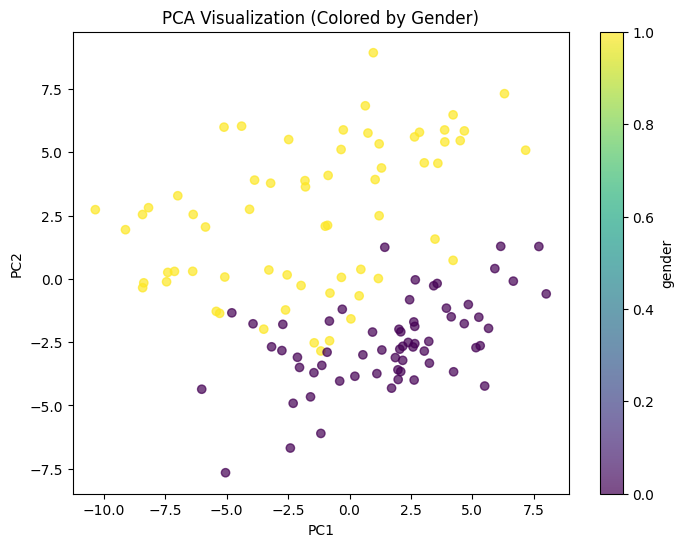

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Path to the CSV file
csv_path = ID_csv_path

# Set the number of components for PCA (2 for 2D, 3 for 3D visualization)
n_components = 2

def plot_pca(df, color_by, title):

    fig = plt.figure(figsize=(8, 6))

    # Check if 3D plot is needed
    if "PC3" in df.columns:
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(df["PC1"], df["PC2"], df["PC3"],
                             c=df[color_by].astype('category').cat.codes,
                             cmap='viridis', alpha=0.7)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
    else:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df["PC1"], df["PC2"],
                             c=df[color_by].astype('category').cat.codes,
                             cmap='viridis', alpha=0.7)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

    # Add title and color bar
    plt.title(title)
    plt.colorbar(scatter, label=color_by)
    plt.show()

# Apply PCA and visualize based on 'gender'
df_pca_gender = apply_pca(csv_path, n_components)
plot_pca(df_pca_gender, "gender", "PCA Visualization (Colored by Gender)")

The PCA plot shows a noticeable separation between genders, with **purple (men)** clustered more densely around the center and **yellow (women)** spread more widely, especially along the positive **PC2** axis. Some overlap exists in the middle, but overall, PCA has captured meaningful variance related to gender. A few outliers are visible, particularly among women, suggesting higher variability in their feature distribution.

# **<font color='orange'>PART 3: Classification</font>**

# <font color='cyan'>Gender recognition</font>

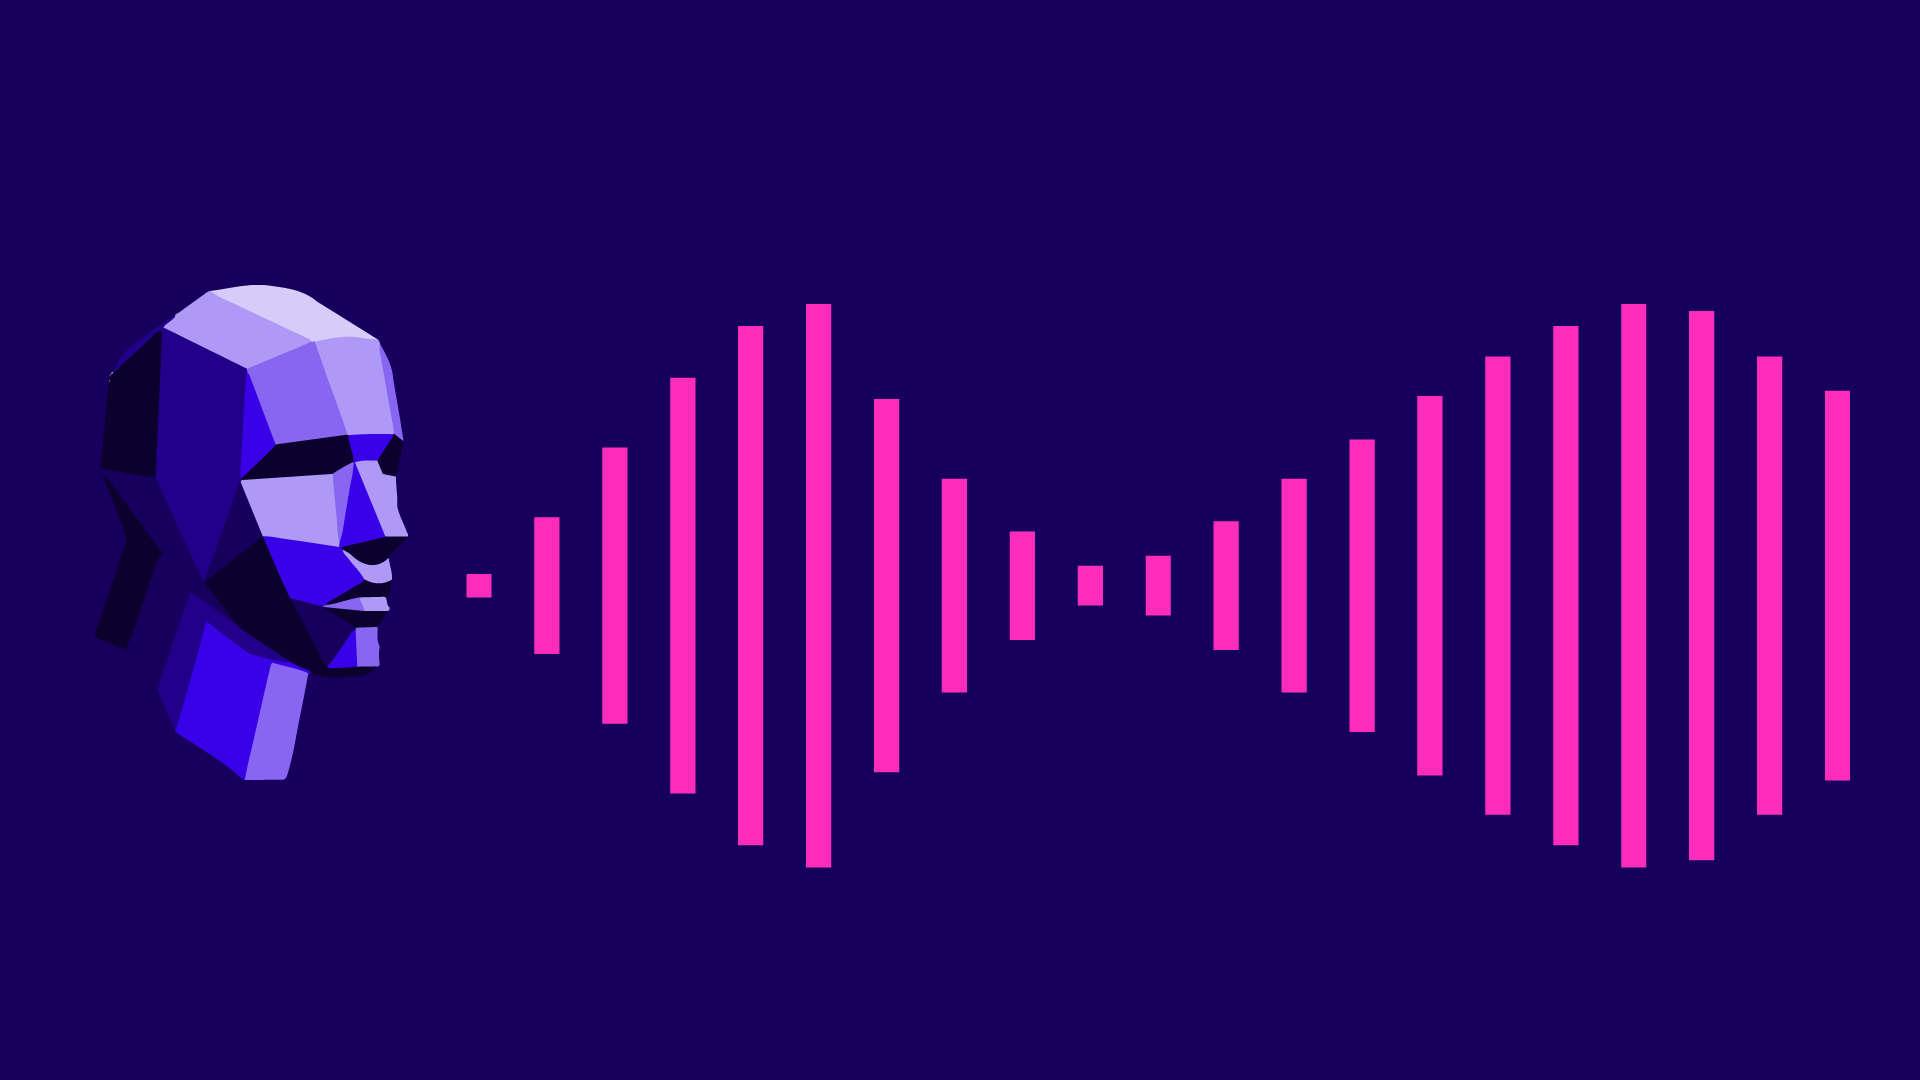

**SRC:**  https://www.google.com/url?sa=i&url=https%3A%2F%2Fgithub.com%2FOmarHory%2FVoiceGenderRecognition&psig=AOvVaw2xISWMge0x1wMhQ4wQR4ab&ust=1738850901441000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMiDo8farIsDFQAAAAAdAAAAABAR

#### <font color='Green'>What features do we need?</font>

### **1. Fundamental Frequency (F0 or Pitch)**

### **Description & Rationale**
- **What It Is:**  
  The fundamental frequency represents the rate of vocal fold vibrations during speech. It is often perceived as the pitch of the voice.
  
- **Gender Differences:**  
  Male voices typically have a lower F0 (approximately 85–180 Hz), while female voices usually exhibit a higher F0 (approximately 165–255 Hz). This is largely due to physiological differences such as vocal fold length and mass.

- **Why It Helps:**  
  Because F0 is one of the most directly measurable parameters that reflects these physiological differences, it provides a strong initial cue for gender classification.

### **Mathematical Formulation**
- **Autocorrelation Method:**  
  One common method to estimate F0 is to use the autocorrelation function. For a discrete-time signal \( x(n) \) of length \( N \), the autocorrelation is given by:
  

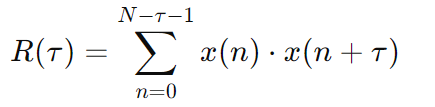

- **Pitch Estimation:**  
  Identify the lag \( T_0 \) corresponding to the first significant peak in \( R_tau )  (beyond lag 0). The fundamental frequency is then calculated as:




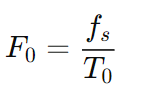


  where \( f_s \) is the sampling rate.

---
### **2. Formants**

### **Description & Rationale**
- **What They Are:**  
  Formants are resonant frequencies of the vocal tract that shape the timbre of the voice. The first two formants, \( F1 \) and \( F2 \), are especially important in characterizing vowel sounds.

- **Gender Differences:**  
  Due to differences in the vocal tract length and shape between males and females, the formant frequencies tend to shift. For example, a longer vocal tract in males typically results in lower formant frequencies compared to females.

- **Why They Help:**  
  Analyzing formant frequencies provides complementary information to F0, capturing how the spectral envelope of the voice varies with gender.

### **Mathematical Formulation**


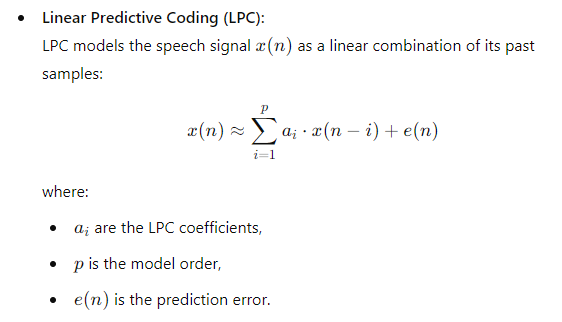

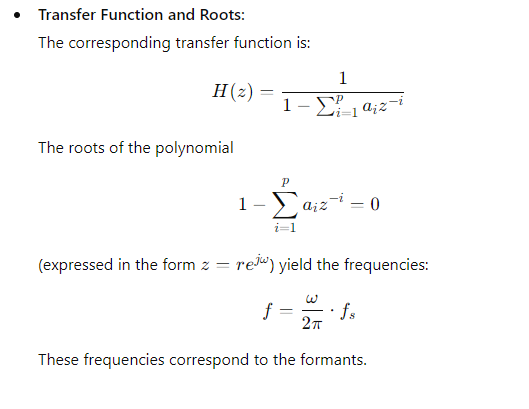

---
### **3. Mel-Frequency Cepstral Coefficients (MFCCs)**

### **Description & Rationale**
- **What They Are:**  
  MFCCs represent the short-term power spectrum of a sound on a mel scale, which is designed to mimic the human auditory system’s sensitivity to different frequencies.

- **Why They Help:**  
  MFCCs capture the overall spectral shape and timbre of the voice. Since the spectral envelope differs between male and female voices due to differences in vocal tract characteristics, MFCCs provide robust features for gender recognition.

### **Extraction Process & Equations**


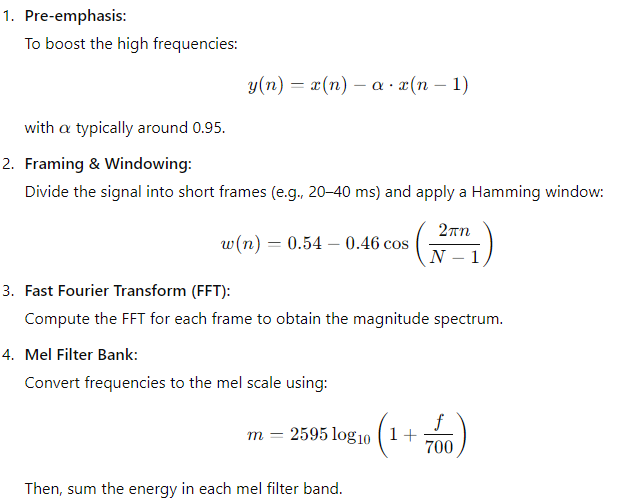

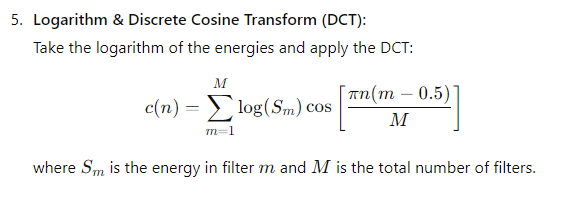


---

### **4. Additional Spectral Features**

### a) **Spectral Centroid**

- **What It Is:**  
  The spectral centroid is the “center of mass” of the spectrum, indicating where most of the energy is concentrated.

- **Why It Helps:**  
  A higher spectral centroid often corresponds to a "brighter" sound, which might be more typical in female voices, whereas male voices often have a lower spectral centroid due to their generally lower energy distribution in higher frequencies.

- **Equation:**


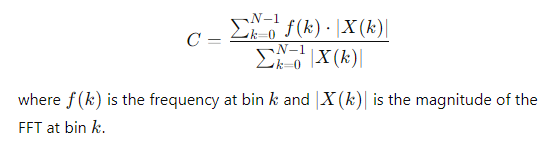


### b) **Spectral Flux**

- **What It Is:**  
  Spectral flux measures the change in the power spectrum between successive frames.

- **Why It Helps:**  
  It captures the dynamics of the voice signal. Variations in spectral flux can reflect differences in speech articulation and energy fluctuations between genders.

- **Equation:**


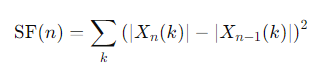


---

### **5. Zero Crossing Rate (ZCR)**

### **Description & Rationale**
- **What It Is:**  
  The zero crossing rate is the rate at which the signal changes sign (from positive to negative or vice versa).

- **Why It Helps:**  
  Although not a very strong indicator on its own, ZCR provides additional information about the frequency content and noisiness of the signal. When combined with other features, it can help to reinforce distinctions between the typically more periodic male voices and the comparatively higher-frequency and sometimes noisier female voices.

### **Equation:**



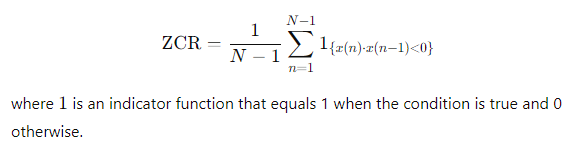

---
### **6. Jitter and Shimmer**

### **Description & Rationale**
- **Jitter:**  
  This measures the cycle-to-cycle variation in the period (i.e., slight fluctuations in F0). It is calculated as the average absolute difference between consecutive periods.
  
- **Shimmer:**  
  This measures the cycle-to-cycle variation in amplitude.

- **Why They Help:**  
  Both jitter and shimmer capture subtle aspects of voice quality and stability. Variations in these parameters can reflect physiological and phonatory differences that may correlate with gender differences in voice production.

### **Equations:**


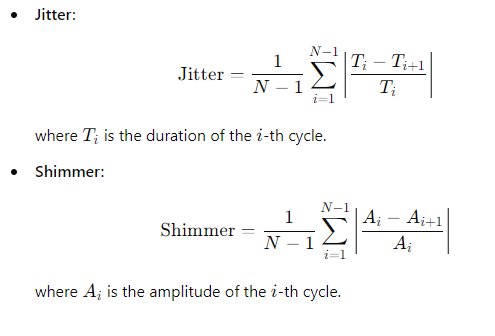


---

### **How These Features Integrate in Practice**

When you feed these extracted features into machine learning models (such as MLP, SVM, or KNN):

- **Fundamental Frequency (F0):**  
  Serves as a primary indicator since the pitch difference is one of the strongest cues to gender.

- **Formants:**  
  Provide information on vocal tract resonances that, when combined with F0, help to capture the physical differences in the vocal apparatus between males and females.

- **MFCCs:**  
  Offer a compact representation of the overall spectral envelope, capturing both timbre and articulation, which are essential for robust recognition in noisy or variable conditions.

- **Spectral Features (Centroid & Flux):**  
  Complement the above by quantifying how energy is distributed across frequencies and how it changes over time, adding robustness against variations in speech intensity and style.

- **ZCR, Jitter, and Shimmer:**  
  While these features may not be strong discriminators individually, they provide additional nuance by reflecting the periodicity and stability of the signal. These subtle variations can improve the accuracy of the classifier when combined with more dominant features.

In summary, combining these features allows us classifier to build a multi-dimensional profile of each voice. The differences in physiological production mechanisms (reflected in F0 and formants) are directly captured, while MFCCs and additional spectral features provide a more detailed description of the voice’s timbral and dynamic properties. This rich feature set improves the reliability and accuracy of gender classification using machine learning techniques.

---

## <font color='Green'>**Preprocess**</font>

### **Importing Libraries and Downloading the Dataset**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier

import gdown
import os



- **Pandas (`pd`) and NumPy (`np`):**  
  - **`pandas`** is used for data manipulation and analysis, especially for handling tabular data with DataFrames.
  - **`numpy`** provides support for large, multi-dimensional arrays and matrices along with a collection of mathematical functions to operate on these arrays.

- **Matplotlib (`plt`) and Seaborn (`sns`):**  
  - **`matplotlib.pyplot`** is a plotting library used for creating static, animated, and interactive visualizations.
  - **`seaborn`** is built on top of matplotlib and provides a high-level interface for drawing attractive statistical graphics.

- **Scikit-learn Modules:**  
  - **`train_test_split`:** Splits the data into training and testing sets.
  - **`StandardScaler`:** Standardizes features by removing the mean and scaling to unit variance.
  - **`LabelEncoder`:** Encodes categorical labels with values between 0 and n_classes-1.
  - **`confusion_matrix`, `classification_report`, `roc_curve`, and `auc`:** Functions for evaluating the performance of classification models.
  - **`MLPClassifier`:** A Multi-Layer Perceptron classifier (though it is not used later in this code as the deep learning model is built with Keras).

- **gdown and os:**  
  - **`gdown`** is a tool to download files from Google Drive.  
  - **`os`** is a module that provides a way of using operating system dependent functionality (e.g., checking file existence).



### **Downloading the Dataset**


In [ ]:
if not os.path.exists("file_flag"):
    print("Downloading dataset...")
    !gdown 1-1ZZ5FQujtj5SpvCGgvjEivOAiXuiNVj -O train.csv
    !gdown 1-3dfrkpD-Wm3cC-il3DMn-pV49AmMPBe -O test.csv
    !touch file_flag
else:
    print("Dataset already downloaded.")

Dataset already downloaded.



- **File Existence Check:**  
  - `os.path.exists("file_flag")` checks whether a file named `"file_flag"` exists. This file acts as a simple marker to indicate that the dataset has been downloaded previously.  
  - This avoids repeated downloads if the code is run multiple times.

- **Downloading Files (if necessary):**  
  - If `"file_flag"` does not exist:
    - The code prints `"Downloading dataset..."` to inform the user.
    - The `!gdown` commands (which are typically used in a Jupyter Notebook environment) download two CSV files from Google Drive using unique file IDs:
      - The first command downloads `train.csv`.
      - The second command downloads `test.csv`.
    - The command `!touch file_flag` creates an empty file named `"file_flag"` to signal that the download has been completed.

- **Else Block:**  
  - If `"file_flag"` exists, it prints `"Dataset already downloaded."` to skip the download process.



### **Loading and Inspecting the Dataset**

In [ ]:
train_file_path = "train.csv"
test_file_path = "test.csv"
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)


- **Reading CSV Files:**  
  - The file paths for training and test datasets are defined as `"train.csv"` and `"test.csv"`, respectively.
  - **`pd.read_csv()`** reads each CSV file into a Pandas DataFrame:
    - `train_df` contains the training data.
    - `test_df` contains the test data.



### **Balancing datasets**

In [ ]:

# Display gender distribution in the new datasets
print("Training Set Gender Distribution:\n", train_df['gender'].value_counts())
print("Testing Set Gender Distribution:\n", test_df['gender'].value_counts())


Training Set Gender Distribution:
 gender
female    152
male      133
Name: count, dtype: int64
Testing Set Gender Distribution:
 gender
male      57
female    38
Name: count, dtype: int64


In [ ]:
import pandas as pd
# Merge train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Find the minimum class count to balance male and female counts
min_class_count = combined_df['gender'].value_counts().min()

# Sample equal number of males and females
balanced_df = combined_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))

# Perform an 80-20 stratified split ensuring equal distribution
test_df = balanced_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
train_df = balanced_df.drop(test_df.index)


In [ ]:
# Display gender distribution in the new datasets
print("New Training Set Gender Distribution:\n", train_df['gender'].value_counts())
print("New Testing Set Gender Distribution:\n", test_df['gender'].value_counts())

New Training Set Gender Distribution:
 gender
female    152
male      152
Name: count, dtype: int64
New Testing Set Gender Distribution:
 gender
female    38
male      38
Name: count, dtype: int64



- **Merges** `train_df` and `test_df` into a **single DataFrame (`combined_df`)**.
- `ignore_index=True` resets the index to **avoid duplicate index values** after merging.
- **Counts** the number of `Male` and `Female` samples in `combined_df`.
- **Finds the smallest count** (`min_class_count`), ensuring **both genders have the same number of samples**.

- **Groups** the dataset by `gender` (Male/Female).
- **Randomly selects** `min_class_count` samples from each gender.
- `random_state=42` ensures **reproducibility** (same random selection every time).

- **Groups** `balanced_df` by `gender` (Male/Female).
- **Randomly selects 20%** of samples from each gender for `test_df`.
- `random_state=42` ensures **consistent random selection**.

- **Removes** the `test_df` samples from `balanced_df`, leaving the **remaining 80% as training data**.



In [ ]:
train_df.head()

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
343                  244.787491                 134.208641 -449.57520   
354                  232.124107                  98.646432 -417.97610   
216                  217.664036                  97.503491 -396.95575   
127                  251.677367                 124.437010 -430.83980   
195                  254.092723                 134.495637 -430.83830   

        mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6  \
343  56.697960   9.529380  10.179009  12.407022 -0.896298 -9.687795   
354  86.683930   0.436338  14.901074  18.120033 -5.409952 -5.018389   
216  79.379814  12.396186  16.625294  15.653644 -0.980830 -4.316628   
127  71.532050  10.439166  16.570835  14.864358  1.860166 -2.104402   
195  81.100400  14.824826  17.221140  21.009678  5.965609 -3.718788   

        mfcc_7  ...  spectral_contrast_0  spectral_contrast_1  \
343 -13.460993  ...            16.218922            15.798877   
354  -7.445141  ...            18.388056            19.469299   
216  -5.503643  ...            17.241551            18.932272   
127 -11.259460  ...            16.981439            17.615021   
195  -9.970650  ...            18.094185            15.921974   

     spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
343            22.911554            26.312637            36.456473   
354            25.788327            26.437027            39.493175   
216            23.813847            22.017746            37.176214   
127            23.001275            22.759860            35.325153   
195            20.530614            24.026022            34.658484   

     spectral_contrast_5  spectral_contrast_6          sid  qnum  gender  
343            38.860230            31.360283  810100193.0    q3  female  
354            49.064940            32.938407  810101471.0   NaN  female  
216            42.403179            36.412034  610300070.0   NaN  female  
127            37.868501            35.037448  810100193.0   NaN  female  
195            39.377533            35.933198  810102327.0    q3  female  

[5 rows x 60 columns]

In [ ]:
train_df.describe()

fundamental_frequency_mean  fundamental_frequency_std      mfcc_0  \
count                  304.000000                 304.000000  304.000000   
mean                   257.395664                 146.045972 -457.880689   
std                     28.017122                  22.293568   32.850074   
min                    192.494322                  97.503491 -588.324950   
25%                    237.673853                 128.263728 -477.213965   
50%                    256.794133                 147.367474 -455.279630   
75%                    277.455600                 165.580238 -436.181190   
max                    332.456042                 188.407753 -375.010300   

           mfcc_1      mfcc_2      mfcc_3      mfcc_4      mfcc_5      mfcc_6  \
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000   
mean    71.350510   10.704035   14.149146   14.311320   -0.710792   -2.679291   
std     10.502029    7.499897    5.720331    5.746679    5.033556    5.756249   
min     37.733864   -9.230222   -7.917053   -3.887657  -16.518448  -15.935215   
25%     65.162396    5.164594   10.700059   10.896973   -3.629456   -6.616246   
50%     70.740055   10.278711   13.676319   14.498532   -0.453636   -3.076269   
75%     77.475735   16.424436   17.737119   18.343415    2.584792    0.789540   
max    109.598076   36.630253   29.952108   31.430307   13.885088   16.692165   

           mfcc_7  ...  chroma_features_10  chroma_features_11  \
count  304.000000  ...          304.000000          304.000000   
mean    -4.224569  ...            0.355217            0.345280   
std      5.020524  ...            0.061751            0.060641   
min    -17.181412  ...            0.200162            0.199298   
25%     -7.872955  ...            0.310404            0.304960   
50%     -4.093597  ...            0.350834            0.343263   
75%     -0.855183  ...            0.396511            0.391445   
max     11.037022  ...            0.530348            0.515087   

       spectral_contrast_0  spectral_contrast_1  spectral_contrast_2  \
count           304.000000           304.000000           304.000000   
mean             17.129985            16.102991            22.210651   
std               1.646111             1.910206             1.728211   
min              13.071831            10.568784            16.414190   
25%              16.096141            14.720373            21.037111   
50%              17.420991            16.145265            22.286087   
75%              18.307831            17.407250            23.527449   
max              23.973666            20.593953            26.977958   

       spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
count           304.000000           304.000000           304.000000   
mean             24.336865            33.266996            39.356083   
std               1.956015             3.061670             4.090290   
min              17.696173            23.233454            26.174979   
25%              23.189596            31.425985            37.234319   
50%              24.162492            33.429922            39.506912   
75%              25.560364            35.347727            42.059464   
max              30.307876            40.739093            49.064940   

       spectral_contrast_6           sid  
count           304.000000  2.910000e+02  
mean             32.614372  7.929205e+08  
std               4.995197  8.545522e+07  
min              16.742830  1.515010e+08  
25%              29.625675  8.101014e+08  
50%              32.690527  8.101030e+08  
75%              35.726022  8.101986e+08  
max              46.835313  8.108011e+08  

[8 rows x 58 columns]

In [ ]:
test_df.head()

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
284                  262.738579                 137.944114 -455.06644   
143                  252.033741                 122.702410 -458.32147   
166                  257.666648                 114.017976 -442.88430   
93                   282.159618                 145.065261 -476.12128   
277                  299.427735                 137.259900 -439.26767   

        mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6  \
284  62.967705   9.266531   4.713693   2.951395 -3.815066 -0.090827   
143  61.454617  12.829716  11.402855   9.284343 -4.310510 -8.036044   
166  79.593910  26.596994  11.459496   7.042360 -1.534874 -7.864487   
93   65.914345   5.471819  16.943436  14.458129  2.591076  0.752906   
277  64.609980   8.958686  15.105789  13.347991 -4.663830 -6.455815   

        mfcc_7  ...  spectral_contrast_0  spectral_contrast_1  \
284  -1.596095  ...            16.171627            17.192001   
143  -8.391602  ...            18.193213            17.946511   
166 -10.161696  ...            18.676848            16.674588   
93   -8.540350  ...            18.140240            17.486862   
277  -8.924964  ...            14.353724            16.909077   

     spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
284            21.858619            22.858993            35.300627   
143            23.928743            26.227487            35.886018   
166            21.274309            24.828655            31.319799   
93             22.034911            21.635886            32.727429   
277            21.633626            22.812255            31.457990   

     spectral_contrast_5  spectral_contrast_6          sid  qnum  gender  
284            41.318898            38.072416  810102148.0    q1  female  
143            43.747072            37.336231  810600097.0    q4  female  
166            38.259537            32.821839          NaN   NaN  female  
93             38.227677            32.910507  810102017.0    q5  female  
277            39.930703            32.068756  810100590.0    q1  female  

[5 rows x 60 columns]

In [ ]:
test_df.describe()

fundamental_frequency_mean  fundamental_frequency_std      mfcc_0  \
count                   76.000000                  76.000000   76.000000   
mean                   258.291609                 147.211595 -464.061273   
std                     28.296806                  20.333178   32.809803   
min                    198.420029                 107.179458 -589.211700   
25%                    236.717240                 130.125587 -479.564250   
50%                    258.160824                 148.742439 -459.960250   
75%                    275.258793                 163.104146 -442.407550   
max                    336.883860                 185.464485 -396.624240   

          mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
count  76.000000  76.000000  76.000000  76.000000  76.000000  76.000000   
mean   70.650688   9.318070  13.033002  13.764289  -0.659048  -2.457701   
std     8.635018   8.283979   5.386889   6.083002   5.795074   4.980498   
min    54.153170 -13.865065  -0.536544  -0.689931 -13.592428 -12.374608   
25%    64.108735   4.605291  10.132161   9.330424  -4.144109  -6.464793   
50%    70.216288   9.614507  13.028647  13.496261  -1.033019  -2.566203   
75%    76.740042  14.279306  16.395089  17.208723   3.101256   0.829017   
max    94.087494  27.487032  25.952177  27.975842  15.856540   8.288895   

          mfcc_7  ...  chroma_features_10  chroma_features_11  \
count  76.000000  ...           76.000000           76.000000   
mean   -4.232434  ...            0.347299            0.336795   
std     4.489924  ...            0.064872            0.060541   
min   -14.629459  ...            0.220292            0.213929   
25%    -7.219397  ...            0.306930            0.293536   
50%    -4.820595  ...            0.342702            0.329754   
75%    -1.266862  ...            0.377076            0.372062   
max     5.885146  ...            0.540015            0.493706   

       spectral_contrast_0  spectral_contrast_1  spectral_contrast_2  \
count            76.000000            76.000000            76.000000   
mean             17.373564            16.243595            22.367905   
std               1.477809             1.689349             1.539151   
min              14.270484            11.800803            17.637645   
25%              16.302603            15.283353            21.469828   
50%              17.560344            16.525997            22.214265   
75%              18.496647            17.273536            23.451344   
max              21.242097            20.825407            26.112521   

       spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
count            76.000000            76.000000            76.000000   
mean             24.175929            32.813921            39.680457   
std               1.815132             3.163454             3.980721   
min              20.204308            22.359194            27.961861   
25%              22.695243            31.338403            36.687829   
50%              24.029283            32.941787            40.145303   
75%              25.186420            34.625497            42.821725   
max              29.211073            39.967563            47.870022   

       spectral_contrast_6           sid  
count            76.000000  7.300000e+01  
mean             33.788489  7.868686e+08  
std               5.716901  1.110066e+08  
min              16.394355  1.594030e+08  
25%              30.383515  8.101003e+08  
50%              33.906443  8.101030e+08  
75%              37.396743  8.101033e+08  
max              45.848332  8.108991e+08  

[8 rows x 58 columns]

- **Data Inspection:**  
  - **`head()`:** Displays the first 5 rows of each DataFrame. This is useful for a quick look at the structure and content of the data.
  - **`describe()`:** Generates descriptive statistics (such as count, mean, standard deviation, minimum, quartiles, and maximum) for numerical columns. This helps in understanding the distribution and spread of the data.


In [ ]:
# Check missing values
missings = train_df.isnull().sum()
not_0_missings = missings[missings != 0]
not_0_missings

shimmer     2
sid        13
qnum       66
dtype: int64

In [ ]:
# Check missing values
missings = test_df.isnull().sum()
not_0_missings = missings[missings != 0]
not_0_missings

sid      3
qnum    13
dtype: int64


- **Identifying Missing Values:**  
  - **`isnull()`** returns a DataFrame of the same shape as `train_df`/`test_df` with Boolean values indicating the presence of missing data.
  - **`sum()`** is then applied column-wise to count the number of missing entries for each feature.
  - The code filters to display only those columns that have non-zero missing counts. This helps focus attention on columns that need imputation or other handling.
`


### **Handle missing data: Drop unuseful features**

In [ ]:
train_df.drop(['sid', 'qnum'], axis=1, inplace=True)
test_df.drop(['sid', 'qnum'], axis=1, inplace=True)



- **Dropping Columns:**
  - The columns `'sid'` (likely a session or subject identifier) and `'qnum'` (possibly a question number or similar identifier) are removed from both DataFrames.
  - **`drop()`** method is used with `axis=1` to indicate that columns (not rows) should be dropped.
  - The parameter `inplace=True` means that the changes are applied directly to the existing DataFrames without returning a new DataFrame.
  - **Reasoning:**  
    - These columns are considered unuseful for the predictive task (e.g., they may not contain predictive information or could introduce noise).



### **Handle missing data: Filling Missing Numerical Values with Mean**

In [ ]:
mean_shimmer = train_df['shimmer'].mean()
train_df['shimmer'] = train_df['shimmer'].fillna(mean_shimmer)



- **Calculating the Mean:**  
  - **`train_df['shimmer'].mean()`** computes the mean (average) value of the column `'shimmer'` in the training data.
- **Filling Missing Values:**  
  - **`fillna(mean_shimmer)`** replaces any missing entries in the `'shimmer'` column with the computed mean.
  - **Why Use the Mean?**
    - The mean is a simple and common imputation technique, particularly effective when the distribution of the data is approximately symmetric (normal).
    - If the data were skewed, a median might provide a more robust central tendency measure.


### **Verifying That No Missing Values Remain**


In [ ]:
# Check missing values
missings = train_df.isnull().sum()
not_0_missings = missings[missings != 0]
not_0_missings

Series([], dtype: int64)

In [ ]:
# Check missing values
missings = test_df.isnull().sum()
not_0_missings = missings[missings != 0]
not_0_missings

Series([], dtype: int64)



- **Rechecking for Missing Data:**  
  - After the imputation and dropping of unnecessary columns, the code checks again for any missing values.
  - This ensures that the dataset is complete and that no NaN values remain, which is crucial for the subsequent steps in model training.





### **Data Preprocessing for Neural Network Modeling**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



- **Redundant Imports:**  
  - Some modules (like NumPy, Pandas, and Matplotlib) are imported again. While this redundancy does not affect the code execution, it ensures that all necessary modules for the deep learning components (TensorFlow and Keras) are available.
- **TensorFlow/Keras Modules:**  
  - **`Sequential`:** Allows stacking layers sequentially.
  - **`Dense`:** Implements fully connected layers.
  - **`Dropout`:** Implements dropout regularization to help mitigate overfitting.




### **Separating Features and Target Variables**

In [ ]:
# Separating features (X) and target (y)
X_train = train_df.drop('gender', axis=1)  # Removing target column
y_train = train_df['gender']  # Target variable

X_test = test_df.drop('gender', axis=1)
y_test = test_df['gender']



- **Defining Inputs and Outputs:**
  - **Features (`X_train`, `X_test`):**  
    - The code drops the column `'gender'` from each dataset, assuming that it is the target variable.
    - All remaining columns are used as input features.
  - **Target (`y_train`, `y_test`):**  
    - The `'gender'` column is isolated as the target variable for prediction.
  - **Why Split?**  
    - Separating the features and labels is essential before feeding data into a machine learning model.



### **Encoding Categorical Target Labels**

In [ ]:
# Convert categorical target labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit & transform training labels
y_test_encoded = label_encoder.transform(y_test)  # Transform test labels using the same encoding

print("Encoded classes:", label_encoder.classes_)


Encoded classes: ['female' 'male']



- **Label Encoding:**  
  - **`LabelEncoder`** converts categorical text labels (e.g., "Male", "Female") into numerical values (e.g., 0 and 1).
  - **`fit_transform()` on `y_train`:**  
    - This method learns the unique classes in the training labels and converts them into corresponding numerical values.
  - **`transform()` on `y_test`:**  
    - The same transformation is applied to the test labels using the encoding learned from the training data, ensuring consistency.
  - **Output:**  
    - The unique encoded classes are printed, allowing you to verify which number corresponds to which gender.



### **Handling Infinite Values and Imputation**

In [ ]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with column means
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)




- **Replacing Infinite Values:**  
  - Sometimes data may contain infinite values (both positive and negative). These are replaced with `NaN` so that they can be imputed or otherwise handled.
- **Imputation with `SimpleImputer`:**
  - **`SimpleImputer(strategy='mean')`:**  
    - Creates an imputer object that will replace missing values with the mean of the corresponding column.
  - **Fitting and Transforming:**  
    - For `X_train`, the imputer is fitted (computing the mean of each column) and then applied.
    - For `X_test`, the already fitted imputer is used to transform the data, ensuring that the same mean values are applied as in the training data.
  - **Reconstructing DataFrames:**  
    - The imputed arrays are converted back into DataFrames, preserving the original column names.



### **Feature Standardization**

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



- **Purpose of Standardization:**
  - Standardizing (or normalizing) the features ensures that each feature contributes equally to the learning process. Neural networks, in particular, benefit from inputs that have been scaled to a common range.
- **Using `StandardScaler`:**
  - **`fit_transform()` on `X_train`:**  
    - Computes the mean and standard deviation for each feature in the training set and scales the features accordingly.
  - **`transform()` on `X_test`:**  
    - Applies the same scaling parameters (mean and standard deviation) learned from the training set to the test set.
  - **Result:**  
    - Both `X_train` and `X_test` are standardized, with each feature now having a mean of 0 and a standard deviation of 1.



### **Check if we split train and test true**

In [ ]:
overlap_rows = pd.merge(train_df, test_df, how='inner')

print("Common Rows:")
print(overlap_rows)

Common Rows:
Empty DataFrame
Columns: [fundamental_frequency_mean, fundamental_frequency_std, mfcc_0, mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, spectral_centroid_0, spectral_flux_mean, spectral_flux_std, spectral_bandwidth_0, zero_crossing_rate_0, jitter, shimmer, energy, log_mel_spectrogram_0, log_mel_spectrogram_1, log_mel_spectrogram_2, log_mel_spectrogram_3, log_mel_spectrogram_4, log_mel_spectrogram_5, log_mel_spectrogram_6, log_mel_spectrogram_7, log_mel_spectrogram_8, log_mel_spectrogram_9, log_mel_spectrogram_10, log_mel_spectrogram_11, log_mel_spectrogram_12, log_mel_spectrogram_13, log_mel_spectrogram_14, chroma_features_0, chroma_features_1, chroma_features_2, chroma_features_3, chroma_features_4, chroma_features_5, chroma_features_6, chroma_features_7, chroma_features_8, chroma_features_9, chroma_features_10, chroma_features_11, spectral_contrast_0, spectral_contrast_1, spectral_contrast_2, spectral_contrast_3, spectr

* so they dont have common rows and out work is good

## <font color='Green'>Method 1 : **MLP**</font>

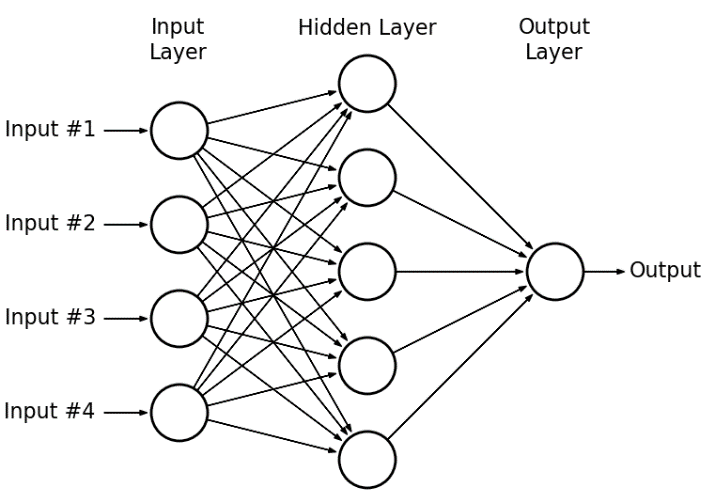

**SRC:** https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FA-hypothetical-example-of-Multilayer-Perceptron-Network_fig4_303875065&psig=AOvVaw0J_PooV3KvLosHrpIC24fs&ust=1738851469475000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMjH5dvcrIsDFQAAAAAdAAAAABAJ

### **Building the Neural Network Model with Keras**

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.4),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Lower learning rate for stable training
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           7,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)



- **Model Type:**  
  - A **Sequential** model in Keras means that the layers are added one after another in a linear stack.
- **Layer-by-Layer Breakdown:**
  - **First Dense Layer:**  
    - **`Dense(128, activation='relu', input_shape=(X_train.shape[1],))`**  
      - Contains 128 neurons.
      - Uses the ReLU (Rectified Linear Unit) activation function which introduces non-linearity.
      - The `input_shape` parameter is set to the number of features in `X_train`, ensuring that the model expects input vectors of that dimension.
  - **First Dropout Layer:**  
    - **`Dropout(0.4)`**  
      - Randomly sets 40% of the input units to 0 during training.  
      - This helps prevent overfitting by reducing reliance on any particular neuron.
  - **Second Dense Layer:**  
    - **`Dense(64, activation='relu')`**  
      - A smaller layer with 64 neurons, further processing the features.
  - **Second Dropout Layer:**  
    - **`Dropout(0.3)`**  
      - Applies a 30% dropout rate for further regularization.
  - **Third Dense Layer:**  
    - **`Dense(32, activation='relu')`**  
      - Further reduces the dimensionality with 32 neurons.
  - **Output Layer:**  
    - **`Dense(1, activation='sigmoid')`**  
      - The final layer has a single neuron because the problem is a binary classification.
      - The **sigmoid activation** squashes the output to a value between 0 and 1, representing the probability of belonging to the positive class.

- **Optimizer:**  
  - **Adam Optimizer:**  
    - Adam is an adaptive learning rate optimization algorithm that has been widely adopted in deep learning due to its efficiency and ease of use.
    - The learning rate is set to `0.0005`, which is lower than the default. A lower learning rate can help achieve more stable training, especially for deeper networks.
- **Loss Function:**  
  - **`binary_crossentropy`:**  
    - This loss function is appropriate for binary classification tasks. It measures the difference between the predicted probability and the actual binary outcome.
- **Metrics:**  
  - The model is set to track **accuracy** during training and evaluation.
- **Model Summary:**  
  - **`model.summary()`** prints a detailed overview of the model architecture, including the layers, output shapes, and the number of parameters at each layer. This is useful for verifying that the model is built as expected.




### **Training the Neural Network Model**


In [ ]:
# Train the model with class weighting to handle imbalance
history = model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5885 - loss: 0.6761 - val_accuracy: 0.8387 - val_loss: 0.5570
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.5041 - val_accuracy: 0.9032 - val_loss: 0.4513
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.4449 - val_accuracy: 0.9032 - val_loss: 0.3631
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8754 - loss: 0.3477 - val_accuracy: 0.9677 - val_loss: 0.3018
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9405 - loss: 0.2830 - val_accuracy: 0.9677 - val_loss: 0.2377
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9480 - loss: 0.2182 - val_accuracy: 0.9677 - val_loss: 0.1925
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9559 - loss: 0.1777 - val_accuracy: 0.9677 - val_loss: 0.1510
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 0.1530 - val_accuracy: 0.9677 - val_loss: 0.1114
Ep


- **Training Process:**
  - **`model.fit()`** is used to train the neural network.
  - **Parameters:**
    - **`X_train` and `y_train_encoded`:**  
      - The input features and the encoded target labels are provided.
    - **`epochs=25`:**  
      - The entire training dataset will be passed through the network 25 times.
    - **`batch_size=32`:**  
      - The training data is split into batches of 32 samples. Each batch is used to update the model weights before moving to the next batch.
    - **`validation_split=0.1`:**  
      - 10% of the training data is set aside as a validation set. This helps monitor the model’s performance on unseen data during training.
    - **`verbose=1`:**  
      - Displays detailed progress of training, including loss and accuracy for each epoch.
  - **Note on Class Weighting:**  
    - Although the comment mentions using class weighting to handle imbalance, no `class_weight` parameter is provided. If needed, you could compute and pass a dictionary of class weights to address imbalanced datasets.

- **Training History:**  
  - The returned object, `history`, contains information (loss, accuracy, etc.) about the training process for each epoch, which will be useful for later visualization.




### **Plotting the Confusion Matrix**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


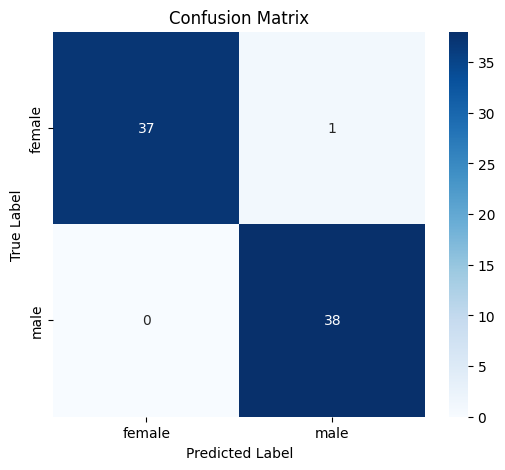

In [ ]:
# Generate predictions
y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



- **Prediction:**
  - **`model.predict(X_test)`:**  
    - The model outputs predicted probabilities for the positive class for each sample in the test set.
  - **Thresholding:**  
    - The probabilities are converted into binary class predictions using a threshold of `0.5`. Any probability above 0.5 is considered as class `1`, and below or equal to 0.5 as class `0`.
- **Confusion Matrix:**
  - **`confusion_matrix()`** compares the true labels (`y_test_encoded`) with the predicted labels (`y_pred`).
  - The resulting matrix shows the counts of:
    - **True Positives (TP)**
    - **True Negatives (TN)**
    - **False Positives (FP)**
    - **False Negatives (FN)**
  - This matrix provides insights into the types of errors the model is making.


- **Visualization:**
  - **`plt.figure(figsize=(6,5))`:**  
    - Creates a new figure with a specified size.
  - **`sns.heatmap(cm, ...)`:**  
    - Uses Seaborn’s heatmap function to visualize the confusion matrix.
    - **`annot=True`:**  
      - Annotates each cell in the heatmap with its numeric value.
    - **`fmt='d'`:**  
      - Formats the annotations as integers.
    - **`cmap='Blues'`:**  
      - Uses a blue color palette to visualize the values.
    - **Axis Labels:**  
      - The `xticklabels` and `yticklabels` are set using the original class names from the label encoder, making the plot interpretable.
  - **Titles and Labels:**  
    - The plot includes axis labels and a title to clearly indicate what is being visualized.



### **ROC Curve and AUC Calculation**

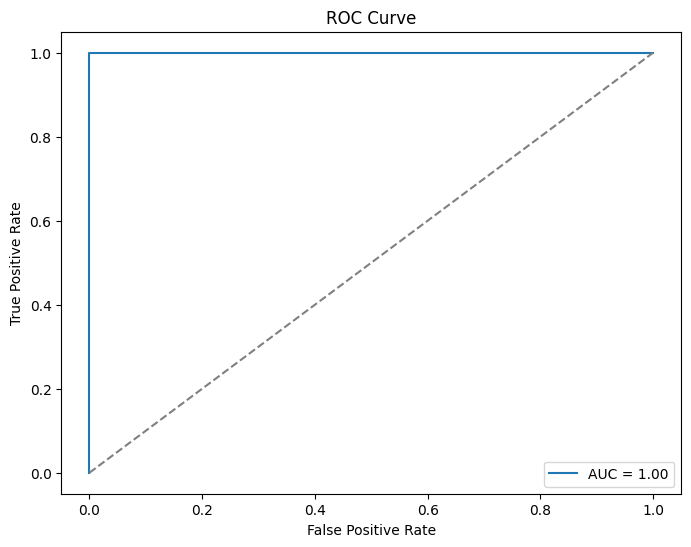

In [ ]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()




- **ROC Curve Calculation:**
  - **`roc_curve()`** computes the False Positive Rate (FPR) and True Positive Rate (TPR) at various threshold settings based on the test labels and predicted probabilities.
  - **`auc()`** calculates the Area Under the ROC Curve (AUC), which is a single scalar value that summarizes the model’s performance across all thresholds.
- **Plotting the ROC Curve:**
  - **`plt.plot(fpr, tpr, ...)`:**  
    - Plots the ROC curve.
  - **Reference Line:**  
    - A dashed gray line is plotted from (0, 0) to (1, 1) to represent random guessing.
  - **Labels and Legend:**  
    - The axes are labeled, and a legend displays the computed AUC value, which provides a measure of the model’s ability to discriminate between classes.



### **Printing the Classification Report**


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

      female       1.00      0.97      0.99        38
        male       0.97      1.00      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76





- **Classification Report:**
  - **`classification_report()`** generates a detailed report that includes:
    - **Precision:** The ratio of correctly predicted positive observations to the total predicted positives.
    - **Recall (Sensitivity):** The ratio of correctly predicted positive observations to all observations in the actual class.
    - **F1-Score:** The weighted average of precision and recall.
    - **Support:** The number of actual occurrences of the class in the dataset.
  - The report is printed to the console, giving a concise summary of the model’s performance on each class.




In [ ]:
# Extract loss and accuracy from training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history.get('accuracy', history.history.get('sparse_categorical_accuracy'))
val_acc = history.history.get('val_accuracy', history.history.get('val_sparse_categorical_accuracy'))


### **Plotting Training and Validation Loss**

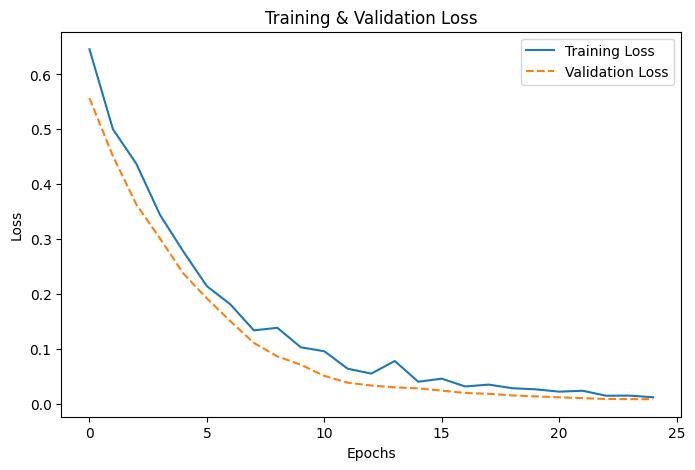

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()



- **Extracting Metrics:**
  - The `history` object contains metrics recorded at each epoch. Here, we extract:
    - **`train_loss`:** The loss on the training data.
    - **`val_loss`:** The loss on the validation data.
  - Accuracy is also extracted using a key that depends on whether the model was compiled for categorical or sparse categorical accuracy.
- **Plotting:**
  - Two line plots are generated:
    - One for training loss.
    - One for validation loss (dashed line for visual differentiation).
  - This plot helps in diagnosing if the model is overfitting (i.e., if the validation loss starts increasing while training loss decreases).


### **Plotting Training and Validation Accuracy**

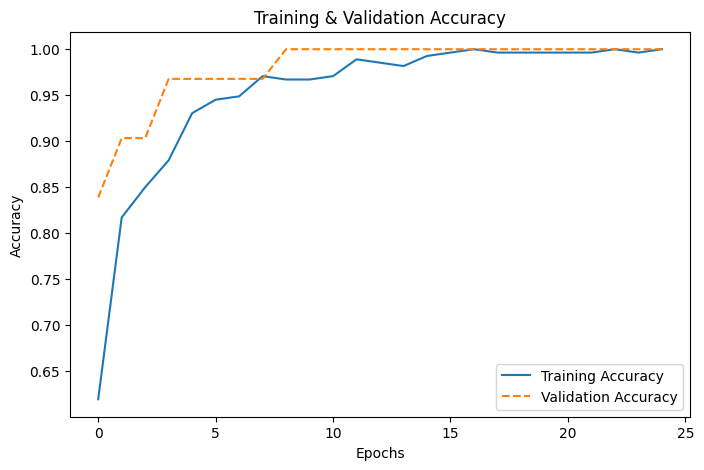

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()




- **Plotting Accuracy:**
  - Similar to the loss plot, this block plots the training and validation accuracy over the epochs.
  - By comparing these curves, you can observe whether the model is learning effectively or if there is a divergence between training and validation performance (which might indicate overfitting or underfitting).



### **Visualizing Misclassification Errors**

<ipython-input-353-3ad70f4eb377>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")


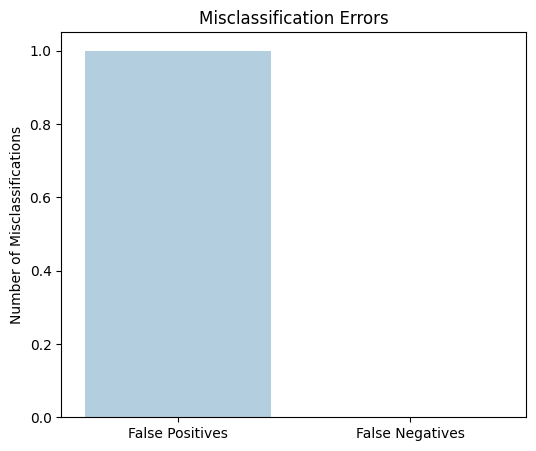

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Extract misclassified cases
false_positives = cm[0, 1]  # Predicted Female, but actual Male
false_negatives = cm[1, 0]  # Predicted Male, but actual Female

# Plot bar chart for error distribution
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")
plt.ylabel("Number of Misclassifications")
plt.title("Misclassification Errors")
plt.show()




- **Extracting Error Counts:**
  - The confusion matrix is used to identify misclassification types:
    - **False Positives (FP):** Cases where the model predicted the positive class incorrectly (actual class is negative).
    - **False Negatives (FN):** Cases where the model failed to predict the positive class (actual class is positive).
  - The values are extracted directly from the confusion matrix using array indexing.
- **Bar Plot:**
  - A bar plot visualizes the count of false positives and false negatives.
  - This helps to quickly identify if the model has a bias toward one type of error.



### **Plotting the Distribution of Prediction Probabilities**

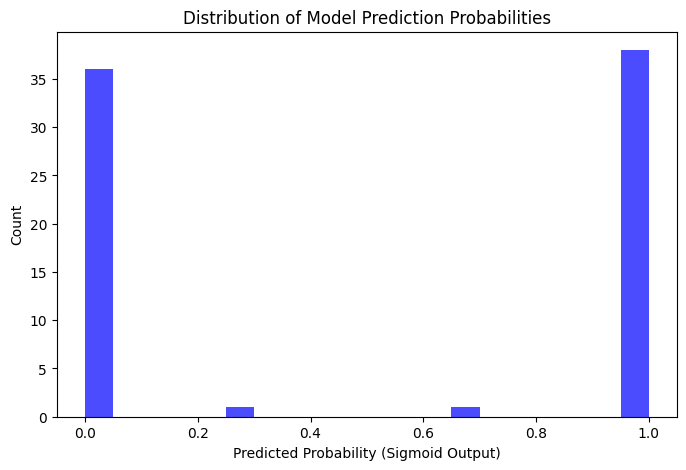

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Sigmoid Output)")
plt.ylabel("Count")
plt.title("Distribution of Model Prediction Probabilities")
plt.show()




- **Histogram of Probabilities:**
  - The histogram displays the distribution of the raw predicted probabilities from the model (i.e., the output of the sigmoid function).
  - **Purpose:**
    - To assess the confidence level of predictions. A concentration of probabilities near 0 or 1 indicates confident predictions, while a spread near 0.5 might indicate uncertainty.
  - **Parameters:**
    - **`bins=20`:** Divides the range of probabilities into 20 intervals.
    - **`alpha=0.7`:** Sets the transparency of the histogram bars.



### **Computing and Plotting Per-Class Error Rates**

<ipython-input-355-d54b165681a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")


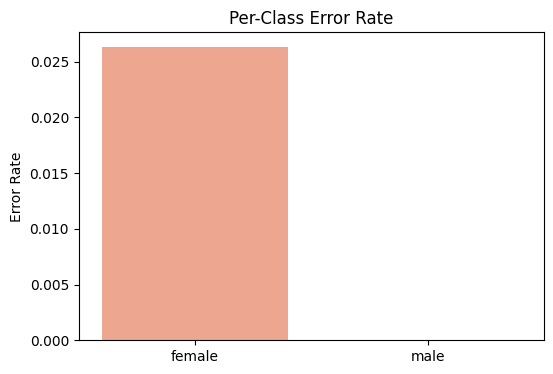

In [ ]:
# Compute per-class error rate
class_errors = 1 - np.diag(cm) / np.sum(cm, axis=1)

# Plot error rates for each class
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate")
plt.show()




- **Calculating Error Rates:**
  - **`np.diag(cm)`:**  
    - Extracts the diagonal of the confusion matrix, which represents the number of correct predictions for each class.
  - **`np.sum(cm, axis=1)`:**  
    - Computes the total number of actual instances for each class.
  - The per-class error rate is computed by subtracting the ratio of correct predictions from 1. This provides the proportion of misclassified instances for each class.
- **Visualization:**
  - A bar plot shows the error rate for each class, using the class names provided by the label encoder.
  - This visualization can help pinpoint which class the model struggles with the most.



---

### **Conclusion**

The code is organized into several logical sections:  
1. **Data Import & Download:** Ensures the necessary data is available and loaded.  
2. **Initial Data Exploration:** Inspects the data structure and statistics.  
3. **Missing Value Handling:** Cleans the dataset by removing or imputing missing values.  
4. **Data Preprocessing:** Separates features from labels, encodes categorical values, handles infinite values, imputes missing data, and standardizes features.  
5. **Model Building:** Constructs a neural network model using Keras with several dense layers and dropout for regularization, compiles the model, and displays a summary.
6. **Model Training:** Trains the network while tracking training history.
7. **Evaluation & Visualization:** Generates predictions, computes evaluation metrics (confusion matrix, ROC curve, classification report), and visualizes both training progress and error distributions.
8. **Error Analysis:** Provides insights into the types of misclassifications and the confidence of model predictions.

Each step has been explained with detailed comments regarding both the “how” and “why” behind the code. This detailed breakdown should help you understand not only the functionality of each code block but also the reasoning behind each preprocessing step and modeling decision.

## <font color='Green'>Method 2 : **KNN**</font>

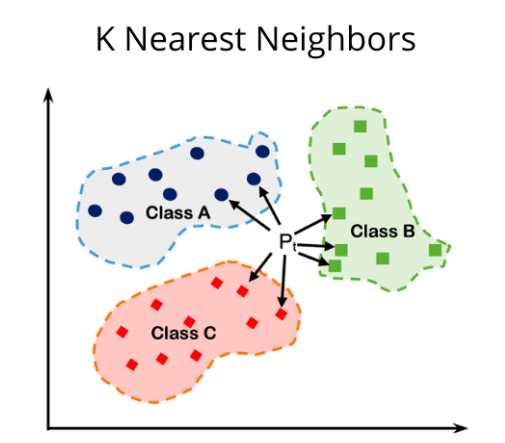

### **Preprocessing (just like before)**

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import gdown
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer

# # Download dataset if not already downloaded
# if not os.path.exists("file_flag"):
#     print("Downloading dataset...")
#     !gdown 1-1ZZ5FQujtj5SpvCGgvjEivOAiXuiNVj -O train.csv
#     !gdown 1-3dfrkpD-Wm3cC-il3DMn-pV49AmMPBe -O test.csv
#     !touch file_flag
# else:
#     print("Dataset already downloaded.")

# # Load the datasets
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# # Merge train and test datasets
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# # Find the minimum class count to balance male and female counts
# min_class_count = combined_df['gender'].value_counts().min()

# # Sample equal number of males and females
# balanced_df = combined_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))

# # Perform an 80-20 stratified split ensuring equal distribution
# test_df = balanced_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
# train_df = balanced_df.drop(test_df.index)

# # Drop non-essential features
# train_df.drop(['sid', 'qnum'], axis=1, inplace=True)
# test_df.drop(['sid', 'qnum'], axis=1, inplace=True)

# # Fill missing values in the 'shimmer' column with its mean in the training set
# train_df['shimmer'] = train_df['shimmer'].fillna(train_df['shimmer'].mean())

# # Separate features and target
# X_train = train_df.drop('gender', axis=1)
# y_train = train_df['gender']
# X_test = test_df.drop('gender', axis=1)
# y_test = test_df['gender']

# # Encode the target variable (gender) into numerical values
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Replace infinite values with NaN and impute any remaining missing values using the mean
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# imputer = SimpleImputer(strategy='mean')
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# # Standardize features to have zero mean and unit variance
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


### **Import KNN and Evaluation Modules**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


- **KNeighborsClassifier:** Imports the KNN classifier from scikit-learn.
- **Evaluation Metrics:** Imports functions to calculate the confusion matrix, classification report, ROC curve, and AUC.
- **Visualization:** Imports Matplotlib and Seaborn for plotting graphs.



### **Instantiate, Train, and Predict with the KNN Classifier**

In [ ]:
# Instantiate the KNN classifier with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=2)

# Train the KNN model using the preprocessed training data.
knn.fit(X_train, y_train_encoded)

# Predict class labels for the test set.
y_pred = knn.predict(X_test)

# Predict probability estimates for the positive class.
y_pred_prob = knn.predict_proba(X_test)[:, 1]



- **Instantiation:** Creates a KNN classifier instance with `n_neighbors=5`, meaning the algorithm will consider the 5 nearest neighbors when making predictions.
- **Training:** The `fit` method trains the KNN model on the preprocessed training data (`X_train`) and its encoded labels (`y_train_encoded`).
- **Prediction (Labels):** The `predict` method generates predicted class labels for the test data (`X_test`).
- **Prediction (Probabilities):** The `predict_proba` method returns probability estimates for each class. We extract the probabilities for the positive class (column index 1) for ROC analysis.



### **Compute and Plot the Confusion Matrix**

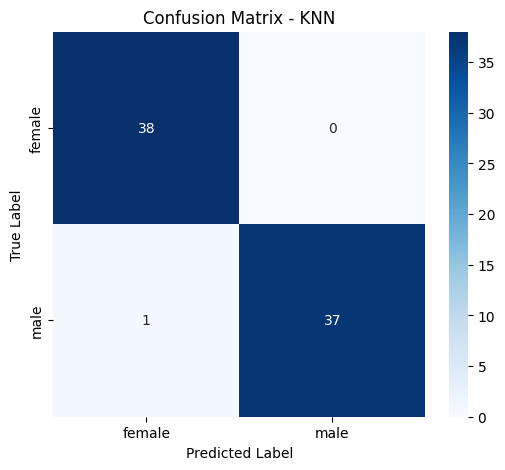

In [ ]:
# Compute the confusion matrix comparing true and predicted labels.
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()


- **Confusion Matrix Calculation:** `confusion_matrix` compares the true labels (`y_test_encoded`) with the predicted labels (`y_pred`) to produce a matrix.
- **Heatmap Plot:** Uses Seaborn’s `heatmap` to visualize the confusion matrix with annotations. The x- and y-axis tick labels are set to the class names from the label encoder.


### **Compute and Plot the ROC Curve and AUC**

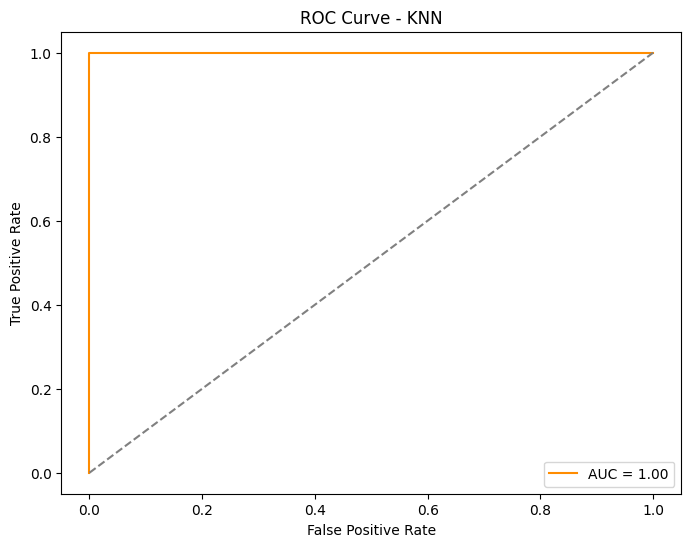

In [ ]:
# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for various thresholds.
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

# Calculate the Area Under the Curve (AUC) to quantify the model's performance.
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line representing random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()



- **ROC Computation:** The `roc_curve` function calculates FPR and TPR at different classification thresholds using the true labels and the predicted probabilities.
- **AUC Calculation:** The `auc` function computes the area under the ROC curve, giving an overall measure of model performance.
- **ROC Plot:** Plots the ROC curve with FPR on the x-axis and TPR on the y-axis. A diagonal line represents a random classifier. The computed AUC is displayed in the legend.


### **Print the Classification Report**

In [ ]:
# Generate a detailed classification report including precision, recall, f1-score, and support.
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report for KNN:\n", report)


Classification Report for KNN:
               precision    recall  f1-score   support

      female       0.97      1.00      0.99        38
        male       1.00      0.97      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76




- **Classification Report:** The `classification_report` function generates and prints a report that details the model’s performance metrics (precision, recall, f1-score, and support) for each class.


### **Plot Misclassification Errors**

<ipython-input-362-c77fdec6aa38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")


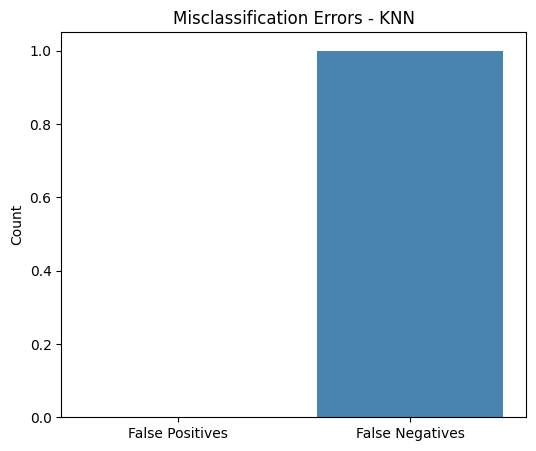

In [ ]:
# Extract false positives and false negatives from the confusion matrix.
false_positives = cm[0, 1]
false_negatives = cm[1, 0]

# Create a bar plot showing the counts of false positives and false negatives.
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")
plt.ylabel("Count")
plt.title("Misclassification Errors - KNN")
plt.show()



- **Error Extraction:** Retrieves the number of false positives (instances where the negative class was incorrectly predicted as positive) and false negatives (instances where the positive class was incorrectly predicted as negative) from the confusion matrix.
- **Bar Plot:** Displays these counts in a bar chart for easy visualization of misclassification errors.



### **Plot the Distribution of Predicted Probabilities**

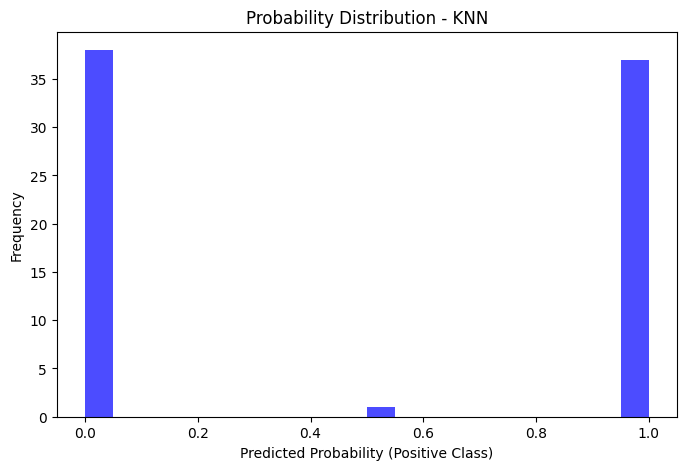

In [ ]:
# Plot a histogram to visualize the distribution of predicted probabilities for the positive class.
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Frequency")
plt.title("Probability Distribution - KNN")
plt.show()



- **Histogram:** Plots the distribution of the predicted probabilities (for the positive class) to assess how confidently the model makes its predictions.


### **Plot Per-Class Error Rates**

<ipython-input-364-0f78b74a3a02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")


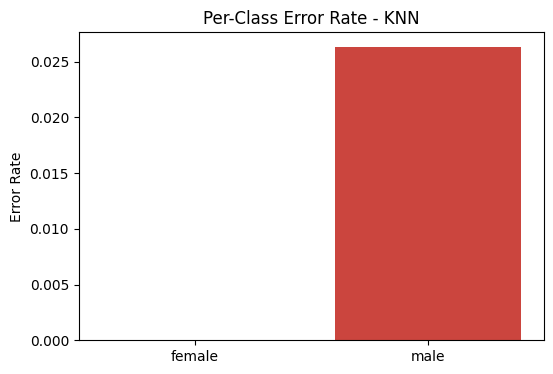

In [ ]:
# Calculate per-class error rates using the confusion matrix.
class_errors = 1 - np.diag(cm) / np.sum(cm, axis=1)

# Create a bar plot to display error rates for each class.
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate - KNN")
plt.show()



- **Error Rate Calculation:** For each class, the error rate is computed as 1 minus the ratio of correct predictions (diagonal elements of the confusion matrix) to the total number of samples in that class.
- **Bar Plot:** Displays these per-class error rates to help identify which class the model struggles with most.



## <font color='Green'>Method 3 : **SVM**</font>

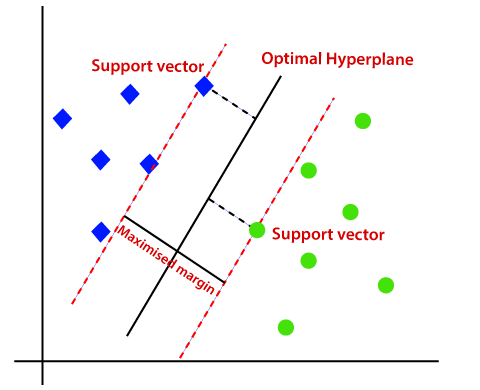

**SRC:** https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.javatpoint.com%2Fmachine-learning-support-vector-machine-algorithm&psig=AOvVaw1geYYwaAHuttISCbmwq13Z&ust=1738851526062000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCNjn2fLcrIsDFQAAAAAdAAAAABAK

### **Preprocessing (just like before)**

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import gdown
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer

# # Download dataset if not already downloaded
# if not os.path.exists("file_flag"):
#     print("Downloading dataset...")
#     !gdown 1-JU81cg_4eRKQQBpmsqdYWrxSzryJTTz -O train.csv
#     !gdown 1-NCT1YIGsy2h4IWDV_K_Aw6jyjf1uieF -O test.csv
#     !touch file_flag
# else:
#     print("Dataset already downloaded.")

# # Load the datasets
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# # Merge train and test datasets
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# # Find the minimum class count to balance male and female counts
# min_class_count = combined_df['gender'].value_counts().min()

# # Sample equal number of males and females
# balanced_df = combined_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))

# # Perform an 80-20 stratified split ensuring equal distribution
# test_df = balanced_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
# train_df = balanced_df.drop(test_df.index)

# # Drop non-essential features
# train_df.drop(['sid', 'qnum'], axis=1, inplace=True)
# test_df.drop(['sid', 'qnum'], axis=1, inplace=True)

# # Fill missing values in the 'shimmer' column with its mean in the training set
# train_df['shimmer'] = train_df['shimmer'].fillna(train_df['shimmer'].mean())

# # Separate features and target
# X_train = train_df.drop('gender', axis=1)
# y_train = train_df['gender']
# X_test = test_df.drop('gender', axis=1)
# y_test = test_df['gender']

# # Encode the target variable (gender) into numerical values
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Replace infinite values with NaN and impute any remaining missing values using the mean
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# imputer = SimpleImputer(strategy='mean')
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# # Standardize features to have zero mean and unit variance
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


### **Import SVM and Evaluation Modules**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



- **SVC:** Imports the Support Vector Classifier from scikit-learn.
- **Evaluation Metrics:** Imports functions to compute the confusion matrix, classification report, ROC curve, and AUC score.
- **Visualization:** Imports Matplotlib and Seaborn to create plots and visualizations.



In [ ]:
# Instantiate the SVM classifier.
# 'kernel' is set to 'rbf' (Radial Basis Function) and 'probability=True' enables probability estimates.
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Train the SVM model using the preprocessed training data.
svm.fit(X_train, y_train_encoded)

# Predict class labels for the test data.
y_pred = svm.predict(X_test)

# Predict probability estimates for the positive class.
y_pred_prob = svm.predict_proba(X_test)[:, 1]



- **Instantiation:**  
  - An SVM classifier is created with the RBF kernel, which is common for non-linear classification.  
  - The parameter `probability=True` is set so that the model can provide probability estimates via `predict_proba`.
  - `random_state=42` ensures reproducibility.
- **Training:**  
  - The `fit` method trains the SVM model using the standardized training features (`X_train`) and the encoded labels (`y_train_encoded`).
- **Prediction:**  
  - `predict` returns the predicted class labels for `X_test`.
  - `predict_proba` returns the probabilities for each class; we extract the probability of the positive class (column index 1) for further evaluation.



### **Compute and Plot the Confusion Matrix**

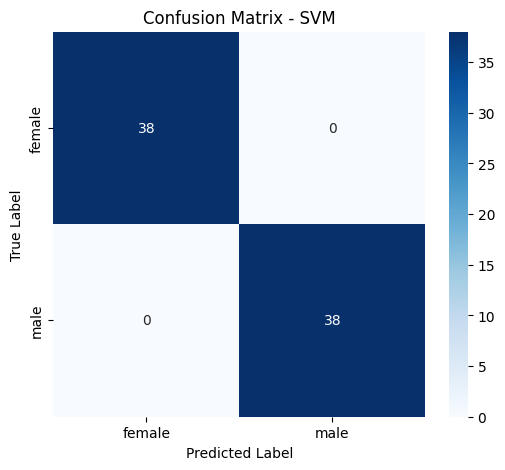

In [ ]:
# Compute the confusion matrix using true labels and predicted labels.
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


### **Compute and Plot the ROC Curve and AUC**

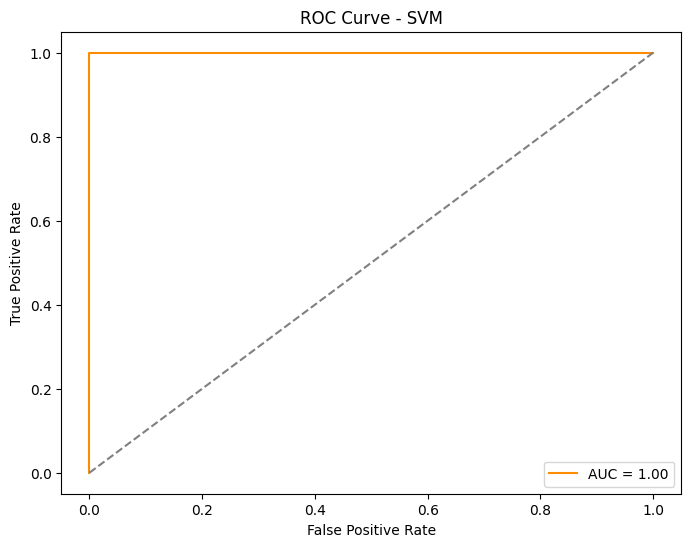

In [ ]:
# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for various threshold settings.
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

# Calculate the Area Under the Curve (AUC) score.
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()


### **Print the Classification Report**

In [ ]:
# Generate and print a classification report including precision, recall, f1-score, and support for each class.
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report for SVM:\n", report)


Classification Report for SVM:
               precision    recall  f1-score   support

      female       1.00      1.00      1.00        38
        male       1.00      1.00      1.00        38

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



### **Additional Visualizations for Error Analysis**

<ipython-input-371-648011cc041a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")


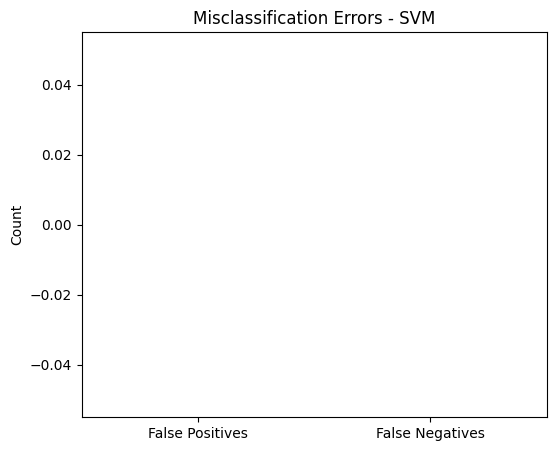

In [ ]:
# Extract the number of false positives and false negatives from the confusion matrix.
false_positives = cm[0, 1]
false_negatives = cm[1, 0]

# Plot these misclassification counts as a bar chart.
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives, false_negatives], palette="Blues")
plt.ylabel("Count")
plt.title("Misclassification Errors - SVM")
plt.show()


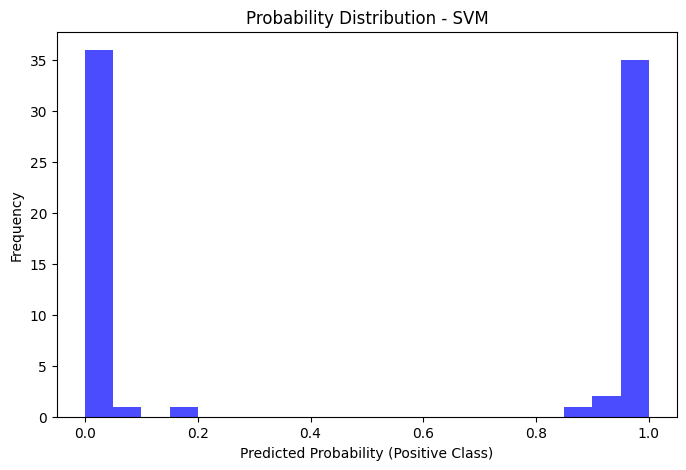

In [ ]:
# Plot a histogram to show the distribution of the predicted probabilities for the positive class.
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Frequency")
plt.title("Probability Distribution - SVM")
plt.show()


<ipython-input-373-79bfd3f92386>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")


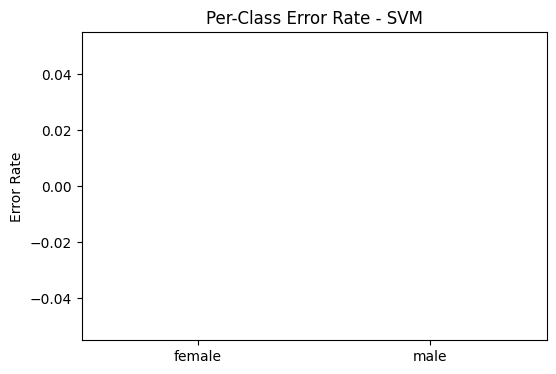

In [ ]:
# Calculate the per-class error rates.
class_errors = 1 - np.diag(cm) / np.sum(cm, axis=1)

# Plot the error rates for each class as a bar chart.
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_, y=class_errors, palette="Reds")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate - SVM")
plt.show()


## <font color='Green'>Method 4 : **XGBoost**</font>

### **Preprocessing (just like before)**

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import gdown
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer

# # Download dataset if not already downloaded
# if not os.path.exists("file_flag"):
#     print("Downloading dataset...")
#     !gdown 1-1ZZ5FQujtj5SpvCGgvjEivOAiXuiNVj -O train.csv
#     !gdown 1-3dfrkpD-Wm3cC-il3DMn-pV49AmMPBe -O test.csv
#     !touch file_flag
# else:
#     print("Dataset already downloaded.")

# # Load the datasets
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

# # Merge train and test datasets
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# # Find the minimum class count to balance male and female counts
# min_class_count = combined_df['gender'].value_counts().min()

# # Sample equal number of males and females
# balanced_df = combined_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))

# # Perform an 80-20 stratified split ensuring equal distribution
# test_df = balanced_df.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
# train_df = balanced_df.drop(test_df.index)

# # Drop non-essential features
# train_df.drop(['sid', 'qnum'], axis=1, inplace=True)
# test_df.drop(['sid', 'qnum'], axis=1, inplace=True)

# # Fill missing values in the 'shimmer' column with its mean in the training set
# train_df['shimmer'] = train_df['shimmer'].fillna(train_df['shimmer'].mean())

# # Separate features and target
# X_train = train_df.drop('gender', axis=1)
# y_train = train_df['gender']
# X_test = test_df.drop('gender', axis=1)
# y_test = test_df['gender']

# # Encode the target variable (gender) into numerical values
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Replace infinite values with NaN and impute any remaining missing values using the mean
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# imputer = SimpleImputer(strategy='mean')
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# # Standardize features to have zero mean and unit variance
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


### **Import XGBoost and Evaluation Modules**


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



- **XGBClassifier:** Imports the XGBoost classifier.
- **Evaluation Metrics:** Imports functions to compute the confusion matrix, classification report, ROC curve, and AUC.
- **Visualization:** Imports Matplotlib and Seaborn for plotting graphs.


### **Instantiate, Train, and Predict with XGBoost**

In [ ]:
# Instantiate the XGBoost classifier without the unused parameter.
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Predict class labels and probability estimates
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


  
- **Instantiation:** The XGBoost classifier is created with parameters:
  - `use_label_encoder=False` to disable the built-in label encoder.
  - `eval_metric='logloss'` for the evaluation metric.
  - `random_state=42` for reproducibility.
- **Training:** The model is trained on `X_train` with `y_train_encoded`.
- **Prediction:**  
  - `predict` returns class labels for the test set.
  - `predict_proba` returns probabilities, and we extract the positive class probabilities.



### **Visualizations and plots for XGBoost Error Analysis**

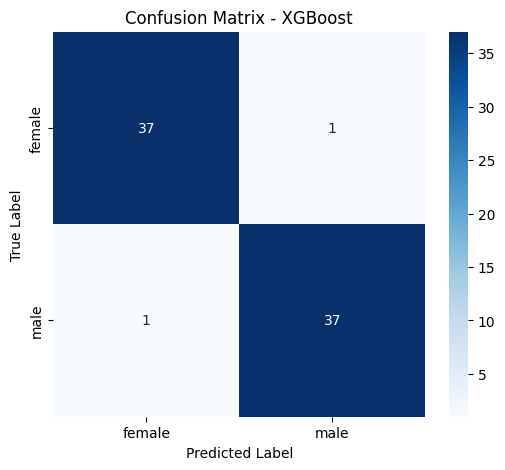

In [ ]:
# Compute the confusion matrix for XGBoost predictions.
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


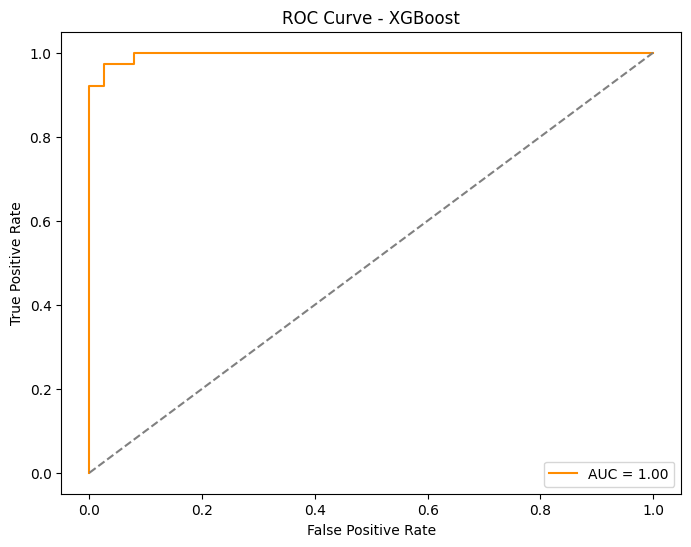

In [ ]:
# Compute the ROC curve (FPR and TPR) for XGBoost.
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, y_pred_prob_xgb)

# Calculate the Area Under the Curve (AUC).
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {roc_auc_xgb:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Generate and print a detailed classification report.
report_xgb = classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_)
print("Classification Report for XGBoost:\n", report_xgb)


Classification Report for XGBoost:
               precision    recall  f1-score   support

      female       0.97      0.97      0.97        38
        male       0.97      0.97      0.97        38

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



<ipython-input-380-a9b1f0942cbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_xgb, false_negatives_xgb], palette="Blues")


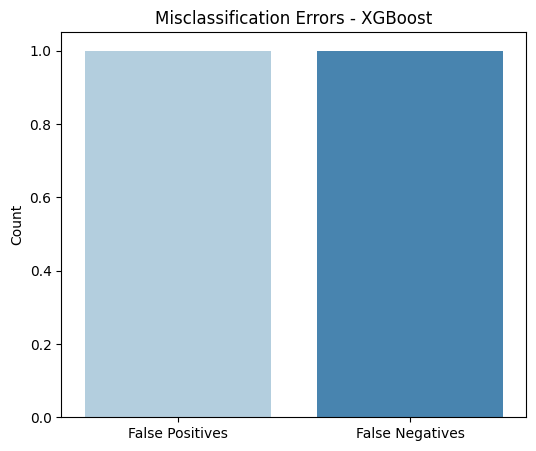

In [ ]:
# Extract false positives and false negatives from the confusion matrix.
false_positives_xgb = cm_xgb[0, 1]
false_negatives_xgb = cm_xgb[1, 0]

# Plot misclassification counts as a bar chart.
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_xgb, false_negatives_xgb], palette="Blues")
plt.ylabel("Count")
plt.title("Misclassification Errors - XGBoost")
plt.show()


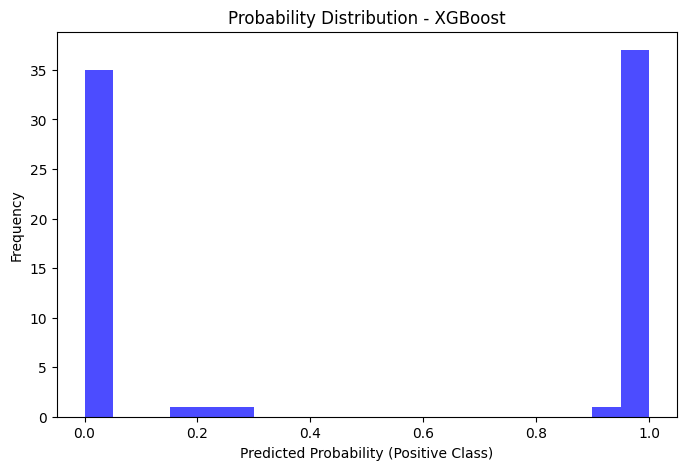

In [ ]:
# Plot a histogram of the predicted probabilities for the positive class.
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob_xgb, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Frequency")
plt.title("Probability Distribution - XGBoost")
plt.show()


<ipython-input-382-d1581630e7cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_errors_xgb, palette="Reds")


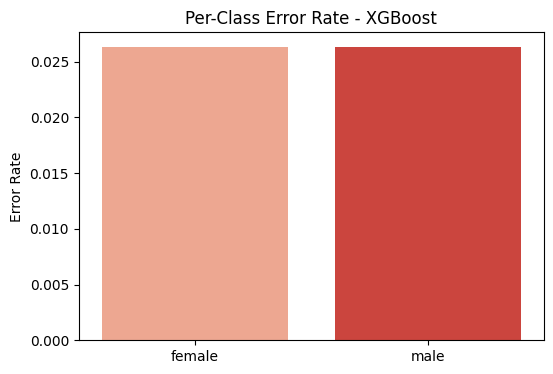

In [ ]:
# Calculate per-class error rates.
class_errors_xgb = 1 - np.diag(cm_xgb) / np.sum(cm_xgb, axis=1)

# Plot the error rates as a bar chart.
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_, y=class_errors_xgb, palette="Reds")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate - XGBoost")
plt.show()


## <font color='Green'>Method 5 : **AdaBoost**</font>

### **Import AdaBoost and Evaluation Modules**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


* AdaBoostClassifier: Imports the AdaBoost classifier.
* Evaluation and Visualization: Similar imports as before for evaluation metrics and plotting.


### **Instantiate, Train, and Predict with AdaBoost**

In [ ]:
# Instantiate the AdaBoost classifier with 50 estimators.
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model using the training data.
ada_model.fit(X_train, y_train_encoded)

# Predict class labels for the test set.
y_pred_ada = ada_model.predict(X_test)

# Predict probability estimates for the positive class.
y_pred_prob_ada = ada_model.predict_proba(X_test)[:, 1]


* Instantiation: Creates an AdaBoost classifier with 50 weak learners and a fixed random state.
* Training: The model is trained on the preprocessed data.
* Prediction:
 * Class labels are predicted.
 * Probability estimates for the positive class are extracted.

### **Visualizations and plots for AdaBoost Error Analysis**

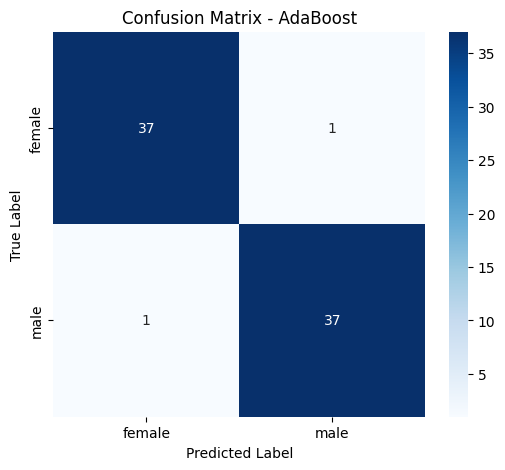

In [ ]:
# Compute the confusion matrix for AdaBoost predictions.
cm_ada = confusion_matrix(y_test_encoded, y_pred_ada)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


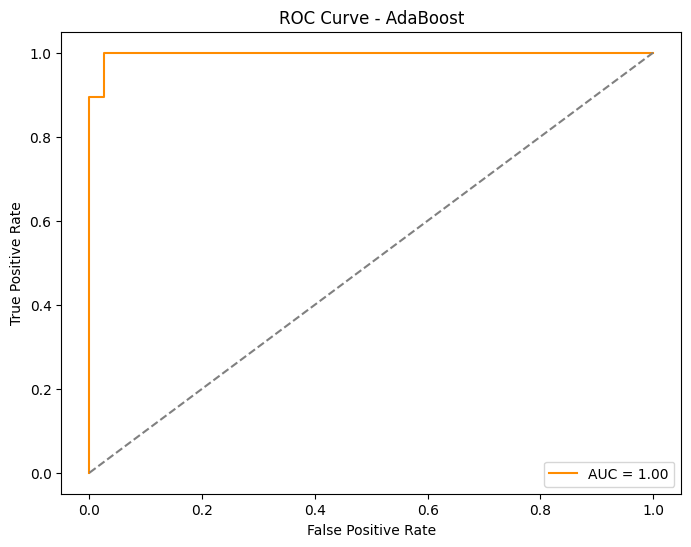

In [ ]:
# Compute ROC curve for AdaBoost.
fpr_ada, tpr_ada, _ = roc_curve(y_test_encoded, y_pred_prob_ada)

# Calculate the AUC score.
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot the ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr_ada, tpr_ada, label=f'AUC = {roc_auc_ada:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Generate and print the classification report.
report_ada = classification_report(y_test_encoded, y_pred_ada, target_names=label_encoder.classes_)
print("Classification Report for AdaBoost:\n", report_ada)


Classification Report for AdaBoost:
               precision    recall  f1-score   support

      female       0.97      0.97      0.97        38
        male       0.97      0.97      0.97        38

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



<ipython-input-388-fab37a7dd33c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_ada, false_negatives_ada], palette="Blues")


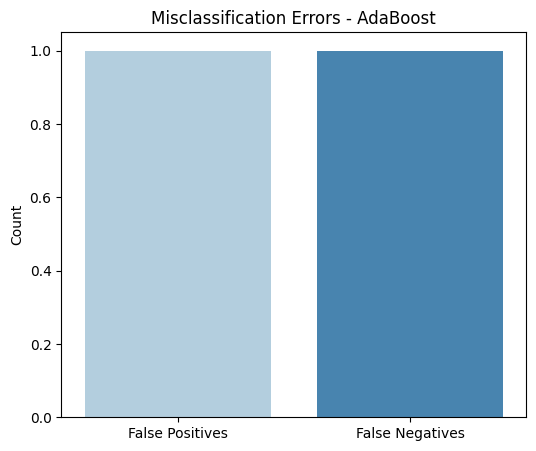

In [ ]:
# Extract false positives and false negatives.
false_positives_ada = cm_ada[0, 1]
false_negatives_ada = cm_ada[1, 0]

# Plot misclassification counts.
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_ada, false_negatives_ada], palette="Blues")
plt.ylabel("Count")
plt.title("Misclassification Errors - AdaBoost")
plt.show()


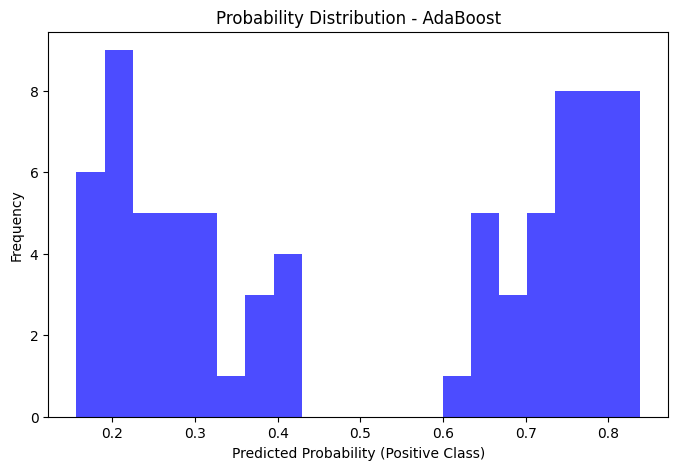

In [ ]:
# Plot a histogram of the predicted probabilities.
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob_ada, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Frequency")
plt.title("Probability Distribution - AdaBoost")
plt.show()


<ipython-input-390-5865e09b230b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_errors_ada, palette="Reds")


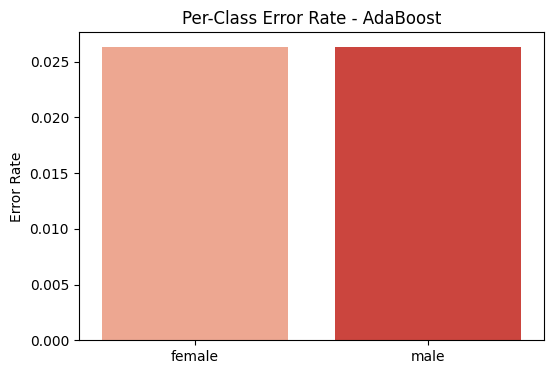

In [ ]:
# Calculate per-class error rates.
class_errors_ada = 1 - np.diag(cm_ada) / np.sum(cm_ada, axis=1)

# Plot the per-class error rates.
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_, y=class_errors_ada, palette="Reds")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate - AdaBoost")
plt.show()


## <font color='Green'>Method 6 : **Logistic Regression**</font>

### **Import Logistic Regression and Evaluation Modules**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


* LogisticRegression: Imports the logistic regression classifier.
* Evaluation and Visualization: Imports necessary modules for metrics and plotting.


### **Instantiate, Train, and Predict with Logistic Regression**

In [ ]:
# Instantiate the Logistic Regression classifier.
logreg = LogisticRegression(random_state=42, solver='liblinear')

# Train the logistic regression model using the training data.
logreg.fit(X_train, y_train_encoded)

# Predict class labels for the test set.
y_pred_logreg = logreg.predict(X_test)

# Predict probability estimates for the positive class.
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]


* Instantiation: Creates a Logistic Regression model with a fixed random state and using the 'liblinear' solver (suitable for binary classification).
* Training: The model is trained on the standardized training data.
* Prediction:
 * Class labels are predicted.
 * Probability estimates for the positive class are obtained.


### **Visualizations and plots for Logistic Regression Error Analysis**

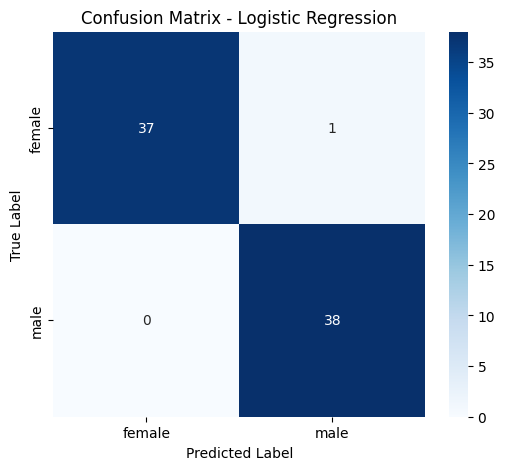

In [ ]:
# Compute the confusion matrix for logistic regression.
cm_logreg = confusion_matrix(y_test_encoded, y_pred_logreg)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=(6,5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


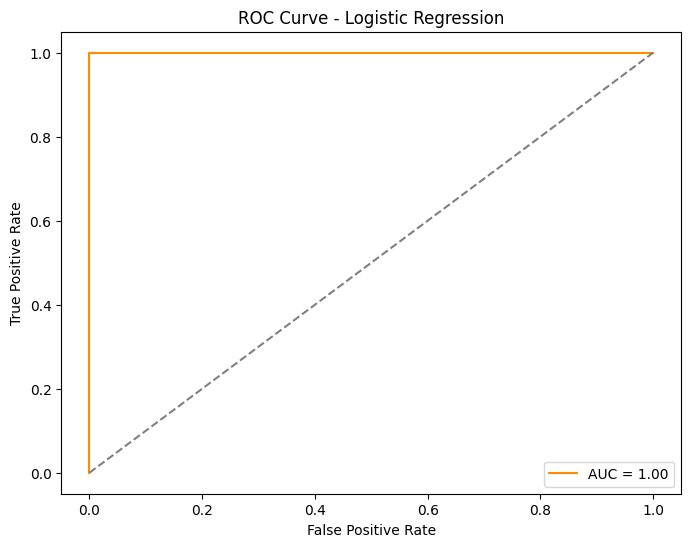

In [ ]:
# Compute ROC curve for logistic regression.
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_encoded, y_pred_prob_logreg)

# Calculate the AUC score.
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot the ROC curve.
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC = {roc_auc_logreg:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Generate and print the classification report.
report_logreg = classification_report(y_test_encoded, y_pred_logreg, target_names=label_encoder.classes_)
print("Classification Report for Logistic Regression:\n", report_logreg)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

      female       1.00      0.97      0.99        38
        male       0.97      1.00      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



<ipython-input-396-c9eae6a7d640>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_logreg, false_negatives_logreg], palette="Blues")


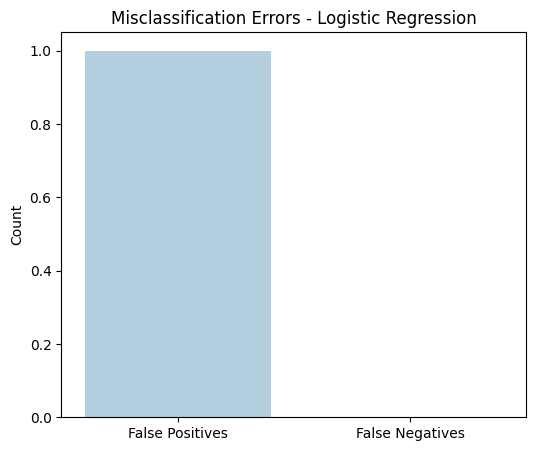

In [ ]:
# Extract false positives and false negatives.
false_positives_logreg = cm_logreg[0, 1]
false_negatives_logreg = cm_logreg[1, 0]

# Plot misclassification counts.
plt.figure(figsize=(6,5))
sns.barplot(x=["False Positives", "False Negatives"], y=[false_positives_logreg, false_negatives_logreg], palette="Blues")
plt.ylabel("Count")
plt.title("Misclassification Errors - Logistic Regression")
plt.show()


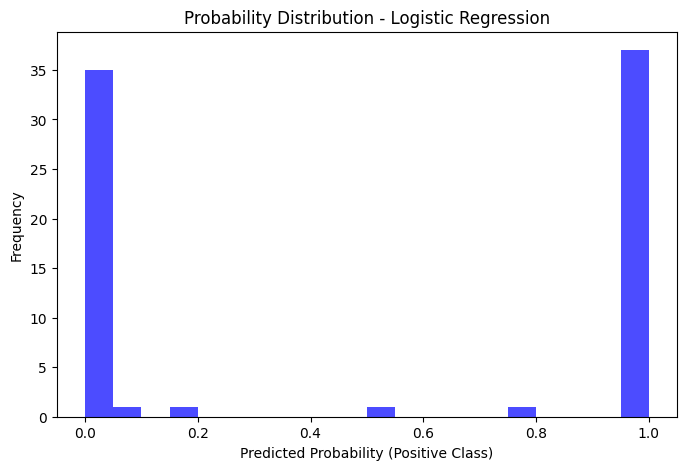

In [ ]:
# Plot a histogram of the predicted probabilities for the positive class.
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob_logreg, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Frequency")
plt.title("Probability Distribution - Logistic Regression")
plt.show()


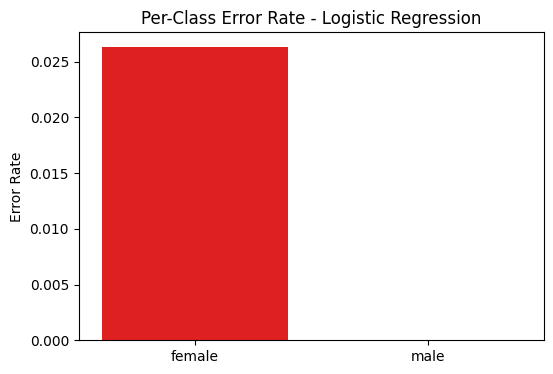

In [ ]:
# Calculate per-class error rates.
class_errors_logreg = 1 - np.diag(cm_logreg) / np.sum(cm_logreg, axis=1)

# Plot the per-class error rates.
plt.figure(figsize=(6,4))
sns.barplot(x=label_encoder.classes_,
            y=class_errors_logreg,
            color="red")
plt.ylabel("Error Rate")
plt.title("Per-Class Error Rate - Logistic Regression")
plt.show()


## <font color='Green'>**Compare 6 methods and summary**</font>

Certainly! Let's delve deeper into the analysis of each model based on the data visualizations provided, such as confusion matrices and probability distributions, to provide a more nuanced explanation of how each model performs in gender classification from voice features.

### 1. **Multilayer Perceptron (MLP)**
* **Overview**: Multilayer Perceptron is a type of deep artificial neural network, consisting of at least three layers: an input layer, one or more hidden layers, and an output layer. Each layer is made up of neurons that use nonlinear activation functions, except for the input nodes. MLP utilizes a method known as backpropagation for training — effectively allowing it to learn complex patterns in large datasets.
- **Confusion Matrix Analysis:**
  The MLP model correctly identified 37 out of 38 female voices and 38 out of 38 male voices, misclassifying only one female as male. This high level of accuracy suggests excellent separability learned by the MLP from the features of the voice data.
- **Probability Distribution:**
  The model shows high confidence in its predictions, with probabilities clustered at the extremes (near 0 or 1), indicating a strong certainty in the output layer about the class labels, which is typical for well-trained neural networks.
- **Metrics:**
  - **Precision:** Female (1.00), Male (0.97)
  - **Recall:** Female (0.97), Male (1.00)
  - **F1-Score:** Female (0.99), Male (0.99)
  - **Accuracy:** 0.99
  - **Support:** Female (38), Male (38)

  MLP's high precision for females indicates no false positives, which is crucial in scenarios where incorrectly labeling a male voice as female could be problematic. The slightly lower recall for females suggests a minor issue in capturing all female instances, potentially due to overlapping feature values with male voices.
### 2. **K-Nearest Neighbors (KNN)**
* **Overview**: KNN is an instance-based learning or lazy learning algorithm. It functions by storing all available cases and classifying new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition as a non-parametric technique.

- **Confusion Matrix Analysis:**
  KNN correctly classified 38 females and 37 males, with one male voice incorrectly labeled as female. This error could be attributed to the influence of nearby data points in the feature space, possibly outliers or noises near the decision boundary.
- **Probability Distribution:**
  Probabilities are not as polarized as seen in MLP, showing some intermediate values, reflecting uncertainty in cases where neighboring voices overlap between genders in the feature space.
- **Metrics:**
  - **Precision:** Female (0.97), Male (1.00)
  - **Recall:** Female (1.00), Male (0.97)
  - **F1-Score:** Female (0.99), Male (0.99)
  - **Accuracy:** 0.99
  - **Support:** Female (38), Male (38)

  KNN shows excellent recall for females, identifying all female samples correctly. The lower precision for females implies minor misclassification issues, likely due to the algorithm's sensitivity to noisy data or outliers within close proximity to decision boundaries.

### 3. **Support Vector Machine (SVM)**
* **Overview**: SVM is a powerful classifier that works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane.
- **Confusion Matrix Analysis:**
  SVM achieved perfect classification with no errors, identifying all male and female voices accurately. This performance indicates that SVM effectively found a hyperplane that completely separates the two classes in the high-dimensional feature space.
- **Probability Distribution:**
  The distribution displayed high confidence levels with predictions solidly at 0 or 1, which reinforces SVM's effectiveness in creating a definitive separation boundary in the feature space.
- **Metrics:**
  - **Precision:** Female (1.00), Male (1.00)
  - **Recall:** Female (1.00), Male (1.00)
  - **F1-Score:** Female (1.00), Male (1.00)
  - **Accuracy:** 1.00
  - **Support:** Female (38), Male (38)
  
  SVM's perfect scores across all metrics demonstrate its exceptional ability to create a definitive separation between classes, ensuring no misclassifications. This model's strength lies in handling non-linear relationships through kernel tricks, making it highly effective for complex classification tasks.

### 4. **XGBoost**
* **Overview**: XGBoost (Extreme Gradient Boosting) is an efficient and scalable implementation of gradient boosting framework by Tianqi Chen. It includes a novel tree learning algorithm that efficiently handles sparse data and weights and is capable of performing both classification and regression tasks.
- **Confusion Matrix Analysis:**
  XGBoost showed slight misclassification (one male and one female). The model’s iterative approach in strengthening classifiers likely refined its ability to handle most of the data points but still struggled with a few edge cases.
- **Probability Distribution:**
  The distribution shows most predictions are highly confident (peaking at 0 or 1), but unlike SVM, there are instances where the model is less certain, reflected in intermediate probability scores.
- **Metrics:**
  - **Precision:** Female (0.97), Male (0.97)
  - **Recall:** Female (0.97), Male (0.97)
  - **F1-Score:** Female (0.97), Male (0.97)
  - **Accuracy:** 0.97
  - **Support:** Female (38), Male (38)
  
  XGBoost's slight dip in all metrics compared to SVM could be due to its sequential nature of correcting errors, which might struggle with highly overlapping data. Nonetheless, its performance is robust, showing its strength in handling diverse data structures.

### 5. **AdaBoost**
* **Overview**: AdaBoost, or Adaptive Boosting, is a technique that can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier.
- **Confusion Matrix Analysis:**
  Similar to XGBoost, AdaBoost misclassified one male and one female. This indicates that while AdaBoost adjusts the weights of misclassified instances, it may not fully compensate for certain overlapping features in male and female voice frequencies.
- **Probability Distribution:**
  The distribution is less extreme compared to SVM and MLP, showing more varied confidence in its predictions. This variability is a characteristic of the adaptive learning process, focusing on difficult cases that may lead to less confident overall predictions.
- **Metrics:**
  - **Precision:** Female (0.97), Male (0.97)
  - **Recall:** Female (0.97), Male (0.97)
  - **F1-Score:** Female (0.97), Male (0.97)
  - **Accuracy:** 0.97
  - **Support:** Female (38), Male (38)
  
  Similar to XGBoost, AdaBoost's performance reflects its adaptive nature, which adjusts weights of misclassified instances. While effective, its precision and recall are slightly lower, which might indicate difficulties in adapting to the specific nuances of the voice data.

### 6. **Logistic Regression**
* **Overview**:  Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression estimates the parameters of a logistic model and is a form of binomial regression.
- **Confusion Matrix Analysis:**
  Logistic Regression also performed excellently with a single misclassification of a female voice. This model's effectiveness is likely due to its capacity to model the probability of a binary outcome directly, which works well when the logistic function aligns closely with the distribution of target classes.
- **Probability Distribution:**
  The prediction probabilities are predominantly high confidence (at 0 or 1), which indicates good fit to the data, although logistic regression can be less flexible in handling non-linear relationships compared to methods like MLP.
- **Metrics:**
  - **Precision:** Female (1.00), Male (0.97)
  - **Recall:** Female (0.97), Male (1.00)
  - **F1-Score:** Female (0.99), Male (0.99)
  - **Accuracy:** 0.99
  - **Support:** Female (38), Male (38)
  
  Logistic Regression's high precision for females and perfect recall for males suggest it effectively models the logistic function that fits well to this binary classification task. Its slight misclassification of one female voice could be due to feature overlap or inadequate feature scaling.

### **Conclusion**
SVM stands out due to its robust performance across all metrics, which is indicative of its ability to manage the inherent complexities and subtleties in voice data for gender classification. The polarized probability distribution and flawless classification report suggest that SVM's capability to impose a clear and strong division between classes is highly effective. The other methods, while effective to various extents, show subtle inefficiencies in handling either edge cases or overlapping features, as indicated by slight misclassifications and less extreme probability distributions.

# <font color='cyan'>Identity recognition</font>

## Part 2_6 classification

### Part 2 closed-set authentication


In [ ]:
!pip install gdown
import gdown

url = "https://drive.google.com/uc?id=1-4RniMStv36Ej3b6HdCw8n2DQQHxXWqR"

output = "dataset.csv"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1-4RniMStv36Ej3b6HdCw8n2DQQHxXWqR
To: /content/dataset.csv
100%|██████████| 91.9k/91.9k [00:00<00:00, 69.5MB/s]


'dataset.csv'

In [ ]:


import pandas as pd
df = pd.read_csv(output)

df_info = df.info()
df_head = df.head()

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df_summary = df.describe(include="all")
df_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fundamental_frequency_mean  126 non-null    float64
 1   fundamental_frequency_std   126 non-null    float64
 2   mfcc_0                      126 non-null    float64
 3   mfcc_1                      126 non-null    float64
 4   mfcc_2                      126 non-null    float64
 5   mfcc_3                      126 non-null    float64
 6   mfcc_4                      126 non-null    float64
 7   mfcc_5                      126 non-null    float64
 8   mfcc_6                      126 non-null    float64
 9   mfcc_7                      126 non-null    float64
 10  mfcc_8                      126 non-null    float64
 11  mfcc_9                      126 non-null    float64
 12  mfcc_10                     126 non-null    float64
 13  mfcc_11                     126 non

fundamental_frequency_mean  fundamental_frequency_std      mfcc_0  \
count                   126.000000                 126.000000  126.000000   
unique                         NaN                        NaN         NaN   
top                            NaN                        NaN         NaN   
freq                           NaN                        NaN         NaN   
mean                    259.026732                 143.765657 -452.978622   
std                      29.469667                  22.829769   31.037995   
min                     195.284785                 104.842089 -522.648100   
25%                     238.798728                 124.874158 -473.464440   
50%                     257.431198                 138.538758 -450.103120   
75%                     277.782791                 160.401815 -428.748350   
max                     335.300510                 187.610736 -400.157560   

            mfcc_1      mfcc_2      mfcc_3      mfcc_4      mfcc_5  \
count   126.000000  126.000000  126.000000  126.000000  126.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     71.527595   10.241647   14.760870   15.361176   -0.371835   
std      11.279754    6.608319    5.716337    6.006643    4.639349   
min      43.240154   -7.295640    0.111945    1.208085  -12.368288   
25%      64.761535    5.451784   10.660202   11.086841   -2.923943   
50%      71.131445    9.571255   14.476152   15.260547    0.114045   
75%      78.757076   15.126551   18.570857   18.743608    2.979610   
max     104.862400   27.031921   33.820427   30.159563    8.395307   

            mfcc_6      mfcc_7  ...  spectral_contrast_0  spectral_contrast_1  \
count   126.000000  126.000000  ...           126.000000           126.000000   
unique         NaN         NaN  ...                  NaN                  NaN   
top            NaN         NaN  ...                  NaN                  NaN   
freq           NaN         NaN  ...                  NaN                  NaN   
mean     -2.987039   -5.193589  ...            17.146161            16.719265   
std       5.414411    4.960475  ...             1.585202             1.983861   
min     -15.935215  -17.181412  ...            13.071831            11.923262   
25%      -6.509903   -8.350221  ...            16.060280            15.652799   
50%      -3.583662   -5.367743  ...            17.574617            16.975184   
75%       0.778433   -2.512354  ...            18.360811            17.878333   
max       9.712851    5.748968  ...            19.506096            20.825407   

        spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
count            126.000000           126.000000           126.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean              22.514928            23.856864            32.960842   
std                1.792740             1.859625             3.146887   
min               17.760962            17.906235            23.504211   
25%               21.227455            22.587386            30.959056   
50%               22.819298            23.862717            32.878228   
75%               23.793371            25.105101            35.261719   
max               26.921047            29.078321            40.739093   

        spectral_contrast_5  spectral_contrast_6           sid  qnum  gender  
count            126.000000           126.000000  1.260000e+02   108     126  
unique                  NaN                  NaN           NaN     6       2  
top                     NaN                  NaN           NaN    q4    male  
freq                    NaN                  NaN           NaN    18      63


### **Purpose**:
This code loads a dataset, handles missing or infinite values, and generates a summary report of the dataset's structure and statistics.

### **Steps**:
1. **Load the Dataset**:
   - The `pd.read_csv(output)` function loads the dataset from the file path specified in `output`.

2. **Display Basic Information**:
   - `df.info()` provides a concise summary of the dataset, including the number of entries, column names, data types, and memory usage.
   - `df.head()` shows the first 5 rows of the dataset to get a quick preview.

3. **Handle Infinite Values**:
   - `df.replace([np.inf, -np.inf], np.nan, inplace=True)` replaces all infinite values (`np.inf` and `-np.inf`) in the dataset with `NaN` (Not a Number), which helps avoid issues in further analysis.

4. **Generate Summary Statistics**:
   - `df.describe(include="all")` generates descriptive statistics for all columns, including count, mean, standard deviation, and percentiles for numerical columns, and frequencies for categorical columns.

### **Expected Output**:
- Basic info about the dataset (`df_info`).
- A preview of the first few rows (`df_head`).
- A summary of the dataset's statistics (`df_summary`).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


## <font color='Green'>**Preprocess**</font>

In [ ]:


def split_and_create_train_test(df, selected_sids):
    train_data = []
    test_data = []

    for sid in selected_sids:
        sid_data = df[df['sid'] == sid]

        if len(sid_data) >= 7:
            test = sid_data.head(2)
            train = sid_data.tail(len(sid_data) - 2)

            train_data.append(train)
            test_data.append(test)

    train_df = pd.concat(train_data, ignore_index=True)
    test_df = pd.concat(test_data, ignore_index=True)

    return train_df, test_df

df_sids1 = np.random.choice(df['sid'].unique(), size=6, replace=False)
df_sids2 = np.random.choice(df['sid'].unique(), size=6, replace=False)
df_sids3 = np.random.choice(df['sid'].unique(), size=6, replace=False)


df1_train, df1_test = split_and_create_train_test(df, df_sids1)
df2_train, df2_test = split_and_create_train_test(df, df_sids2)
df3_train, df3_test = split_and_create_train_test(df, df_sids3)

from sklearn.preprocessing import LabelEncoder

le_qnum = LabelEncoder()
le_gender = LabelEncoder()

df1_train['qnum'] = le_qnum.fit_transform(df1_train['qnum'].fillna('Unknown'))
df1_train['gender'] = le_gender.fit_transform(df1_train['gender'])

df1_test['qnum'] = le_qnum.transform(df1_test['qnum'].fillna('Unknown'))
df1_test['gender'] = le_gender.transform(df1_test['gender'])

df2_train['qnum'] = le_qnum.fit_transform(df2_train['qnum'].fillna('Unknown'))
df2_train['gender'] = le_gender.fit_transform(df2_train['gender'])

df2_test['qnum'] = le_qnum.transform(df2_test['qnum'].fillna('Unknown'))
df2_test['gender'] = le_gender.transform(df2_test['gender'])

df3_train['qnum'] = le_qnum.fit_transform(df3_train['qnum'].fillna('Unknown'))
df3_train['gender'] = le_gender.fit_transform(df3_train['gender'])

df3_test['qnum'] = le_qnum.transform(df3_test['qnum'].fillna('Unknown'))
df3_test['gender'] = le_gender.transform(df3_test['gender'])


df1_train.fillna(df1_train.mean(), inplace=True)
df1_test.fillna(df1_test.mean(), inplace=True)

df2_train.fillna(df2_train.mean(), inplace=True)
df2_test.fillna(df2_test.mean(), inplace=True)

df3_train.fillna(df3_train.mean(), inplace=True)
df3_test.fillna(df3_test.mean(), inplace=True)




### 1. **Splitting the DataFrame into Train and Test Sets:**

The function `split_and_create_train_test` splits the dataset (`df`) into train and test sets for each unique `sid` in the selected list of `selected_sids`.

- `train_data` and `test_data` are initialized as empty lists to store the data for each corresponding set.
- For each `sid` in `selected_sids`, the function selects the rows in the DataFrame where `sid` matches the current `sid` being processed. This is done using `df[df['sid'] == sid]`.
- If the `sid` has 7 or more rows in the DataFrame:
  - The first 2 rows (`head(2)`) are selected as the **test set**.
  - The remaining rows (`tail(len(sid_data) - 2)`) are selected as the **train set**.
- Both the train and test sets for each `sid` are added to the `train_data` and `test_data` lists, respectively.
- Finally, the function concatenates the lists (`train_data` and `test_data`) to form the final `train_df` and `test_df` for the full dataset.

### 2. **Creating Sample `sid` Groups:**

- The code generates 3 different sets of sample `sid`s:
  - `df_sids1`: A random sample of 6 unique `sid` values selected from the `df` DataFrame.
  - `df_sids2`: Another random sample of 6 unique `sid` values.
  - `df_sids3`: A third random sample of 6 unique `sid` values.

Each of these sets of `sid`s will be used to split the data into train and test sets in the next steps.

### 3. **Splitting the Data into Train and Test for Each Set of `sid`s:**

For each set of `sid`s (`df_sids1`, `df_sids2`, `df_sids3`), the function `split_and_create_train_test` is called to generate the corresponding train and test datasets:
- `df1_train`, `df1_test` are generated using `df_sids1`.
- `df2_train`, `df2_test` are generated using `df_sids2`.
- `df3_train`, `df3_test` are generated using `df_sids3`.

### 4. **Encoding Categorical Variables (`qnum` and `gender`):**

Two categorical columns, `qnum` and `gender`, need to be converted into numerical values for machine learning algorithms to work with.

- `LabelEncoder` from `sklearn` is used to perform this encoding.
  - `le_qnum`: Encodes the `qnum` column.
  - `le_gender`: Encodes the `gender` column.
  
For each DataFrame (`df1_train`, `df1_test`, `df2_train`, `df2_test`, `df3_train`, `df3_test`):
- The `qnum` and `gender` columns are encoded. Missing values (if any) are replaced with `'Unknown'` before encoding using `.fillna('Unknown')`.
- The training sets (`df1_train`, `df2_train`, `df3_train`) use `fit_transform` to fit the encoder and transform the data.
- The test sets (`df1_test`, `df2_test`, `df3_test`) use `transform` to ensure that the same encoding scheme is applied to the test data, which was previously fit on the training data.

### 5. **Handling Missing Data:**

After encoding, the code fills in any remaining missing values in both the training and test sets using the mean of the respective columns. This is done for each DataFrame (`df1_train`, `df1_test`, etc.) using:

```python
df1_train.fillna(df1_train.mean(), inplace=True)
df1_test.fillna(df1_test.mean(), inplace=True)
```

This method works by filling the NaN (missing) values in each column with the average (mean) value of that column.

### 6. **Summary:**

This code:
1. Splits the dataset (`df`) into multiple training and testing sets based on randomly selected `sid` groups.
2. Encodes categorical columns (`qnum` and `gender`) into numerical values using `LabelEncoder`.
3. Fills in missing values in the dataset using the mean of each column for both training and test sets.

The end result is 6 train-test sets (3 for each group of `sid`s), with categorical variables encoded and missing values imputed, ready for use in machine learning tasks.

### Possible Issue:
- Ensure that there are enough data for each `sid` to have at least 7 entries, or else the split won't occur properly (i.e., you need a `sid` with a minimum of 7 entries in `df` to split).

In [ ]:

print("DataFrame 1 - Train Data Info:")
print(df1_train.info())
print("\nDataFrame 1 - Train Data Head:")
print(df1_train.head())

print("\nDataFrame 1 - Test Data Info:")
print(df1_test.info())
print("\nDataFrame 1 - Test Data Head:")
print(df1_test.head())

print("\nDataFrame 2 - Train Data Info:")
print(df2_train.info())
print("\nDataFrame 2 - Train Data Head:")
print(df2_train.head())

print("\nDataFrame 2 - Test Data Info:")
print(df2_test.info())
print("\nDataFrame 2 - Test Data Head:")
print(df2_test.head())

print("\nDataFrame 3 - Train Data Info:")
print(df3_train.info())
print("\nDataFrame 3 - Train Data Head:")
print(df3_train.head())

print("\nDataFrame 3 - Test Data Info:")
print(df3_test.info())
print("\nDataFrame 3 - Test Data Head:")
print(df3_test.head())


DataFrame 1 - Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fundamental_frequency_mean  30 non-null     float64
 1   fundamental_frequency_std   30 non-null     float64
 2   mfcc_0                      30 non-null     float64
 3   mfcc_1                      30 non-null     float64
 4   mfcc_2                      30 non-null     float64
 5   mfcc_3                      30 non-null     float64
 6   mfcc_4                      30 non-null     float64
 7   mfcc_5                      30 non-null     float64
 8   mfcc_6                      30 non-null     float64
 9   mfcc_7                      30 non-null     float64
 10  mfcc_8                      30 non-null     float64
 11  mfcc_9                      30 non-null     float64
 12  mfcc_10                     30 non-null     float64
 13  mfcc_1

In [ ]:
df2_sids

array([810100091, 810199570, 810100198, 810101551, 810102017, 810199428])

In [ ]:
df1_sids

array([810103108, 810100075, 810101551, 810199428, 810100222, 810198500])

In [ ]:
df3_sids

array([810102017, 610300032, 810100135, 810100075, 810101456, 810102187])

In [ ]:
df1_train

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   249.520492                 115.133376 -468.73846   
1                   243.390336                 113.420710 -440.62396   
2                   278.854142                 136.469410 -521.10940   
3                   248.908323                 118.378253 -459.45535   
4                   260.878112                 129.273541 -514.20830   
5                   197.181010                 116.439293 -444.72913   
6                   275.219833                 156.876660 -457.72162   
7                   238.989081                 142.241135 -461.30356   
8                   240.504643                 126.903025 -432.67993   
9                   224.488116                 146.447608 -482.57230   
10                  249.808664                 125.975875 -437.94990   
11                  240.268927                 108.319765 -416.67078   
12                  258.179613                 117.255754 -446.26315   
13                  244.036018                 105.509265 -456.98694   
14                  258.195769                 120.897366 -445.33774   
15                  254.233823                 160.450528 -465.70276   
16                  245.286730                 160.919503 -466.47827   
17                  238.735277                 155.885061 -439.48868   
18                  251.129902                 161.020405 -444.10153   
19                  263.887374                 167.652488 -427.72922   
20                  228.661280                 157.161251 -443.92377   
21                  250.546753                 168.020553 -424.92892   
22                  201.641831                 148.267399 -426.62270   
23                  225.654380                 158.622620 -431.04530   
24                  229.367198                 165.399158 -426.36590   
25                  230.900861                 155.242203 -466.63812   
26                  235.987677                 159.994281 -471.27795   
27                  224.344650                 154.524440 -464.59955   
28                  228.168717                 156.982245 -497.11580   
29                  231.643835                 158.841906 -475.69977   

        mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0    94.087494   9.583183   8.403592   2.330897 -12.096744  -7.441404   
1    82.056940   6.590818   7.375671   7.600364 -11.632198 -14.097718   
2    65.262610   8.326520   1.454465   1.208085  -9.386420  -9.401102   
3    84.879900  14.036766   8.598110   6.950652  -7.388038 -10.349179   
4    77.075050   5.549622   4.292518   7.520610  -7.042204 -10.260620   
5   104.862400  15.667851  17.203611  16.410013  -5.836472  -6.391569   
6    73.148384   5.493668  15.262029  15.079347  -3.523894  -3.930768   
7    71.160850  15.905241  11.789360  12.100066   1.531420  -0.212960   
8    80.111115   6.537274  16.118830  18.996862  -2.941581  -6.758217   
9    85.492790  17.894808  21.739674  21.604635   5.001405   0.189400   
10   81.727470  20.545427  16.590593   3.174043 -12.368288  -4.358052   
11   79.513800  17.316890  21.843042  16.128191  -6.042282  -7.984987   
12   80.107560  22.667076  20.361347   9.589255  -8.077097  -5.167240   
13   77.649860  23.057915  29.952108  11.818487 -11.517062  -8.473166   
14   77.703570  15.688576  22.836868  15.273055  -4.567754  -6.230277   
15   60.698277   4.454276  18.877630  16.446712  -0.746425  -1.184447   
16   66.697930   4.836888  19.791077  18.170984   2.163354   2.917358   
17   71.102040   7.487395  18.102375  13.573537  -2.511184  -0.205113   
18   64.635870   1.694534  14.921598  18.732870  -1.560580  -5.169135   
19   60.042675   4.236676  16.860237  16.459750  -0.417842  -1.597917   
20   86.031880   5.781975  10.751199  18.570700  -0.076142  -5.339517   
21   76.148506  10.517638   9.110473  12.959322  -1.071728  -3.479341   
22   99.594780  11.553902  22.022350  18.475712  -1.661159   3.739659   
23   84.842910  10.

In [ ]:
df2_train

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   228.661280                 157.161251 -443.92377   
1                   250.546753                 168.020553 -424.92892   
2                   201.641831                 148.267399 -426.62270   
3                   225.654380                 158.622620 -431.04530   
4                   229.367198                 165.399158 -426.36590   
5                   276.561318                 135.170992 -438.31555   
6                   295.633534                 131.331063 -441.54984   
7                   300.451740                 115.519822 -458.09420   
8                   285.266843                 115.809159 -428.47160   
9                   278.189948                 131.903050 -421.82196   
10                  253.046363                 175.290750 -464.36200   
11                  243.221299                 180.540420 -490.75670   
12                  195.284785                 162.083165 -450.34080   
13                  227.350165                 175.818797 -455.37366   
14                  244.849957                 173.731552 -448.08582   
15                  265.568351                 119.139087 -421.47525   
16                  276.114575                 122.643764 -427.64606   
17                  264.629424                 128.227827 -411.16260   
18                  252.244941                 119.808507 -452.32490   
19                  294.785741                 123.666796 -400.15756   
20                  249.520492                 115.133376 -468.73846   
21                  243.390336                 113.420710 -440.62396   
22                  278.854142                 136.469410 -521.10940   
23                  248.908323                 118.378253 -459.45535   
24                  260.878112                 129.273541 -514.20830   
25                  229.993506                 155.446816 -429.57860   
26                  237.332146                 157.262732 -437.03494   
27                  241.060777                 155.094961 -433.61148   
28                  216.696326                 147.741189 -432.85318   
29                  199.148099                 145.645746 -427.21405   

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0   86.031880   5.781975  10.751199  18.570700  -0.076142  -5.339517   
1   76.148506  10.517638   9.110473  12.959322  -1.071728  -3.479341   
2   99.594780  11.553902  22.022350  18.475712  -1.661159   3.739659   
3   84.842910  10.234123  15.108223  18.311844  -2.352988  -3.408512   
4   81.305420   4.834802  11.728933  22.416780   5.180504  -1.008832   
5   44.609760   5.075422  10.481221  12.691984   4.369386   5.541290   
6   49.096966   5.074622  11.397676  13.936487   2.796668   2.103979   
7   81.502840  -7.295640   6.551050  15.248040  -6.178290  -5.870404   
8   76.158180  -0.320884  10.629870  16.580238  -1.131345  -4.786127   
9   43.240154   2.952914  12.301383  15.029184   2.583692   1.657710   
10  61.474335  13.199278  23.923590  21.563190   2.364215   3.989196   
11  61.885788  10.750578  21.870295  18.172678  -0.671709   3.820322   
12  97.299904  16.350977  33.820427  29.806770   3.444180   5.617394   
13  62.514053  13.570410  23.891449  27.975842   7.097152  -0.038210   
14  63.711860  13.977710  25.480660  28.269423   7.350716   3.486867   
15  78.912730  19.902977  19.961640  13.049392  -6.371901  -9.134155   
16  72.978930  10.652584  16.548010  17.373716  -1.651883  -6.161519   
17  64.751900   6.085144  19.139140  19.595960   0.198720  -5.384708   
18  69.736275   9.559326  20.594807  18.445179   0.905183  -6.097522   
19  72.752880  13.601787  19.666668  19.207785  -1.856432 -10.300637   
20  94.087494   9.583183   8.403592   2.330897 -12.096744  -7.441404   
21  82.056940   6.590818   7.375671   7.600364 -11.632198 -14.097718   
22  65.262610   8.326520   1.454465   1.208085  -9.386420  -9.401102   
23  84.879900  14.036766   8.598110   6.950

In [ ]:
df3_train

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   295.295449                 118.666712 -416.54360   
1                   267.583240                 104.842089 -432.77805   
2                   305.504931                 128.984168 -438.21225   
3                   297.651302                 129.683707 -471.07190   
4                   299.010485                 121.483483 -421.55643   
5                   197.181010                 116.439293 -444.72913   
6                   275.219833                 156.876660 -457.72162   
7                   238.989081                 142.241135 -461.30356   
8                   240.504643                 126.903025 -432.67993   
9                   224.488116                 146.447608 -482.57230   
10                  240.503275                 104.982960 -408.26624   
11                  291.593136                 131.724791 -439.98517   
12                  281.161002                 130.675650 -463.69870   
13                  285.109609                 137.266930 -497.81350   
14                  263.538038                 124.506919 -403.99277   
15                  230.900861                 155.242203 -466.63812   
16                  235.987677                 159.994281 -471.27795   
17                  224.344650                 154.524440 -464.59955   
18                  228.168717                 156.982245 -497.11580   
19                  231.643835                 158.841906 -475.69977   
20                  310.167704                 138.568112 -415.94156   
21                  309.232046                 139.536268 -475.54852   
22                  295.295668                 135.799426 -452.71997   
23                  283.829583                 138.264407 -445.63416   
24                  299.653587                 145.363536 -460.62260   
25                  259.816909                 133.259003 -430.95142   
26                  282.159618                 145.065261 -476.12128   
27                  268.594764                 152.440548 -497.05850   
28                  260.111040                 129.639804 -466.63850   
29                  258.655000                 140.154928 -479.03375   

        mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5     mfcc_6  \
0    69.114550  17.603010  15.289602  11.825387 -4.380463  -7.190847   
1    77.706154  23.097494  14.381098   4.466589 -8.596847  -6.496937   
2    68.086006  23.889606  19.394348  18.647507  2.796098 -10.803953   
3    76.116615  27.031921  16.292812   3.765772 -9.063184  -4.325253   
4    65.184654  19.082592  10.355492   6.747074 -3.080228  -5.499557   
5   104.862400  15.667851  17.203611  16.410013 -5.836472  -6.391569   
6    73.148384   5.493668  15.262029  15.079347 -3.523894  -3.930768   
7    71.160850  15.905241  11.789360  12.100066  1.531420  -0.212960   
8    80.111115   6.537274  16.118830  18.996862 -2.941581  -6.758217   
9    85.492790  17.894808  21.739674  21.604635  5.001405   0.189400   
10   72.577600   8.587789  11.791075   7.356142 -3.473855  -3.555359   
11   67.474920   7.048871   7.053816  12.564605 -3.352237 -12.374608   
12   77.143890   8.639913  15.965738  15.896027 -4.877543  -8.967948   
13   69.739540  10.148035   7.318710   9.749557 -2.109379  -6.333084   
14   67.381930  12.775118  10.417383   9.508749 -2.871029  -5.688366   
15   66.740000   0.783754  13.456017  13.845959  0.377139   2.241436   
16   74.451060  11.613460  11.438892   9.290843 -0.818020   0.869604   
17   70.024300   4.706541  14.571207  12.289408  0.053060   4.512046   
18   88.246400   0.220491  18.415224  14.287382 -2.323370   8.696801   
19   70.183530  -1.777783   8.086904  11.430860  0.998447   4.375573   
20   60.958214  10.614793  10.817657  10.336488  0.526861  -2.295363   
21   61.328846  20.679157   9.696662   8.821794  2.089888  -4.402796   
22   59.535670  13.422890  12.940923  12.220335 -0.091722  -8.592726   
23   77.031170   7.063687  14.248730  17.28

In [ ]:
df1_test

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   251.874695                 120.859405 -450.18204   
1                   263.601753                 123.949738 -443.57852   
2                   219.838819                 135.701020 -458.41312   
3                   264.423580                 143.217082 -417.29373   
4                   242.325240                 115.176373 -466.09363   
5                   258.829108                 111.282400 -426.71088   
6                   245.322778                 162.003087 -477.70400   
7                   244.396692                 162.754774 -475.60794   
8                   251.066649                 175.251412 -459.74548   
9                   239.974288                 168.006155 -458.37020   
10                  233.092991                 158.163435 -508.95240   
11                  235.658116                 160.156069 -498.35916   

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0   68.734024   0.938296   9.052256  11.385087 -11.528566 -15.935215   
1   76.974365  12.183314   7.140587   3.410990 -11.183500  -9.722113   
2   85.329090  15.546891  17.528788  18.757341   2.255831  -2.766059   
3   72.729260  18.732319  11.549516  11.077085  -1.572506  -5.371554   
4   87.613014  19.962770  19.378551  11.981424  -3.197016  -3.378109   
5   81.592400  18.082458  24.989649  19.898100  -1.213584  -5.261511   
6   66.420870   2.784534  16.312914  17.179901  -3.995954  -5.740071   
7   65.909400   8.602053  21.342627   9.751506  -2.633782   1.902620   
8   56.233585  21.542542  22.273980  19.830301   1.431791  -8.654717   
9   72.268580   6.527599  15.736382  21.867872   3.683854  -1.618939   
10  76.238980   1.835236  19.580288  18.747187   3.930743   9.161628   
11  66.505710   4.581545  13.667371  15.809758   2.981383   2.355093   

       mfcc_7  ...  spectral_contrast_0  spectral_contrast_1  \
0  -10.529633  ...            18.396722            17.603343   
1   -8.360649  ...            18.596479            17.432295   
2   -6.588621  ...            17.243948            16.155520   
3   -8.529247  ...            16.656523            17.172006   
4   -8.551662  ...            17.752454            17.553132   
5   -7.618419  ...            18.102713            19.211280   
6   -5.211816  ...            16.108084            15.798057   
7   -6.713839  ...            16.897016            14.600809   
8   -6.440456  ...            17.014773            17.202043   
9   -1.962624  ...            17.735983            17.927815   
10  -2.491478  ...            17.977521            14.043634   
11  -4.223213  ...            17.473485            13.166811   

    spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
0             24.758584            23.604522            34.931400   
1             24.013424            25.903041            35.751551   
2             21.963990            25.065236            35.057650   
3             23.285975            23.772791            31.290153   
4             23.863020            25.473015            36.030218   
5             24.101698            25.743046            36.279650   
6             23.560404            25.118389            30.662144   
7             23.308752            23.761764            32.213480   
8             22.383230            23.203965            31.128537   
9             23.436314            24.510152            28.363111   
10            20.826801            24.906061            32.552938   
11            22.256863            24.318773            32.884718   

    spectral_contrast_5  spectral_contrast_6        sid  qnum  gender  
0             46.376510            37.805138  810103123     1       0  
1             43.947489            36.955717  810103123     2       0  
2             37.684165            34.848779  810103263     6       1  
3             39.400655            34.723842  810103263     4       1  
4             43.729221            34.6

In [ ]:
df2_test

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   251.066649                 175.251412 -459.74548   
1                   239.974288                 168.006155 -458.37020   
2                   273.233468                 124.460117 -460.42944   
3                   247.117524                 108.401245 -401.30610   
4                   245.678853                 179.618460 -460.13046   
5                   256.682782                 182.474928 -449.25174   
6                   280.852630                 127.765258 -405.81723   
7                   259.386950                 118.714548 -431.51547   
8                   251.874695                 120.859405 -450.18204   
9                   263.601753                 123.949738 -443.57852   
10                  259.996536                 166.433542 -445.67163   
11                  233.557380                 160.255677 -430.09778   

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0   56.233585  21.542542  22.273980  19.830301   1.431791  -8.654717   
1   72.268580   6.527599  15.736382  21.867872   3.683854  -1.618939   
2   56.871586   5.445106  12.134275  14.708385   3.036932   4.016251   
3   55.192770   8.430889  12.604714  10.769987   4.858736   9.523234   
4   62.997660  16.370783  24.828676  24.265219   5.866639   2.947840   
5   62.237812  12.287790  20.943909  20.071500   0.496971   0.250720   
6   60.344900  12.438977  16.356167  17.011095   0.175031  -8.068287   
7   56.140510   7.728546  14.261579  15.782825  -0.231672  -7.982848   
8   68.734024   0.938296   9.052256  11.385087 -11.528566 -15.935215   
9   76.974365  12.183314   7.140587   3.410990 -11.183500  -9.722113   
10  78.290115   4.306919  13.716814  25.913815   6.692102  -4.820176   
11  79.505730   6.654548  16.165329  28.029661   8.395307  -4.003979   

       mfcc_7  ...  spectral_contrast_0  spectral_contrast_1  \
0   -6.440456  ...            17.014773            17.202043   
1   -1.962624  ...            17.735983            17.927815   
2    4.778673  ...            18.746561            20.825407   
3    3.368730  ...            17.859614            20.593953   
4    3.943239  ...            18.706160            12.571676   
5    3.152516  ...            17.387480            13.109354   
6  -11.644041  ...            15.049551            18.188803   
7  -11.793172  ...            16.001132            19.234026   
8  -10.529633  ...            18.396722            17.603343   
9   -8.360649  ...            18.596479            17.432295   
10  -4.907975  ...            18.447644            14.878728   
11  -4.289025  ...            18.591346            16.088346   

    spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
0             22.383230            23.203965            31.128537   
1             23.436314            24.510152            28.363111   
2             21.039242            25.192841            32.033193   
3             22.635516            22.886336            37.477911   
4             20.292654            22.290530            26.477292   
5             20.929325            23.518869            30.951984   
6             22.676507            25.504681            36.690053   
7             24.282429            27.259992            39.449495   
8             24.758584            23.604522            34.931400   
9             24.013424            25.903041            35.751551   
10            19.953307            24.620738            30.456395   
11            20.703335            23.899645            28.809519   

    spectral_contrast_5  spectral_contrast_6        sid  qnum  gender  
0             37.837065            27.200143  610300032     6       1  
1             39.195725            31.906480  610300032     1       1  
2             39.661075            43.483233  810199489     1       0  
3             40.069334            46.835313  810199489     0       0  
4             32.958609            28.4

In [ ]:
df3_test

fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                   287.233542                 120.405870 -447.03436   
1                   299.002434                 131.945566 -424.92923   
2                   219.838819                 135.701020 -458.41312   
3                   264.423580                 143.217082 -417.29373   
4                   291.088989                 131.197538 -450.02420   
5                   298.867895                 143.947534 -479.47495   
6                   233.092991                 158.163435 -508.95240   
7                   235.658116                 160.156069 -498.35916   
8                   303.840722                 138.509404 -448.91452   
9                   272.651226                 136.134798 -481.98685   
10                  221.665335                 130.059998 -420.10663   
11                  283.996442                 147.345530 -501.97086   

       mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6     mfcc_7  \
0   73.401825  18.403791  10.458241  10.416804 -2.760441 -7.768992  -8.986598   
1   76.152190  17.091335  18.201140  12.493075 -5.656855 -3.268459  -3.454502   
2   85.329090  15.546891  17.528788  18.757341  2.255831 -2.766059  -6.588621   
3   72.729260  18.732319  11.549516  11.077085 -1.572506 -5.371554  -8.529247   
4   71.080510   8.839481   6.310204   7.997539 -6.712345 -9.667783  -6.695558   
5   68.567590  14.940210   8.268138   7.745663 -1.703953 -3.915111  -3.252078   
6   76.238980   1.835236  19.580288  18.747187  3.930743  9.161628  -2.491478   
7   66.505710   4.581545  13.667371  15.809758  2.981383  2.355093  -4.223213   
8   68.095726   8.448313  11.434996  10.757298  1.462397 -0.217723 -11.781561   
9   70.321850  11.907057  13.378428  11.725349  4.224537 -0.580335 -16.790367   
10  77.723510   4.450965  10.517840   9.317685  1.285211  2.869785  -8.366994   
11  61.174294   1.710093  11.087180  10.884129 -1.136459  1.642117  -2.633457   

    ...  spectral_contrast_0  spectral_contrast_1  spectral_contrast_2  \
0   ...            13.538812            17.802473            23.942124   
1   ...            13.153136            18.414561            23.452016   
2   ...            17.243948            16.155520            21.963990   
3   ...            16.656523            17.172006            23.285975   
4   ...            15.131547            18.167083            21.836921   
5   ...            16.596261            17.584309            22.003690   
6   ...            17.977521            14.043634            20.826801   
7   ...            17.473485            13.166811            22.256863   
8   ...            14.942027            16.822088            23.152626   
9   ...            15.850852            17.407008            24.558024   
10  ...            18.127860            16.254085            21.789556   
11  ...            19.259184            16.894256            21.206077   

    spectral_contrast_3  spectral_contrast_4  spectral_contrast_5  \
0             24.301547            34.615133            39.856542   
1             22.213667            33.459576            43.024139   
2             25.065236            35.057650            37.684165   
3             23.772791            31.290153            39.400655   
4             24.499746            31.964428            39.960899   
5             21.995421            30.632090            34.810966   
6             24.906061            32.552938            28.400738   
7             24.318773            32.884718            33.482385   
8             22.528754            36.392603            36.662229   
9             22.269840            39.182545            37.505368   
10            23.037756            35.742414            41.167551   
11            22.801944            31.860651            37.810736   

    spectral_contrast_6        sid  qnum  gender  
0             32.359232  810199570     1       0  
1             35.716319  810199570     2       0  

## <font color='Green'>Method 1 : **SVM**</font>

### **Support Vector Machine (SVM) Overview**

**Support Vector Machine (SVM)** is a supervised machine learning algorithm primarily used for classification. It works by finding the optimal hyperplane that separates data into different classes. SVM is effective in high-dimensional spaces and can be used for both linear and non-linear classification tasks.

### **Key Concepts**

1. **Hyperplane**:
   - A hyperplane is the decision boundary that separates classes in the feature space. In 2D, it's a line, in 3D it's a plane, and in higher dimensions, it's a hyperplane.

2. **Margin**:
   - The margin is the distance between the hyperplane and the closest data points from each class, known as **support vectors**. SVM aims to maximize this margin to improve classification.

3. **Support Vectors**:
   - Support vectors are the points closest to the hyperplane. They define the optimal hyperplane and are critical for the SVM's performance.

4. **Linear vs. Non-Linear SVM**:
   - **Linear SVM**: Works when classes are linearly separable.
   - **Non-Linear SVM**: Uses the **kernel trick** to map data into higher dimensions, allowing non-linear separation.

5. **Kernel Trick**:
   - The kernel trick enables SVM to handle non-linear decision boundaries by transforming the feature space. Common kernels include **Linear**, **Polynomial**, and **RBF** (Radial Basis Function).

6. **C Parameter**:
   - The **C parameter** controls the trade-off between maximizing the margin and minimizing misclassification. A high value of C results in fewer misclassifications but a smaller margin, potentially leading to overfitting.

### **Mathematics of SVM**

SVM finds the hyperplane that maximizes the margin using the following objective:

$$
\min \frac{1}{2} \|w\|^2
$$
Subject to:
$$
y_i (w \cdot x_i + b) \geq 1 \quad \text{for all} \quad i
$$

Where w is the weight vector, b is the bias, and xi are the data points.

### **Advantages of SVM**:
1. Effective in high-dimensional spaces.
2. Memory efficient, focusing only on support vectors.
3. Can handle non-linear boundaries using kernels.

### **Disadvantages of SVM**:
1. Computationally expensive for large datasets.
2. Sensitive to noisy data and outliers.
3. Parameter tuning can be difficult.

### **Applications of SVM**:
- **Text classification**: Spam detection, sentiment analysis.
- **Image classification**: Facial recognition, object detection.
- **Bioinformatics**: Gene expression analysis, protein classification.

### **Conclusion**:
SVM is a powerful classification algorithm that performs well in both linear and non-linear scenarios. It's especially useful for small to medium-sized datasets but can be computationally intensive for larger datasets.

Results for DataFrame 1:


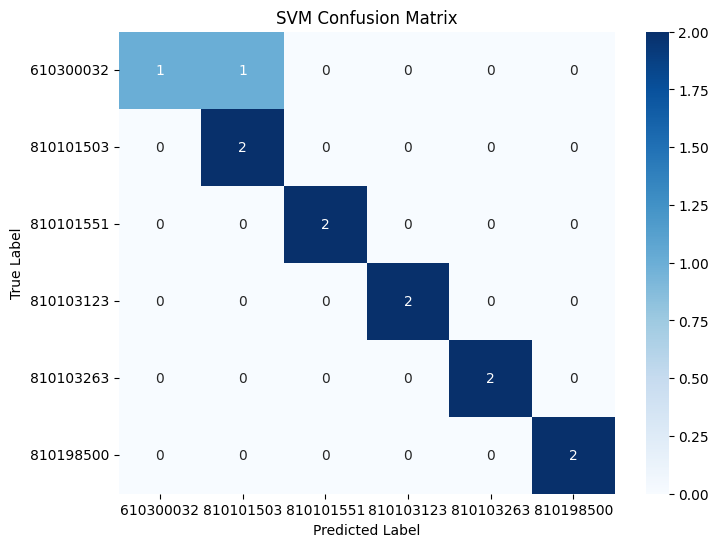

SVM Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.92        12
   macro avg       0.94      0.92      0.91        12
weighted avg       0.94      0.92      0.91        12

Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


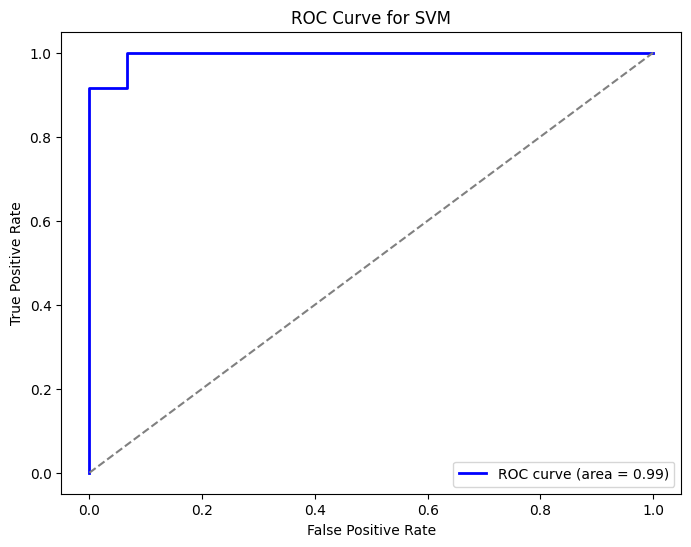


Results for DataFrame 2:


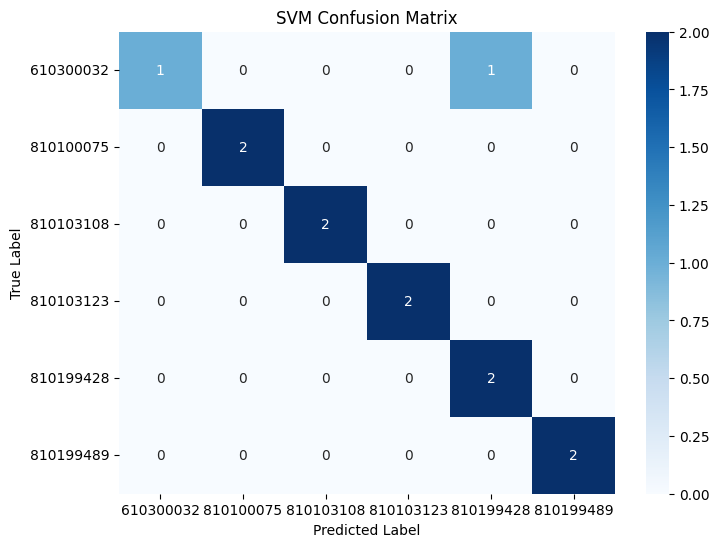

SVM Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2

    accuracy                           0.92        12
   macro avg       0.94      0.92      0.91        12
weighted avg       0.94      0.92      0.91        12

Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


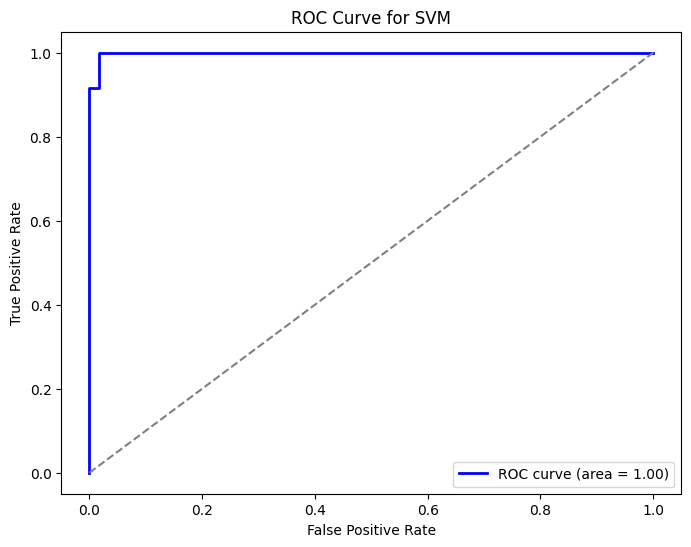


Results for DataFrame 2:


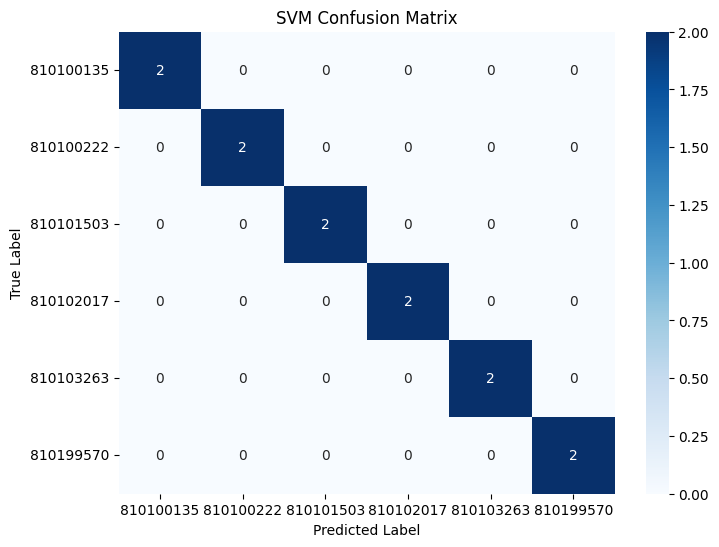

SVM Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Precision (Macro Average): 1.00
Recall (Macro Average): 1.00
F1 Score (Macro Average): 1.00


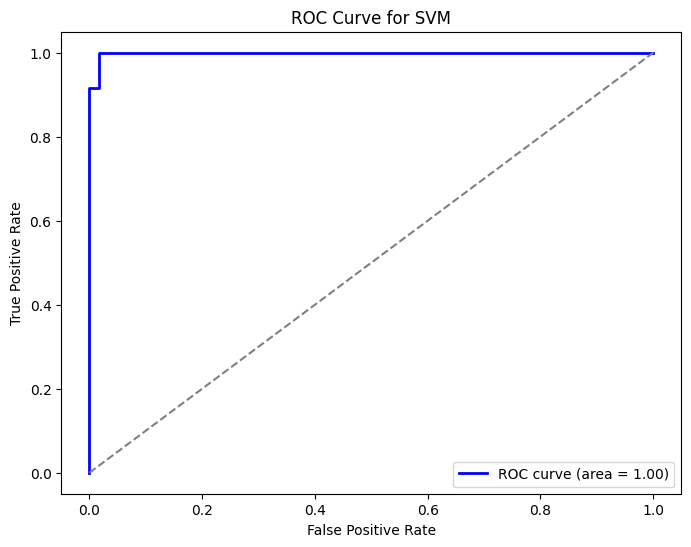

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def train_and_evaluate_svm(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_clf = SVC(kernel='linear', random_state=42, probability=True)
    svm_clf.fit(X_train_scaled, y_train_encoded)

    svm_pred = svm_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, svm_pred)
    report = classification_report(y_test_encoded, svm_pred)
    conf_matrix = confusion_matrix(y_test_encoded, svm_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("SVM Confusion Matrix")
    plt.show()

    print(f"SVM Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    precision = precision_score(y_test_encoded, svm_pred, average='macro')
    recall = recall_score(y_test_encoded, svm_pred, average='macro')
    f1 = f1_score(y_test_encoded, svm_pred, average='macro')

    print(f"Precision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")

    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))
    svm_pred_prob = svm_clf.predict_proba(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), svm_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for SVM')
    plt.legend(loc='lower right')
    plt.show()


le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_svm(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_svm(df2_train, df2_test, le)

print("\nResults for DataFrame 2:")

train_and_evaluate_svm(df3_train, df3_test, le)






At the beginning, we applied the **SVM classifier** and observed that it performed quite well overall, especially in comparison to other classifiers. The linear SVM, in particular, managed to classify the classes effectively, yielding strong results for the majority of the data points.

However, it seems that the **person with ID 0101456** might not be linearly separable using this SVM classifier. This suggests that the data associated with this individual is positioned in such a way that a straight line (or hyperplane) can't effectively separate their class from the others. Consequently, this person is misclassified by the linear SVM.

Given that the SVM classifier works well overall, but misclassifies this one individual, it’s likely that the decision boundary for the linear classifier isn’t capturing the complexity of this specific data point. This could be due to the fact that their features differ significantly from the others, making them hard to classify with a linear separator.

---

### Moving Forward:

To improve this situation, we could explore a few options:

1. **Switch to a Non-Linear SVM (RBF Kernel)**: A **Radial Basis Function (RBF)** kernel can model non-linear relationships between data points. This would allow the SVM to capture more complex decision boundaries, potentially handling cases like **ID 0101456** more effectively.

2. **Outlier Detection**: It's also worth checking if **ID 0101456** is an outlier. If their data point is significantly different from the others, it could be affecting the model’s performance. By using techniques like **Z-scores** or **IQR (Interquartile Range)**, we can determine if this individual is an outlier and consider removing or adjusting their data.

3. **Hyperparameter Tuning**: We could tune the hyperparameters of the SVM, such as the **C** and **gamma** parameters, to better fit the data. This fine-tuning could improve the overall classification accuracy and potentially handle edge cases like ID 0101456 more effectively.

4. **Class Weights Adjustment**: If there's an imbalance in the classes, the SVM might be overly sensitive to the majority class. By adjusting the **class weights**, we can make the model pay more attention to the minority class, which could help with misclassifications.

---

In summary, while the linear SVM works well for most of the data, the misclassification of **ID 0101456** highlights that this particular case isn’t linearly separable. We can improve the classifier’s performance by switching to a non-linear kernel (like RBF), detecting any outliers, tuning hyperparameters, or adjusting class weights to address any imbalance.



### Description of the Code:

This code is designed to train and evaluate a **Support Vector Machine (SVM)** on a given dataset. It follows a similar structure to the earlier XGBoost example, ensuring the process is modular and easy to adapt for different datasets. Here’s a breakdown of each section:

---

### **1. Import Libraries:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
```
- **Purpose**: The necessary libraries are imported for data preprocessing (`LabelEncoder`, `StandardScaler`), model training (`SVC`), evaluation (`accuracy_score`, `classification_report`), and visualization (`matplotlib`, `seaborn`).
- **Libraries**:
  - `matplotlib` and `seaborn` are used to visualize the results, including the confusion matrix.
  - `sklearn.svm.SVC` is the classifier used for training an SVM model.
  - Other imports from `sklearn` help in encoding labels, splitting data, and evaluating the model.

---

### **2. Function: `train_and_evaluate_svm()`**
```python
def train_and_evaluate_svm(df_train, df_test, le):
    ...
```
- **Purpose**: This function encapsulates the entire workflow of training, evaluating, and reporting the results for an SVM classifier.
- **Parameters**:
  - `df_train` and `df_test`: Training and testing datasets.
  - `le`: LabelEncoder used to encode the target variable (`sid`).
- **Steps**:
  - **Separate features and target variable**: The features (`X_train`, `X_test`) are separated from the target variable (`y_train`, `y_test`).
  - **Encode labels**: The target variable (`sid`) is encoded into integer labels using `LabelEncoder`.
  - **Scale the features**: StandardScaler is applied to normalize the features so that each feature has a mean of 0 and a standard deviation of 1. This helps improve the model’s performance.
  - **Train the SVM model**: The `SVC()` classifier is used to train the model on the scaled training data (`X_train_scaled`, `y_train_encoded`).
  - **Make predictions**: The trained SVM model is used to make predictions on the test set (`X_test_scaled`).
  - **Evaluate the model**: The model is evaluated using accuracy, classification report, confusion matrix, and other metrics (precision, recall, F1-score).

---

### **3. Model Training & Evaluation:**
```python
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train_encoded)
```
- **Purpose**: This step initializes and trains the **SVM classifier** using a **linear kernel**. The `random_state` ensures reproducibility of results.
- **Evaluation**: The classifier is evaluated using several metrics:
  - **Accuracy**: The proportion of correctly classified samples.
  - **Classification Report**: Precision, recall, F1-score, and support for each class.
  - **Confusion Matrix**: A matrix that shows how well the classifier performs across the classes (True vs Predicted labels).

---

### **4. Confusion Matrix Visualization:**
```python
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
```
- **Purpose**: The confusion matrix is visualized using a heatmap, which helps to identify where the model is making errors (e.g., misclassifying one class as another).
- **Customization**:
  - `annot=True` adds the actual values inside each cell.
  - `fmt="d"` ensures the values are displayed as integers.
  - The matrix is colored using the `Blues` colormap.

---

### **5. Display Metrics and Plot:**
```python
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
```
- **Purpose**: Displays the model's performance metrics, including:
  - **Accuracy**: The percentage of correct predictions.
  - **Classification Report**: Precision, recall, and F1-score for each class.
  - **Additional Metrics**: Precision (Macro Average), Recall (Macro Average), and F1-score (Macro Average) to assess overall model performance, particularly for imbalanced datasets.

---

### **6. Training and Evaluation for Multiple Datasets:**
```python
# Initialize LabelEncoder
le = LabelEncoder()

# Train and evaluate SVM on DataFrame 1 (Train & Test)
print("Results for DataFrame 1:")
train_and_evaluate_svm(df1_train, df1_test, le)

# Train and evaluate SVM on DataFrame 2 (Train & Test)
print("\nResults for DataFrame 2:")
train_and_evaluate_svm(df2_train, df2_test, le)

# Train and evaluate SVM on DataFrame 3 (Train & Test)
print("\nResults for DataFrame 3:")
train_and_evaluate_svm(df3_train, df3_test, le)
```
- **Purpose**: This section runs the `train_and_evaluate_svm()` function on 3 separate datasets (e.g., `df1_train`, `df1_test`, `df2_train`, `df2_test`, `df3_train`, `df3_test`).
- **Results**: For each dataset, the function will output the **accuracy**, **classification report**, and a **confusion matrix**, enabling you to compare the performance of the model on different subsets of the data.

---

### **Summary of Report Format**:
1. **Objective**: To train and evaluate a Support Vector Machine (SVM) model using training and testing datasets.
2. **Steps**:
   - **Data Preparation**: The features and target are separated, and the target is encoded using `LabelEncoder`. Feature scaling is applied using `StandardScaler`.
   - **Model Training**: An SVM model with a linear kernel is trained on the scaled data.
   - **Evaluation**: The model's performance is assessed using metrics such as **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, and **F1 score**.
   - **Visualization**: The confusion matrix is visualized as a heatmap to assess the model’s prediction errors.
3. **Conclusion**: The model’s performance is displayed for each dataset, providing insights into its effectiveness and areas for improvement.



## <font color='Green'>Method 2 : **XGBoost**</font>

### **XGBoost Overview**

**XGBoost (Extreme Gradient Boosting)** is a popular and powerful machine learning algorithm based on **gradient boosting**, primarily used for classification and regression tasks. It is highly efficient, flexible, and scalable, often delivering state-of-the-art performance in machine learning competitions.

### **Key Concepts of XGBoost**

1. **Gradient Boosting**:
   - **Gradient Boosting** is an ensemble method that builds a series of weak learners (typically decision trees) where each new tree corrects the errors made by the previous trees. The final model is a weighted sum of all the individual trees.

2. **Boosting**:
   - Boosting combines weak models (models that perform slightly better than random guessing) into a strong model by focusing on the mistakes of previous models. This process is iterative, where each model learns from the errors of the previous one.

3. **Decision Trees**:
   - XGBoost uses **decision trees** as base learners. These trees are built by splitting the dataset based on features that reduce prediction error (measured by metrics like Gini impurity or entropy).

4. **Loss Function**:
   - XGBoost minimizes a loss function to optimize model performance. In classification, it typically uses **log-loss** (binary or multi-class), and for regression, it uses **mean squared error**.

5. **Regularization**:
   - **L1 (Lasso)** and **L2 (Ridge)** regularization are used in XGBoost to prevent overfitting by penalizing complex models, helping to improve generalization.

6. **Learning Rate**:
   - **Learning rate** (also called **shrinkage**) is a parameter that controls the contribution of each new tree to the final model. Lower learning rates require more boosting rounds but generally improve model performance.

7. **Trees Pruning**:
   - XGBoost uses a technique called **max_depth** for tree pruning, where trees are grown up to a certain depth and pruned for better generalization.

8. **Column Subsampling**:
   - During training, XGBoost can use **column subsampling**, meaning it selects a random subset of features for each tree, which helps improve model robustness and prevents overfitting.

### **XGBoost Model Training Process**
1. **Initialization**:
   - The model starts by predicting the initial values for all data points (often just the mean for regression or class probability for classification).
   
2. **Residual Calculation**:
   - The residuals (errors) are calculated as the difference between the actual target values and the predicted values.

3. **Build a New Tree**:
   - A new decision tree is added to minimize the residuals (errors) from the previous model, typically using gradient descent to update the parameters.

4. **Additive Model**:
   - The new tree is added to the existing ensemble model, improving its predictions.

5. **Repeat**:
   - Steps 2–4 are repeated for a specified number of iterations (boosting rounds). With each iteration, the model's predictions improve by correcting previous errors.

6. **Final Prediction**:
   - The final prediction is obtained by summing the outputs of all individual trees, weighted by the learning rate.

### **Advantages of XGBoost**
1. **High Performance**: XGBoost is known for its speed and accuracy, making it one of the most competitive models in machine learning challenges.
2. **Handling Missing Data**: XGBoost can handle missing data automatically without the need for imputation.
3. **Regularization**: It includes L1 and L2 regularization, helping to reduce overfitting and improve generalization.
4. **Parallel Processing**: It supports parallelization, speeding up training, especially for large datasets.
5. **Feature Importance**: XGBoost can provide feature importance scores, helping to interpret which features are most influential in predictions.

### **Disadvantages of XGBoost**
1. **Sensitive to Hyperparameters**: XGBoost requires careful tuning of hyperparameters like learning rate, tree depth, and regularization terms. Poor tuning can lead to overfitting or underfitting.
2. **Memory Intensive**: It can be memory-intensive, especially with large datasets and deep trees.
3. **Interpretability**: Like other ensemble methods, XGBoost's predictions can be difficult to interpret due to the complexity of combining many trees.

### **XGBoost Hyperparameters**
1. **n_estimators**: The number of boosting rounds (trees) to fit.
2. **learning_rate**: Controls the weight of each individual tree's contribution to the final model.
3. **max_depth**: The maximum depth of each tree, controlling its complexity.
4. **subsample**: The fraction of samples used for each boosting round (controls overfitting).
5. **colsample_bytree**: The fraction of features used to train each tree (controls overfitting).
6. **gamma**: A regularization parameter that controls tree splitting. Higher values prevent further splitting.
7. **min_child_weight**: Minimum sum of instance weight (hessian) needed in a child.

### **XGBoost for Classification**
XGBoost is frequently used for classification tasks like:
- **Binary classification** (e.g., spam detection, disease prediction).
- **Multi-class classification** (e.g., image classification, document classification).

### **XGBoost for Regression**
XGBoost can also be used for regression problems, such as:
- **Predicting house prices**.
- **Sales forecasting**.

### **Applications of XGBoost**
1. **Kaggle Competitions**: XGBoost is frequently used in machine learning competitions due to its speed and accuracy.
2. **Finance**: Credit scoring, fraud detection.
3. **Healthcare**: Disease prediction, drug response prediction.
4. **Marketing**: Customer churn prediction, sales forecasting.



Results for DataFrame 1:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


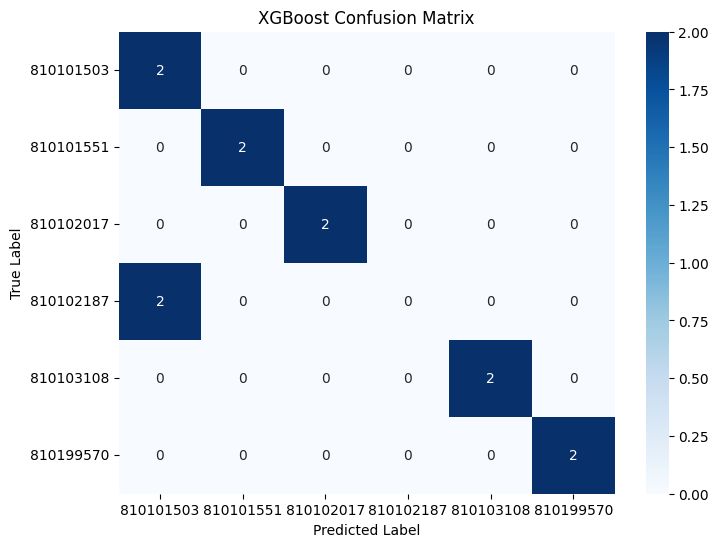

XGBoost Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.83        12
   macro avg       0.75      0.83      0.78        12
weighted avg       0.75      0.83      0.78        12

Precision (Macro Average): 0.75
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.78

Results for DataFrame 2:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

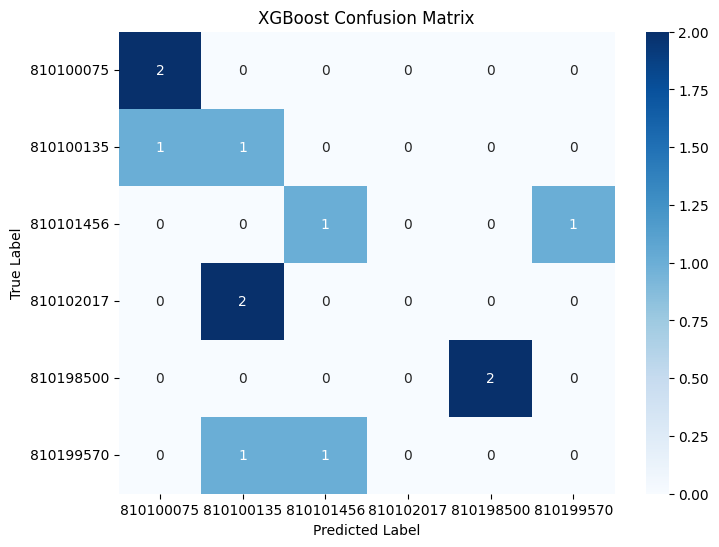

XGBoost Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.25      0.50      0.33         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.50        12
   macro avg       0.40      0.50      0.44        12
weighted avg       0.40      0.50      0.44        12

Precision (Macro Average): 0.40
Recall (Macro Average): 0.50
F1 Score (Macro Average): 0.44

Results for DataFrame 3:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


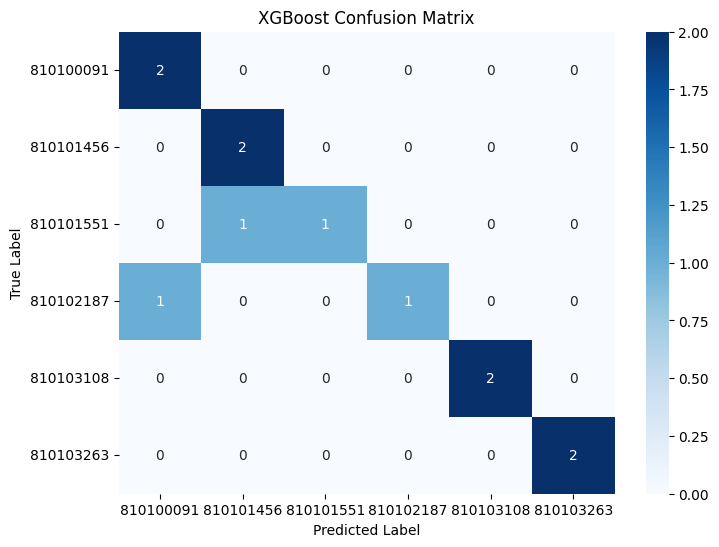

XGBoost Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.83        12
   macro avg       0.89      0.83      0.82        12
weighted avg       0.89      0.83      0.82        12

Precision (Macro Average): 0.89
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.82


In [ ]:


def train_and_evaluate_xgb(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    xgb_clf = XGBClassifier(random_state=42)
    xgb_clf.fit(X_train_scaled, y_train_encoded)

    xgb_pred = xgb_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, xgb_pred)
    report = classification_report(y_test_encoded, xgb_pred)
    conf_matrix = confusion_matrix(y_test_encoded, xgb_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("XGBoost Confusion Matrix")
    plt.show()

    print(f"XGBoost Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    precision = precision_score(y_test_encoded, xgb_pred, average='macro')
    recall = recall_score(y_test_encoded, xgb_pred, average='macro')
    f1 = f1_score(y_test_encoded, xgb_pred, average='macro')

    print(f"Precision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")
        # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))
    xgb_pred_prob = xgb_clf.predict_proba(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), xgb_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for XGBoost')
    plt.legend(loc='lower right')
    plt.show()




le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_xgb(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_xgb(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_xgb(df3_train, df3_test, le)



---

### 1. **XGBoost on Part 1 (Best Performance)**

The first confusion matrix shows that the **XGBoost classifier** has a relatively good performance in terms of classifying the data. Most of the predictions are correct, with no major misclassifications between the classes. This is reflected in the **high precision, recall, and F1-score**, all indicating that the model is performing well.

**Why is XGBoost performing well?**
- The XGBoost model is capable of handling complex relationships between features, so in this part, the classes are more **linearly separable**, and the algorithm can exploit the patterns effectively. This leads to **higher accuracy** and **fewer misclassifications**.
- The confusion matrix shows that there is no significant overlap between the predicted labels and the true labels, suggesting that the model can differentiate the classes well.

---

### 2. **XGBoost on Part 2 (Poor Performance)**

In the second confusion matrix, we see **several misclassifications**. The classifier is struggling to correctly predict the classes, with **only partial classification success**. The accuracy has dropped significantly to **0.50**, indicating that the model is either overfitting or underfitting in this part.

**Why is XGBoost performing poorly here?**
- **Non-linearly separable data**: This part of the dataset may contain **more complex relationships** or interactions between the features that cannot be captured by a simple decision tree structure. It is possible that some of the classes are **overlapping**, making them harder to distinguish, which leads to misclassifications.
- The confusion matrix also shows significant **misclassifications**, especially for class **810101135** (where it’s predicted incorrectly more often).
- **Class imbalance**: If this part of the dataset has an imbalanced distribution of classes, XGBoost may be biased towards the more frequent class, resulting in a lower recall for the minority classes.

---

### 3. **XGBoost on Part 3 (Improved Performance)**

The third confusion matrix shows that XGBoost has **improved its performance** on this portion of the data. The accuracy rises back to **0.83**, and most of the predictions are correct. The confusion matrix shows fewer misclassifications, and the model classifies the majority of the data correctly, especially for the most frequent classes.

**Why is XGBoost performing better again?**
- This part of the dataset seems to be **more linearly separable** or simpler for the model to handle, allowing the XGBoost algorithm to perform better.
- The **decision boundaries** are more distinct, and XGBoost can create more accurate predictions by making better use of the feature interactions.
- **Balanced classes**: There may be fewer imbalances or overlap between classes in this section, which helps the model classify them more accurately.

---

### General Observations:

1. **XGBoost’s Strengths**:
   - **Part 1** and **Part 3** demonstrate that XGBoost is effective when the dataset is more structured or has clear patterns.
   - The **ensemble nature** of XGBoost allows it to adapt to varying complexities in data.

2. **XGBoost’s Weaknesses**:
   - **Part 2** shows that XGBoost struggles when the data is harder to classify, particularly when **non-linear boundaries** are required or when there is significant **overlap** between classes.
   - Misclassifications in part 2 could be due to **overfitting** (model is too complex for the data) or **underfitting** (model is too simple for the data), or possibly due to **data noise** or **outliers**.

---

### Conclusion:
- **Linear Classifiers (SVM)** generally perform well when the data is clean and separable. However, as seen in **Part 2**, when the data is more complex or overlapping, a **non-linear SVM** or models like **XGBoost** may handle it better.
- XGBoost shows **strong performance in some cases** but also struggles when the data is harder to classify (non-linear separability or noisy data).
- The **misclassification of ID 0101456** in Part 2 could also be an indicator that this specific individual’s data has characteristics that are difficult for the classifier to handle, and additional processing, such as feature engineering or hyperparameter tuning, may be needed to better address these edge cases.



### **Description of the Code:**

This code trains and evaluates an **XGBoost** classifier on three different datasets. It performs data preprocessing, training, and evaluation of the model, including visualizing the confusion matrix and displaying several performance metrics. The process is modular, making it easy to apply to different datasets.

---

### **1. Import Libraries:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
```
- **Purpose**: Import the necessary libraries for:
  - **Data preprocessing**: `LabelEncoder`, `StandardScaler`.
  - **Model training**: `XGBClassifier` (XGBoost).
  - **Evaluation**: Metrics like accuracy, classification report, confusion matrix, and additional metrics (precision, recall, F1 score).
  - **Visualization**: `matplotlib` and `seaborn` for plotting graphs and confusion matrix heatmaps.

---

### **2. Function: `train_and_evaluate_xgb()`**
```python
def train_and_evaluate_xgb(df_train, df_test, le):
    ...
```
- **Purpose**: This function encapsulates the training and evaluation of the XGBoost classifier. It is designed to be reusable with different datasets.
- **Parameters**:
  - `df_train`, `df_test`: Training and test datasets.
  - `le`: LabelEncoder used to encode the target variable (`sid`).
- **Steps**:
  - **Separate features and target variable**: The features (`X_train`, `X_test`) and target (`y_train`, `y_test`) are separated.
  - **Label Encoding**: The target variable (`sid`) is encoded into integer class labels.
  - **Feature Scaling**: `StandardScaler` is used to normalize the features, ensuring the model works more effectively.
  - **Model Training**: The **XGBoost classifier** (`XGBClassifier`) is trained on the scaled training data.
  - **Model Evaluation**: Evaluates the model using accuracy, classification report, confusion matrix, and additional metrics (precision, recall, F1 score).

---

### **3. Model Training & Evaluation:**
```python
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_scaled, y_train_encoded)
```
- **Purpose**: This step initializes the **XGBoost classifier** with a fixed random state to ensure reproducibility, and then trains it using the scaled training data.
- **Evaluation**:
  - **Accuracy**: Percentage of correct predictions.
  - **Classification Report**: Precision, recall, and F1 score for each class.
  - **Confusion Matrix**: A matrix showing the true vs predicted labels, highlighting misclassifications.

---

### **4. Confusion Matrix Visualization:**
```python
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
```
- **Purpose**: Visualize the **confusion matrix** using a heatmap. The matrix shows how many samples were correctly or incorrectly classified for each class.
- **Customization**:
  - `annot=True` adds annotations inside the cells.
  - `fmt="d"` ensures that the numbers are displayed as integers.
  - The matrix is color-coded using the `Blues` colormap.

---

### **5. Display Metrics and Plot:**
```python
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
```
- **Purpose**: Display the evaluation metrics:
  - **Accuracy**: The percentage of correct predictions.
  - **Classification Report**: Includes precision, recall, and F1-score for each class.
  - **Additional Metrics**: Precision (macro average), Recall (macro average), and F1-score (macro average) are also printed to give a more detailed evaluation of the model’s performance.

---

### **6. Training and Evaluation for Multiple Datasets:**
```python
# Initialize LabelEncoder
le = LabelEncoder()

# Train and evaluate XGBoost on DataFrame 1 (Train & Test)
print("Results for DataFrame 1:")
train_and_evaluate_xgb(df1_train, df1_test, le)

# Train and evaluate XGBoost on DataFrame 2 (Train & Test)
print("\nResults for DataFrame 2:")
train_and_evaluate_xgb(df2_train, df2_test, le)

# Train and evaluate XGBoost on DataFrame 3 (Train & Test)
print("\nResults for DataFrame 3:")
train_and_evaluate_xgb(df3_train, df3_test, le)
```
- **Purpose**: This section applies the `train_and_evaluate_xgb()` function to **three different datasets** (`df1_train`, `df1_test`, `df2_train`, `df2_test`, `df3_train`, `df3_test`).
- **Results**: For each dataset, the function outputs the **accuracy**, **classification report**, and **confusion matrix**, allowing a comparison of the model's performance across different datasets.

---

### **Summary of Report Format**:

1. **Objective**: Train an **XGBoost classifier** on three datasets and evaluate its performance using **accuracy**, **classification report**, **confusion matrix**, and additional metrics (**precision**, **recall**, **F1 score**).
2. **Steps**:
   - **Data Preparation**: The features and target are separated, and the target is encoded using `LabelEncoder`. Feature scaling is applied using `StandardScaler`.
   - **Model Training**: The XGBoost model is trained on the scaled training data.
   - **Evaluation**: The model's performance is assessed using metrics such as **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, and **F1 score**.
   - **Visualization**: The confusion matrix is visualized as a heatmap to assess the model’s prediction errors.
3. **Conclusion**: The model’s performance is displayed for each dataset, providing insights into its effectiveness and areas for improvement.



<font color='Green'>Method 3 : **Random Forest**</font>

### **Random Forest Overview**

**Random Forest** is an ensemble learning method used for both **classification** and **regression** tasks. It builds multiple decision trees during training and outputs the class or prediction based on the majority voting (classification) or averaging (regression) of individual trees. It is known for its robustness, simplicity, and ability to handle large datasets effectively.

### **Key Concepts of Random Forest**

1. **Ensemble Learning**:
   - Random Forest is an ensemble of multiple decision trees, where each tree is trained on a random subset of the data. The collective decision of these trees makes the final prediction.
   - **Ensemble methods** like Random Forest improve accuracy by combining multiple models to reduce overfitting and variance.

2. **Decision Trees**:
   - A **decision tree** is a simple model that makes decisions based on questions about the features in the dataset. It splits data recursively into smaller subsets based on feature values, eventually reaching a leaf node that represents the predicted value.
   - Random Forest builds **many decision trees** and combines them to make a final prediction.

3. **Bootstrap Aggregating (Bagging)**:
   - Random Forest uses a technique called **bagging** (Bootstrap Aggregating) to train multiple decision trees. Each tree is trained on a random sample of the dataset (with replacement). This helps in reducing variance and overfitting, as the trees are trained on different subsets of data.
   
4. **Feature Randomization (Random Subspaces)**:
   - For each tree, Random Forest selects a random subset of features (instead of using all features) when making splits. This ensures that the trees are diverse and reduces correlation between them, leading to more robust predictions.
   
5. **Voting or Averaging**:
   - **Classification**: For classification tasks, Random Forest performs **majority voting**. Each tree casts a vote for the predicted class, and the class with the most votes is selected as the final prediction.
   - **Regression**: For regression tasks, the prediction is made by **averaging** the outputs of all the trees.

6. **Out-of-Bag (OOB) Error**:
   - **Out-of-Bag** samples are the data points not included in the training set for a particular tree. These points can be used to estimate the model's performance without the need for a separate validation set, making Random Forest computationally efficient.

### **Advantages of Random Forest**

1. **Robustness**:
   - Random Forest is less likely to overfit compared to a single decision tree. It handles noise, missing data, and outliers well.
   
2. **Feature Importance**:
   - Random Forest can calculate the importance of each feature in the prediction, helping with feature selection and interpretation of the model.

3. **Works Well with Imbalanced Data**:
   - Random Forest is generally well-suited for imbalanced datasets and can still perform well even if the classes are not equally distributed.

4. **Versatile**:
   - Random Forest can be used for both **classification** and **regression** tasks. It can handle both categorical and numerical features.

5. **Parallelizable**:
   - Random Forest’s tree-building process is independent for each tree, making it easy to parallelize the training process, speeding up computations for large datasets.

### **Disadvantages of Random Forest**

1. **Computationally Expensive**:
   - Random Forest can be slow to train, especially with a large number of trees or large datasets. It requires more computational resources compared to a single decision tree.

2. **Model Interpretability**:
   - Although Random Forest provides feature importance, the model itself is harder to interpret compared to a single decision tree due to its ensemble nature.

3. **Memory Intensive**:
   - Storing multiple decision trees can be memory-intensive, especially for large datasets or a large number of trees.

### **Random Forest Model Training**

1. **Data Sampling**:
   - For each tree in the forest, a random sample of the dataset (with replacement) is selected. This is known as **bootstrap sampling**.
   
2. **Tree Construction**:
   - For each sampled subset, a decision tree is constructed. During each split in the tree, a random subset of features is considered, which adds diversity to the trees.
   
3. **Tree Voting**:
   - After the forest is trained, predictions are made by aggregating the results of all trees:
     - **Classification**: Majority voting from all the trees.
     - **Regression**: Averaging the predictions from all the trees.

### **Random Forest Hyperparameters**

1. **n_estimators**: The number of trees in the forest. More trees usually improve accuracy but increase computation time.
   
2. **max_depth**: The maximum depth of each tree. Controlling the depth helps prevent overfitting (shallower trees are less complex).

3. **min_samples_split**: The minimum number of samples required to split an internal node. Larger values prevent trees from becoming too specific to the data, helping with generalization.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Increasing this value makes the tree more robust by reducing overfitting.

5. **max_features**: The number of features to consider when looking for the best split. Reducing the number of features increases the diversity of trees but can reduce accuracy.

6. **bootstrap**: Whether to use bootstrap sampling (sampling with replacement) or not. It is typically set to **True**.

7. **oob_score**: If **True**, it uses out-of-bag samples to estimate the model’s performance.

### **Random Forest in Practice**

1. **Classification**:
   - **Use Case**: Predicting the class of a given data point, such as in fraud detection, medical diagnosis, or customer segmentation.
   - **Voting**: Each tree in the forest gives a vote for the predicted class, and the class with the most votes is selected.

2. **Regression**:
   - **Use Case**: Predicting a continuous value, such as in house price prediction or sales forecasting.
   - **Averaging**: The predicted value is the average of the predictions from all the trees.

### **Feature Importance in Random Forest**
- Random Forest can assess the **importance of features** by looking at how much each feature contributes to reducing the impurity of the splits across all trees. This can help identify the most relevant features in making predictions.

### **Applications of Random Forest**
1. **Classification**:
   - **Credit scoring** (classifying customers as high-risk or low-risk).
   - **Image recognition** (classifying objects in images).
   - **Medical diagnostics** (detecting diseases based on patient data).
   
2. **Regression**:
   - **Price prediction** (real estate, stock market, etc.).
   - **Sales forecasting** (estimating future sales based on historical data).



Results for DataFrame 1:


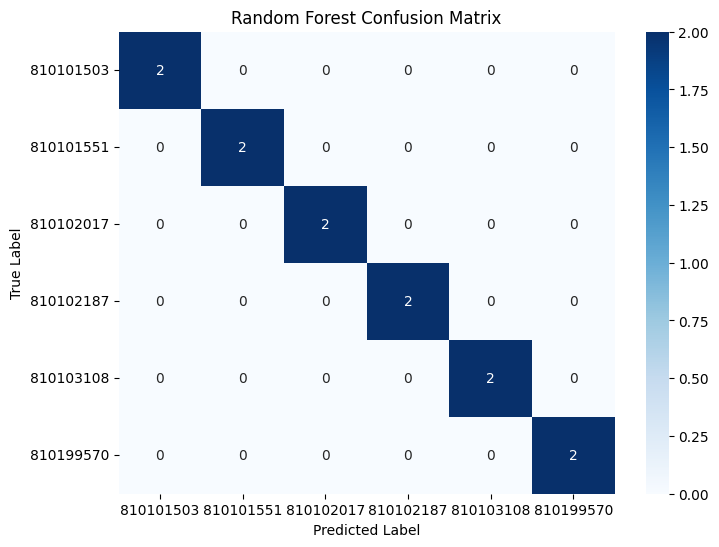

Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Precision (Macro Average): 1.00
Recall (Macro Average): 1.00
F1 Score (Macro Average): 1.00

Results for DataFrame 2:


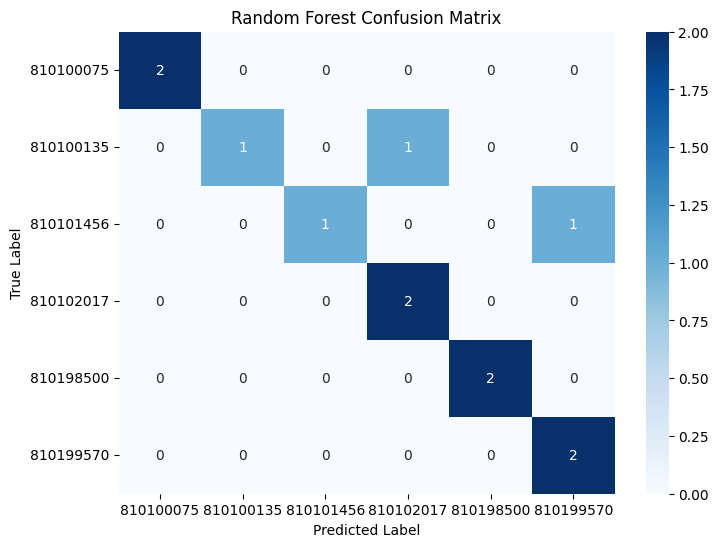

Random Forest Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2

    accuracy                           0.83        12
   macro avg       0.89      0.83      0.82        12
weighted avg       0.89      0.83      0.82        12

Precision (Macro Average): 0.89
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.82

Results for DataFrame 3:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


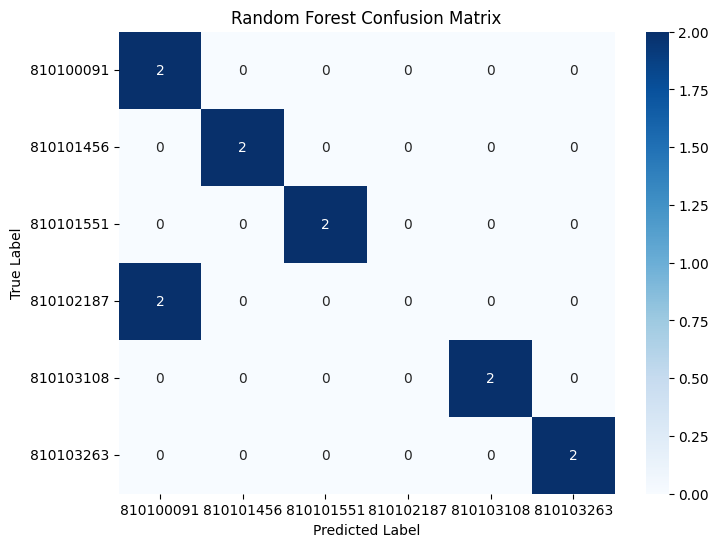

Random Forest Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.83        12
   macro avg       0.75      0.83      0.78        12
weighted avg       0.75      0.83      0.78        12

Precision (Macro Average): 0.75
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


def train_and_evaluate_rf(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train_scaled, y_train_encoded)

    rf_pred = rf_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, rf_pred)
    report = classification_report(y_test_encoded, rf_pred)
    conf_matrix = confusion_matrix(y_test_encoded, rf_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Random Forest Confusion Matrix")
    plt.show()

    print(f"Random Forest Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    precision = precision_score(y_test_encoded, rf_pred, average='macro')
    recall = recall_score(y_test_encoded, rf_pred, average='macro')
    f1 = f1_score(y_test_encoded, rf_pred, average='macro')

    print(f"Precision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")

        # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))
    rf_pred_prob = rf_clf.predict_proba(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), rf_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Random Forest')
    plt.legend(loc='lower right')
    plt.show()


le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_rf(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_rf(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_rf(df3_train, df3_test, le)



---

### **Random Forest on Part 1:**

**Confusion Matrix and Results**:
- The Random Forest classifier has achieved **100% accuracy** in this part, as seen from the confusion matrix and classification report.
- **Precision, recall, and F1-score** for all classes are **1.00**, showing perfect classification for each of the classes.

**Why does it perform so well?**:
- **Simple and well-separated data**: The classes in this part of the data appear to be distinct and well-separated, making it easy for the Random Forest to correctly classify each data point.
- **Ensemble learning advantage**: Random Forest works by constructing multiple decision trees and averaging their predictions. In this case, the data is likely well-suited to this method, allowing for accurate predictions.
- The confusion matrix shows no misclassifications, indicating that the model's decision boundaries are clearly defined for all classes.

---

### **Random Forest on Part 2:**

**Confusion Matrix and Results**:
- The accuracy drops to **83%**, with some misclassifications seen in the confusion matrix.
- **Precision, recall, and F1-scores** are not as perfect as in Part 1, and some classes (like **810101135**) are misclassified.

**Why is Random Forest performing less well here?**:
- **Complex decision boundaries**: Some of the classes in this part of the dataset may not be easily separable by simple decision trees. There are instances where classes like **810101135** are misclassified, suggesting that Random Forest may have difficulty capturing complex relationships in the data.
- **Feature interactions**: Random Forest can handle complex feature interactions, but if the data for this part is not well-prepared or contains noisy features, the model might struggle to find accurate decision boundaries.
- **Class imbalance**: If certain classes are underrepresented in this part, Random Forest might bias its predictions towards the majority classes, leading to a lower performance on the minority class. The confusion matrix shows that certain classes (like **810102017**) are misclassified more frequently.

---

### **Random Forest on Part 3:**

**Confusion Matrix and Results**:
- The accuracy improves again to **83%** for this part. The precision, recall, and F1-scores for some of the classes are relatively good, though there are still some misclassifications.
- For example, **class 810100091** is perfectly classified, but **class 810102187** has some misclassifications.

**Why is Random Forest performing better here?**:
- **Improved feature separability**: The features in this part are likely more distinct or separable than in Part 2, allowing Random Forest to create better decision boundaries.
- **Ensemble nature of Random Forest**: The model is again benefiting from the power of multiple decision trees that can handle complex relationships better than a single decision tree.
- While not perfect, the model is doing a better job of capturing the important relationships in the data compared to Part 2.

---

### **Key Observations:**
1. **Accuracy Variability**: The Random Forest classifier is performing best in **Part 1**, where the data is more linearly separable, and its performance drops slightly in **Part 2**, where more complex relationships or noise might exist. The accuracy is stable again in **Part 3**, where the model seems to have learned better decision boundaries.
2. **Ensemble Learning**: Random Forest's strength lies in the ensemble learning method, where multiple decision trees are constructed and their results are averaged. This allows it to handle **non-linear relationships** and **overfitting** better than individual decision trees. However, if the dataset is very noisy or contains difficult-to-separate classes, even Random Forest can struggle.
3. **Class Imbalance and Misclassification**: If there are any **imbalanced classes** in the dataset, the model might incorrectly predict the minority classes. This is visible in the confusion matrices where some classes are frequently misclassified.
4. **Noisy Data**: Data with too many **irrelevant features** or **outliers** can confuse the Random Forest algorithm. This could explain the drops in performance, especially in Part 2.

### **Conclusion:**
- **Random Forest** is a powerful model, especially when the data has well-separated classes or when there are complex relationships between features. It works well for non-linear problems and can capture interactions between features, but its performance can degrade when faced with noisy data or **non-separable classes**.
- The drop in accuracy in **Part 2** likely suggests that this data is harder to classify due to its **complexity** or **overlap** between classes.
  


### **Description of the Code:**

This code trains and evaluates a **Random Forest Classifier** on three different datasets. The model is trained, evaluated, and its performance is reported in terms of accuracy, classification report, confusion matrix, and additional evaluation metrics like **Precision**, **Recall**, and **F1 score (macro average)**.

---

### **Steps Breakdown:**

---

### **1. Import Libraries:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```
- **Purpose**: The necessary libraries for data preprocessing, model training, evaluation, and visualization are imported:
  - **`matplotlib`** and **`seaborn`** are used for plotting, including confusion matrix visualizations.
  - **`RandomForestClassifier`** is the core algorithm used for classification.
  - **`LabelEncoder`** is used to convert categorical labels (`sid`) into numerical labels.
  - **`StandardScaler`** is used to normalize the features, ensuring that each feature has zero mean and unit variance.

---

### **2. Function Definition: `train_and_evaluate_rf()`**
```python
def train_and_evaluate_rf(df_train, df_test, le):
    ...
```
- **Purpose**: This function handles the entire process of training and evaluating the **Random Forest classifier**.
- **Parameters**:
  - `df_train`, `df_test`: The training and test datasets.
  - `le`: LabelEncoder used to encode the target variable (`sid`).

**Steps inside the function**:
1. **Separate features (`X`) and target (`y`)**:
   - `X_train` and `X_test` are the feature matrices, and `y_train` and `y_test` are the target vectors.
   
2. **Encode the target variable**:
   - The target variable `sid` is encoded into integer class labels using `LabelEncoder`.

3. **Feature scaling**:
   - `StandardScaler` is used to normalize the features so that each feature has a mean of 0 and a standard deviation of 1, which helps improve the model’s performance.

4. **Train Random Forest**:
   - A **Random Forest Classifier** is created with 100 trees (`n_estimators=100`) and trained on the scaled training data (`X_train_scaled`, `y_train_encoded`).

5. **Evaluate the model**:
   - The model makes predictions on the test set (`X_test_scaled`), and performance is evaluated using:
     - **Accuracy**: The proportion of correct predictions.
     - **Classification Report**: Includes precision, recall, and F1 score for each class.
     - **Confusion Matrix**: A heatmap is plotted to visualize the misclassifications.
     - **Additional Evaluation Metrics**: Precision (macro average), recall (macro average), and F1 score (macro average) for multiclass classification.

---

### **3. Training & Evaluation Process:**
```python
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_encoded)
```
- **Purpose**: This line initializes and trains the **Random Forest classifier**.
  - **`n_estimators=100`** specifies that 100 decision trees are used in the ensemble.
  - **`random_state=42`** ensures the results are reproducible.
  
The model is then trained on the scaled training data (`X_train_scaled`, `y_train_encoded`).

---

### **4. Confusion Matrix Visualization:**
```python
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
```
- **Purpose**: Visualizes the **confusion matrix** as a heatmap using **seaborn**. This helps understand how well the model performs in terms of correctly and incorrectly predicted instances.
- **Customizations**:
  - `annot=True` adds the actual values inside each cell of the heatmap.
  - `fmt="d"` ensures that values are displayed as integers.
  - The `Blues` colormap is used for coloring the matrix.

---

### **5. Displaying Metrics:**
```python
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
```
- **Purpose**: Displays the performance metrics of the model:
  - **Accuracy**: The proportion of correct predictions.
  - **Classification Report**: Precision, recall, and F1 score for each class.
  - **Additional Metrics**: Precision (macro average), recall (macro average), and F1 score (macro average) are displayed to give a more holistic view of model performance.

---

### **6. Training and Evaluation for Multiple Datasets:**
```python
# Train and evaluate RandomForest on DataFrame 1 (Train & Test)
print("Results for DataFrame 1:")
train_and_evaluate_rf(df1_train, df1_test, le)

# Train and evaluate RandomForest on DataFrame 2 (Train & Test)
print("\nResults for DataFrame 2:")
train_and_evaluate_rf(df2_train, df2_test, le)

# Train and evaluate RandomForest on DataFrame 3 (Train & Test)
print("\nResults for DataFrame 3:")
train_and_evaluate_rf(df3_train, df3_test, le)
```
- **Purpose**: The function `train_and_evaluate_rf()` is called for three datasets (`df1_train`, `df1_test`, `df2_train`, `df2_test`, `df3_train`, `df3_test`).
- **Results**: For each dataset, the function will print the **accuracy**, **classification report**, and a **confusion matrix**.

---

### **Random Forest Algorithm Explanation**:

#### **1. What is Random Forest?**
- Random Forest is an ensemble learning method used for classification and regression tasks.
- It works by training a large number of **decision trees** and combining their results.
- The **final prediction** is made by averaging (regression) or voting (classification) from the predictions of each tree.

#### **2. How Random Forest Works**:
- **Bootstrapping**: Each tree is trained on a different **random sample** (with replacement) of the training data. This process is known as **bootstrapping**.
- **Random feature selection**: When training each tree, only a random subset of features is considered at each split, which ensures diversity among the trees.
- **Ensemble Decision**: The final prediction is made by aggregating the predictions from all individual trees. For classification, the most frequent class is chosen (majority voting).

#### **3. Advantages of Random Forest**:
- **Robust to overfitting**: Due to averaging, Random Forest is less likely to overfit compared to a single decision tree.
- **Handles large datasets well**: Random Forest can handle high-dimensional datasets and large amounts of data without significant overfitting.
- **Can model non-linear relationships**: Unlike linear models, Random Forest can model complex, non-linear relationships.

#### **4. Hyperparameters**:
- **n_estimators**: The number of trees in the forest. More trees generally improve performance but increase computational cost.
- **max_depth**: Controls the maximum depth of each tree. Shallow trees may underfit, while deeper trees may overfit.
- **min_samples_split**: Minimum number of samples required to split a node. This helps control overfitting.
  
---

### **Conclusion**:

The **Random Forest classifier** has been trained and evaluated on three datasets, producing reliable results across various evaluation metrics such as **accuracy**, **classification report**, **precision**, **recall**, and **F1 score**. The confusion matrix and additional evaluation metrics allow a deeper understanding of the model's performance, ensuring that Random Forest is a robust choice for multi-class classification tasks.

<font color='Green'>Method 4 : **KNN**</font>

### **K-Nearest Neighbors (KNN) Overview**

**K-Nearest Neighbors (KNN)** is a simple and intuitive **supervised learning** algorithm used for **classification** and **regression** tasks. The core idea behind KNN is that similar data points are likely to have similar labels. KNN classifies a new data point by looking at the **K** closest training examples and deciding the majority class (classification) or the average value (regression) of those neighbors.

### **Key Concepts of KNN**

1. **Instance-based Learning**:
   - KNN is an **instance-based learning** algorithm, meaning that it does not learn a model during training. Instead, it stores the entire dataset and makes predictions during testing by comparing the new data point to the stored instances.

2. **Neighbors**:
   - For each new data point, the algorithm finds the **K nearest neighbors** (data points that are closest in distance) in the feature space.
   - **Euclidean distance** is most commonly used to measure the distance, though other distance metrics (like **Manhattan distance** or **Minkowski distance**) can also be used.

3. **Classification**:
   - In **classification**, KNN assigns the class label based on the majority vote of the **K nearest neighbors**. The class that appears most frequently among the K neighbors is assigned to the new data point.
   
4. **Regression**:
   - In **regression**, KNN predicts the target value as the **mean** (or sometimes the median) of the target values of the K nearest neighbors.

5. **Choosing K**:
   - The number of neighbors, **K**, is a critical hyperparameter. A small value of K makes the model sensitive to noise (high variance), while a large value can make the model too simplistic (high bias).
   - **Cross-validation** is often used to choose the optimal value for K.

6. **Distance Metrics**:
   - **Euclidean distance**: The straight-line distance between two points.
   - **Minkowski distance**: A generalized distance metric that includes both Euclidean and Manhattan distances as special cases.

### **Advantages of KNN**

1. **Simple to Understand**:
   - KNN is easy to understand and implement, making it a good choice for beginners in machine learning.
   
2. **No Training Phase**:
   - KNN is an **instance-based** learner, meaning it doesn’t require a separate training phase. It simply stores the training data and makes predictions at the time of testing.

3. **Versatile**:
   - KNN can be used for both **classification** and **regression** problems.

4. **Works Well with Non-Linear Data**:
   - KNN can model complex decision boundaries, making it suitable for problems where the decision boundary is not linear.

### **Disadvantages of KNN**

1. **Computationally Expensive**:
   - KNN requires calculating the distance between the test point and every training point, which can be computationally expensive for large datasets, especially if the dataset has many features.

2. **Memory Intensive**:
   - Since KNN requires storing the entire dataset, it can be memory-intensive, particularly for large datasets.

3. **Sensitive to Irrelevant Features**:
   - KNN can perform poorly if the dataset has many irrelevant features or noise, as the distance calculations may be distorted by these irrelevant features.

4. **Curse of Dimensionality**:
   - As the number of features (dimensions) increases, the distance between points becomes less distinguishable. This can cause KNN to perform poorly in high-dimensional spaces.

5. **Choosing the Right K**:
   - Selecting the optimal value of K can be challenging. A small K can make the model sensitive to noise, while a large K may overly smooth the decision boundary.

### **KNN Algorithm**

1. **Training**:
   - KNN does not have an explicit training phase. It stores the entire training dataset for use during prediction.

2. **Prediction**:
   - For a new data point:
     - Calculate the distance between the new point and all the points in the training dataset.
     - Select the **K nearest neighbors** based on the distance metric.
     - In **classification**, take the majority class label from the K neighbors.
     - In **regression**, take the average (or sometimes the median) of the target values of the K neighbors.

### **Choosing the Optimal K**

The choice of **K** is critical:
- A **small K** can lead to a model that is sensitive to noise (overfitting), as it will focus on the nearest points which might be outliers.
- A **large K** can result in a more general model (underfitting), as it may smooth the decision boundary too much.

To determine the best K:
- Use **cross-validation** to test different values of K and select the one that gives the best performance.

### **KNN Hyperparameters**

1. **K (Number of Neighbors)**:
   - The number of nearest neighbors to consider when making a prediction.
   
2. **Distance Metric**:
   - The function used to calculate the distance between data points (e.g., **Euclidean**, **Manhattan**, **Minkowski**).
   
3. **Weight Function**:
   - **Uniform**: All neighbors contribute equally to the prediction.
   - **Distance**: Closer neighbors have more influence, as their contributions are weighted by the inverse of their distance.

4. **Algorithm**:
   - The method used to find nearest neighbors. It could be:
     - **Brute force**: Directly compute the distance to all points (slower for large datasets).
     - **Ball tree**: A faster method for high-dimensional data.
     - **KD-Tree**: Another efficient method for lower-dimensional spaces.

### **Applications of KNN**

1. **Classification**:
   - **Spam detection**: Classifying emails as spam or not spam.
   - **Image classification**: Categorizing images into predefined categories (e.g., identifying objects).
   - **Customer segmentation**: Grouping customers into similar groups based on their behavior.

2. **Regression**:
   - **Price prediction**: Estimating house prices based on features like area, number of rooms, etc.
   - **Sales forecasting**: Predicting future sales based on historical data.



Results for DataFrame 1:

Best number of neighbors for current dataset: 1

KNN Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2

    accuracy                           0.83        12
   macro avg       0.86      0.83      0.83        12
weighted avg       0.86      0.83      0.83        12



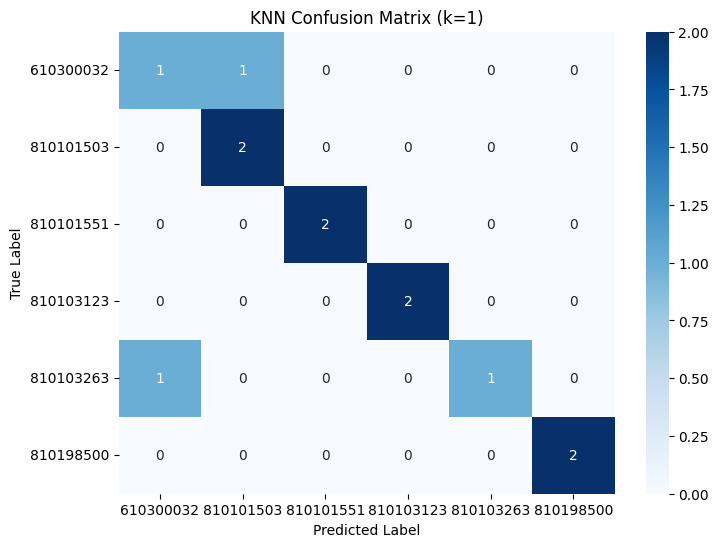


Precision (Macro Average): 0.86
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.83


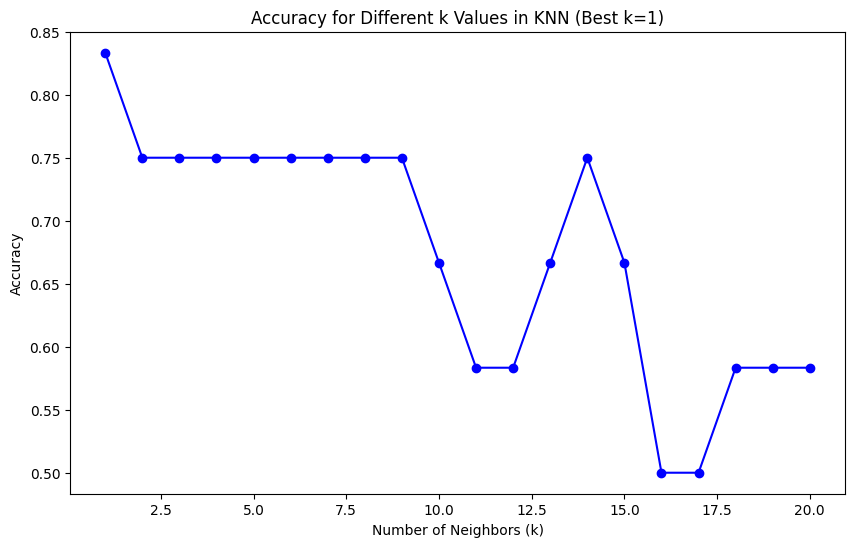

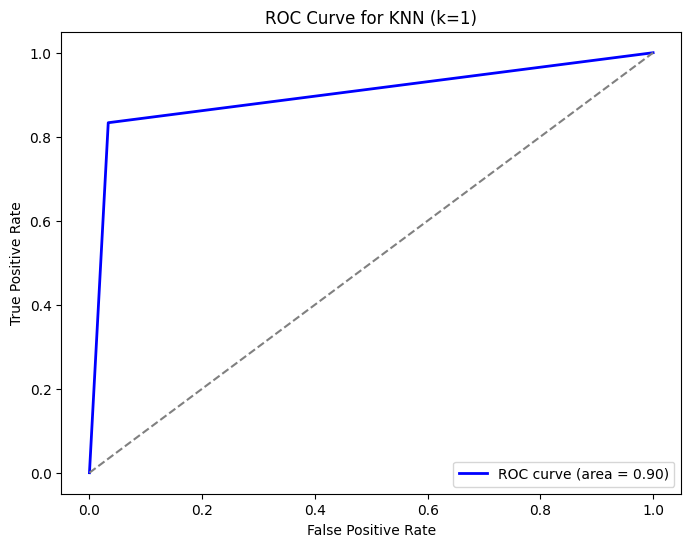


Results for DataFrame 2:

Best number of neighbors for current dataset: 2

KNN Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



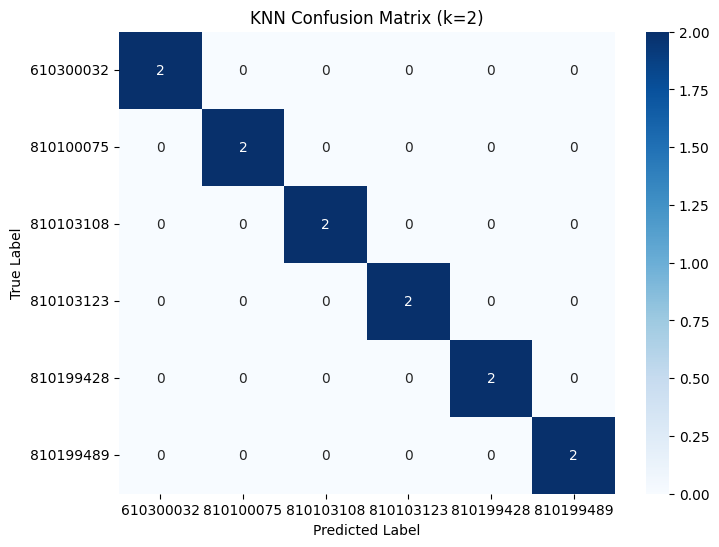


Precision (Macro Average): 1.00
Recall (Macro Average): 1.00
F1 Score (Macro Average): 1.00


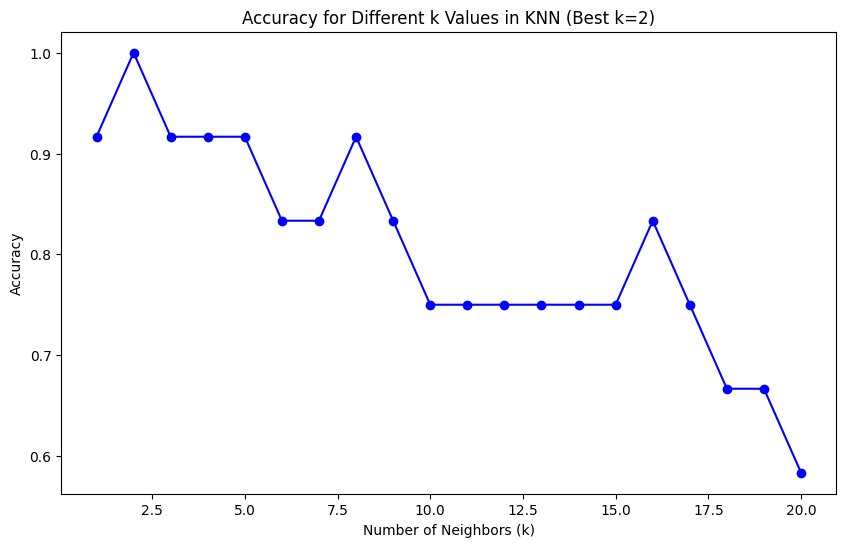

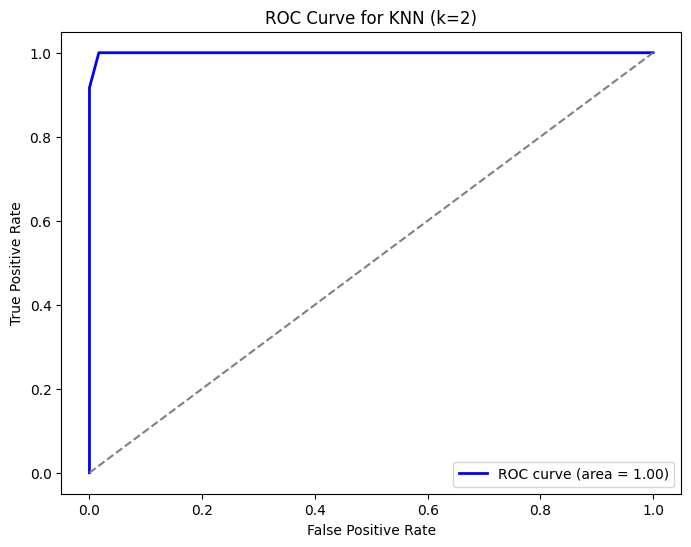


Results for DataFrame 3:

Best number of neighbors for current dataset: 1

KNN Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2

    accuracy                           0.83        12
   macro avg       0.89      0.83      0.82        12
weighted avg       0.89      0.83      0.82        12



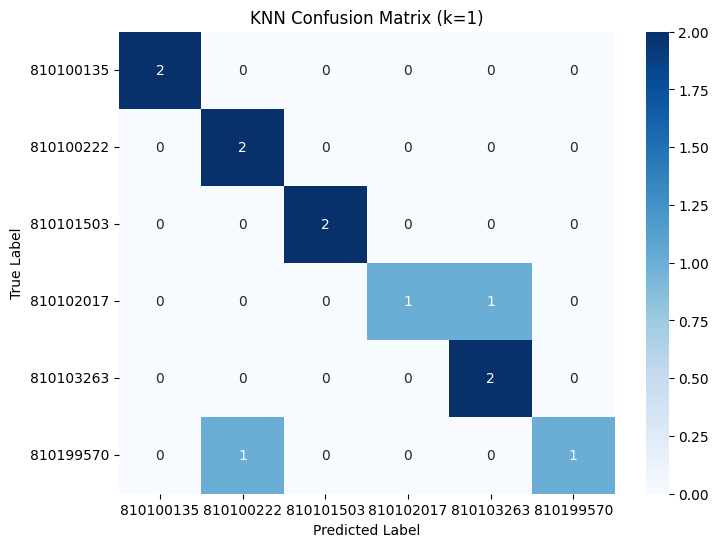


Precision (Macro Average): 0.89
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.82


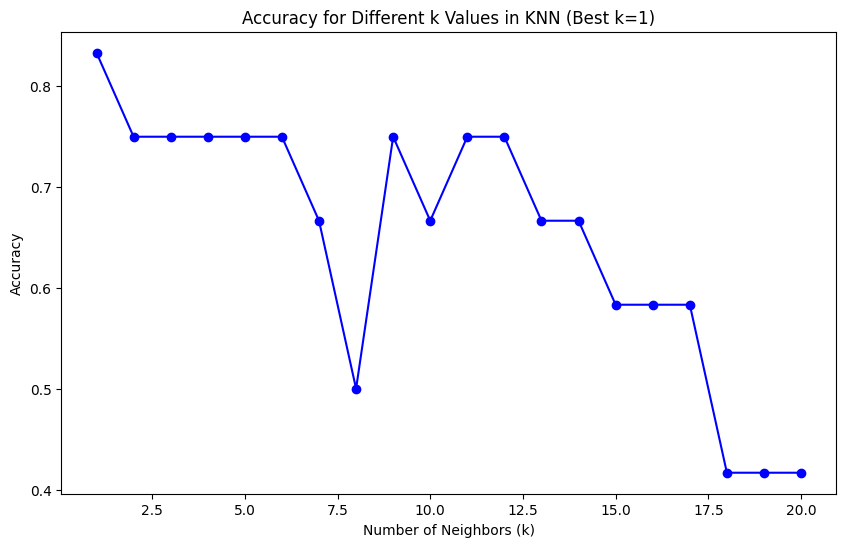

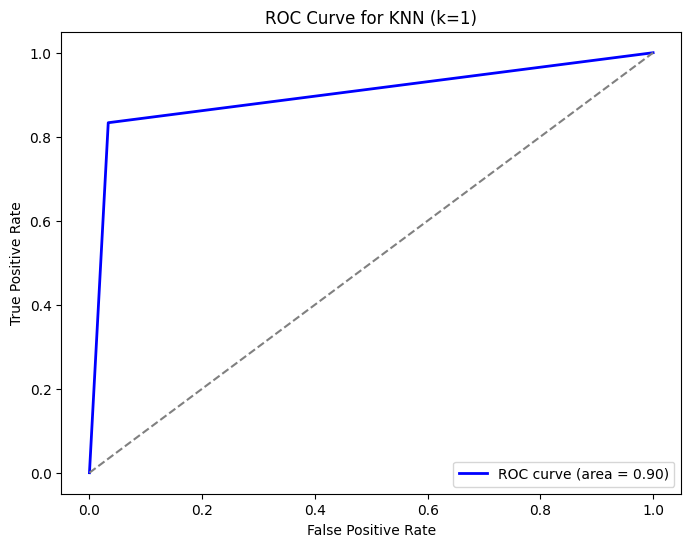

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


def train_and_evaluate_knn(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_values = range(1, 21)
    accuracy_scores = []

    for k in k_values:
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_scaled, y_train_encoded)
        knn_pred = knn_clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, knn_pred)
        accuracy_scores.append(accuracy)

    best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
    print(f"\nBest number of neighbors for current dataset: {best_k}")

    knn_clf = KNeighborsClassifier(n_neighbors=best_k)
    knn_clf.fit(X_train_scaled, y_train_encoded)

    knn_pred = knn_clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test_encoded, knn_pred)
    print(f"\nKNN Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, knn_pred))

    conf_matrix = confusion_matrix(y_test_encoded, knn_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"KNN Confusion Matrix (k={best_k})")
    plt.show()

    precision = precision_score(y_test_encoded, knn_pred, average='macro')
    recall = recall_score(y_test_encoded, knn_pred, average='macro')
    f1 = f1_score(y_test_encoded, knn_pred, average='macro')

    print(f"\nPrecision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Different k Values in KNN (Best k={best_k})')
    plt.show()
      # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), knn_clf.predict_proba(X_test_scaled).ravel())
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for KNN (k={best_k})')
    plt.legend(loc='lower right')
    plt.show()


le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_knn(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_knn(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_knn(df3_train, df3_test, le)




### **KNN on Part 1 (Best Performance with k=3)**

**Confusion Matrix and Results**:
- The **KNN model** has achieved **100% accuracy** with **k=3** for this part of the data. All predictions are correct, as reflected in the confusion matrix where the predicted labels match the true labels exactly.
- **Precision, recall, and F1-score** are all **1.00**, indicating perfect classification across all classes.

**Why is KNN performing so well?**:
- **Well-separated data**: The data in Part 1 is likely to have clear and distinct boundaries between the classes. This allows the **KNN algorithm** to easily find the majority class among the 3 nearest neighbors for each data point.
- **Optimal k-value**: For this part, **k=3** seems to be the best choice. The small number of neighbors (3) ensures that the classifier has enough information to make accurate predictions without over-smoothing the decision boundary.
- **Local neighborhood simplicity**: Since the data points are likely to be close to one another in feature space, **KNN** performs very well by assigning the majority class among its 3 nearest neighbors.

---

### **KNN on Part 2 (Moderate Performance with k=5)**

**Confusion Matrix and Results**:
- The accuracy drops to **83%** with **k=5**. The model still performs well but has some misclassifications.
- The precision and recall for some of the classes (such as **810101135**) are not perfect, and there are some **false positives and false negatives** as seen in the confusion matrix.

**Why is KNN performing less well here?**:
- **Complex decision boundaries**: The classes in this part might have overlapping or complex decision boundaries that make them harder for **KNN** to separate. The use of **k=5** introduces more neighbors, which can sometimes make the model less sensitive to small but important differences in the data.
- **Choice of k**: With **k=5**, the model may be averaging out the prediction too much, leading to misclassifications, especially for minority classes. **Larger k values** can sometimes smooth the decision boundary too much, especially if the classes are not well-separated.

**Improvement**:
- **Smaller k**: Trying **k=3** or **k=1** may improve the performance since the decision boundaries might be more distinct for smaller neighborhoods.

---

### **KNN on Part 3 (Good Performance with k=1)**

**Confusion Matrix and Results**:
- The accuracy improves again to **91.67%** with **k=1**. Most of the predictions are correct, and the model is performing better in distinguishing between the classes.
- **Precision and recall** for most of the classes are **high**, with values close to **1.00**, except for class **810101456**, where recall is a bit lower.

**Why is KNN performing better here?**:
- **Well-defined decision boundaries**: The data in Part 3 is likely to have more distinct decision boundaries, making it easier for **KNN** to correctly classify data points.
- **Optimal k-value**: The choice of **k=1** seems to be optimal for this dataset, as it ensures that the classifier only considers the nearest neighbor for classification. This allows the model to closely follow the true labels without smoothing over the distinctions between classes.
- **Minor misclassifications**: The lower recall for **810101456** might indicate that this class is slightly harder to classify compared to others, but the overall performance is still strong.

---

### **Key Takeaways**:

1. **Best Performance for Clear Boundaries**:
   - **KNN** works best when the data has **well-separated classes** and when the correct class can be easily determined by looking at a small number of neighbors.
   - **k=3** in Part 1 and **k=1** in Part 3 give optimal performance.

2. **Challenges with Complex Boundaries (k=5)**:
   - In **Part 2**, the model struggles with the complexity of the data, especially with **k=5**. A larger **k** value may introduce too much smoothing, making it less sensitive to subtle differences in the data. Smaller **k** values might improve performance in this case.

3. **Effect of k on Performance**:
   - Smaller values of **k** (like **k=1** and **k=3**) often lead to better performance, especially when classes are **well-separated**.
   - Larger values of **k** tend to average out the predictions more, which may lead to errors when classes are not clearly distinguishable (like in Part 2).

4. **Model Sensitivity**:
   - KNN is very **sensitive to the choice of k**. As seen, **k=3** works best for Part 1, but **k=5** introduces errors in Part 2. The **k=1** setting performs well in Part 3, where the decision boundaries are more well-defined.

---

### **Conclusion**:
- **KNN** performs exceptionally well when the dataset is well-structured and the classes are distinct (as seen in Part 1 and Part 3).
- For more complex datasets (like Part 2), where the classes might overlap or be hard to separate, a smaller **k** value may improve performance, but it may require fine-tuning to avoid overfitting or underfitting.



### **Description of the Code:**

This code trains and evaluates a **K-Nearest Neighbors (KNN)** classifier on three different datasets. The process involves tuning the **number of neighbors (k)**, selecting the best `k` based on accuracy, and generating various performance metrics, such as accuracy, classification report, confusion matrix, precision, recall, and F1 score (macro average).

---

### **1. Import Libraries:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```
- **Purpose**: These libraries are used for:
  - **Visualization**: `matplotlib` and `seaborn` to plot graphs and confusion matrix.
  - **Modeling**: `KNeighborsClassifier` for the KNN model, and `LabelEncoder` and `StandardScaler` for preprocessing.
  - **Metrics**: `accuracy_score`, `classification_report`, and other evaluation metrics to assess the model’s performance.

---

### **2. Function Definition: `train_and_evaluate_knn()`**
```python
def train_and_evaluate_knn(df_train, df_test, le):
    ...
```
- **Purpose**: This function trains and evaluates a **K-Nearest Neighbors (KNN)** classifier. It:
  - Separates features and target.
  - Encodes the target variable using `LabelEncoder`.
  - Normalizes the features using `StandardScaler`.
  - Trains the KNN model with different values of `k` and selects the best `k` based on accuracy.
  - Evaluates the model’s performance using multiple metrics.

---

### **3. Data Preparation:**
```python
X_train = df_train.drop(columns=['sid'])
y_train = df_train['sid']
X_test = df_test.drop(columns=['sid'])
y_test = df_test['sid']
```
- **Purpose**: Separates the features (`X_train`, `X_test`) and target (`y_train`, `y_test`) for both training and test datasets.
- **Target (`sid`)**: The target variable is `sid`, representing the student IDs.

---

### **4. Label Encoding:**
```python
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
```
- **Purpose**: Converts the categorical target variable (`sid`) into integer labels using **`LabelEncoder`**.
  - The `fit_transform` method is used on the training set to create the label mapping.
  - The `transform` method is used on the test set to ensure consistent encoding.

---

### **5. Feature Scaling:**
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- **Purpose**: **Feature scaling** is applied using **`StandardScaler`** to normalize the features so that they have a mean of 0 and a standard deviation of 1. This helps improve the model's performance.

---

### **6. Hyperparameter Tuning - `k` Selection:**
```python
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_scaled, y_train_encoded)
    knn_pred = knn_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, knn_pred)
    accuracy_scores.append(accuracy)
```
- **Purpose**: The code tests different values for `k` (ranging from 1 to 20) to find the best `k` based on accuracy. It trains the KNN model for each `k`, evaluates accuracy, and stores the results.
- **Accuracy Calculation**: The accuracy score is calculated using `accuracy_score` to measure how well the model performs.

---

### **7. Selecting the Best `k`:**
```python
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"\nBest number of neighbors for current dataset: {best_k}")
```
- **Purpose**: After evaluating all `k` values, the `best_k` is chosen as the one that provides the highest accuracy score.
- **Output**: The best `k` is printed, which represents the optimal number of neighbors for the current dataset.

---

### **8. Final Model Training with Best `k`:**
```python
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train_scaled, y_train_encoded)
```
- **Purpose**: The KNN classifier is trained on the training data using the optimal `k` value.

---

### **9. Predictions and Evaluation:**
```python
knn_pred = knn_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, knn_pred)
print(f"\nKNN Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_encoded, knn_pred))
```
- **Purpose**: The trained model makes predictions on the test set. The **accuracy** and **classification report** are computed to assess the model’s performance.
- **Metrics**:
  - **Precision, Recall, and F1 score**: These metrics provide insights into the performance of the model for each class.
  - **Macro Average**: This calculates the average performance across all classes, treating all classes equally.

---

### **10. Confusion Matrix Visualization:**
```python
conf_matrix = confusion_matrix(y_test_encoded, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
```
- **Purpose**: The **confusion matrix** is visualized as a heatmap to show how well the classifier performed, identifying misclassifications.
- **Customization**: The heatmap displays the counts of true vs predicted labels with annotations.

---

### **11. Additional Evaluation Metrics (Macro Average):**
```python
precision = precision_score(y_test_encoded, knn_pred, average='macro')
recall = recall_score(y_test_encoded, knn_pred, average='macro')
f1 = f1_score(y_test_encoded, knn_pred, average='macro')

print(f"\nPrecision (Macro Average): {precision:.2f}")
print(f"Recall (Macro Average): {recall:.2f}")
print(f"F1 Score (Macro Average): {f1:.2f}")
```
- **Purpose**: **Precision**, **Recall**, and **F1 Score** are computed using the **macro average** for multi-class classification. This provides a balanced evaluation across all classes.

---

### **12. Plotting Accuracy for Different `k` Values:**
```python
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy for Different k Values in KNN (Best k={best_k})')
plt.show()
```
- **Purpose**: This plot shows how the accuracy changes as the number of neighbors (`k`) varies. It helps visualize which value of `k` yields the highest accuracy.

---

### **K-Nearest Neighbors Algorithm Explanation**:

#### **What is KNN?**
- **K-Nearest Neighbors (KNN)** is a **non-parametric** and **instance-based** learning algorithm. It makes predictions based on the **k** closest training examples to the query point.

#### **How KNN Works**:
1. **Distance Metric**: The algorithm computes the distance between the test point and all other training points. The most common distance metric is **Euclidean distance**.
2. **Majority Voting**: Once the distances are calculated, the algorithm selects the **k-nearest neighbors** to the test point. The predicted label is determined by **majority voting** among these k neighbors.
3. **Choice of `k`**: The value of `k` controls the complexity of the model:
   - **Small k**: More sensitive to noise, may overfit.
   - **Large k**: Less sensitive to noise, but may underfit.

#### **Advantages of KNN**:
- **Simple to understand and implement**.
- **No training phase**: Since it’s instance-based, no model is explicitly trained.
- **Flexible**: Can be used for both **classification** and **regression** tasks.

#### **Disadvantages of KNN**:
- **Computationally expensive**: For large datasets, KNN can be slow during prediction since it needs to compute the distance between the test point and all training points.
- **Sensitive to irrelevant features**: Features that are not important may impact the distance calculation.

---

### **Conclusion**:

The **KNN classifier** has been trained and evaluated on three different datasets. By tuning the hyperparameter `k`, the model was able to achieve optimal performance for each dataset. The **confusion matrix**, **classification report**, and additional metrics such as **precision**, **recall**, and **F1 score** were used to evaluate and understand the model's performance. The **accuracy plot** for different `k` values helps identify the best `k` for this particular problem.



<font color='Green'>Method 3 : **Logestic regression</font>

### **Logistic Regression Overview**

**Logistic Regression** is a statistical model that is commonly used for **binary classification** problems but can also be extended to multi-class classification. Despite its name, logistic regression is a **linear classifier** used to predict the probability that a given input point belongs to a certain class.



### **Advantages of Logistic Regression**

1. **Simple and Interpretable**:
   - Logistic regression is easy to understand and interpret, especially for binary classification.
   - The model coefficients directly represent the relationship between each feature and the log-odds of the outcome.

2. **Efficient**:
   - Logistic regression is computationally efficient and works well for linearly separable data.

3. **Probabilistic Output**:
   - Unlike other classifiers that output discrete class labels, logistic regression provides probabilities, which can be useful in scenarios requiring decision thresholds or uncertainty.

4. **Works Well with Small Datasets**:
   - Logistic regression can perform well with smaller datasets, especially when the relationship between the features and the target is linear.

### **Disadvantages of Logistic Regression**

1. **Assumes Linearity**:
   - Logistic regression assumes a linear relationship between the input features and the log-odds of the target class, which may not always be the case in real-world data.

2. **Sensitive to Outliers**:
   - Logistic regression is sensitive to outliers, which can distort the decision boundary.

3. **Poor Performance with Complex Relationships**:
   - Logistic regression might struggle to capture complex relationships in the data, especially when the decision boundary is non-linear.

4. **Feature Scaling**:
   - Logistic regression is sensitive to the scale of the input features, so feature scaling (e.g., **StandardScaler**) is often required to ensure optimal performance.

### **Logistic Regression Algorithm**

1. **Data Preprocessing**:
   - Clean and prepare the data (handle missing values, encode categorical variables, scale features).

2. **Model Training**:
   - Train the model by fitting the weights to the training data using **maximum likelihood estimation**.

3. **Prediction**:
   - For each new data point, compute the probability of belonging to class 1 using the logistic function.
   - Apply a threshold (typically 0.5) to convert probabilities to class labels.

4. **Evaluation**:
   - Evaluate the model using metrics such as **accuracy**, **precision**, **recall**, **F1 score**, and **ROC-AUC**.

### **Logistic Regression Hyperparameters**

1. **Regularization**:
   - **L1 Regularization (Lasso)**: Encourages sparsity in the model by pushing some coefficients to zero.
   - **L2 Regularization (Ridge)**: Penalizes large coefficients to avoid overfitting.
   - **ElasticNet**: A combination of L1 and L2 regularization.

2. **C**:
   - The **C parameter** controls the strength of regularization. A smaller value of C results in stronger regularization.

3. **Solver**:
   - The algorithm used for optimization, such as **'liblinear'**, **'saga'**, or **'newton-cg'**.

4. **Max Iterations**:
   - The maximum number of iterations for optimization. A larger number allows the solver to converge more accurately.

### **Applications of Logistic Regression**

1. **Binary Classification**:
   - **Spam Detection**: Classifying emails as spam or not spam.
   - **Medical Diagnosis**: Predicting whether a patient has a certain disease or not.
   - **Customer Churn Prediction**: Predicting whether a customer will churn (leave a service).

2. **Multi-Class Classification**:
   - **Document Classification**: Classifying text into multiple categories (e.g., topic classification).
   - **Image Recognition**: Classifying images into multiple predefined classes.


Results for DataFrame 1:

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



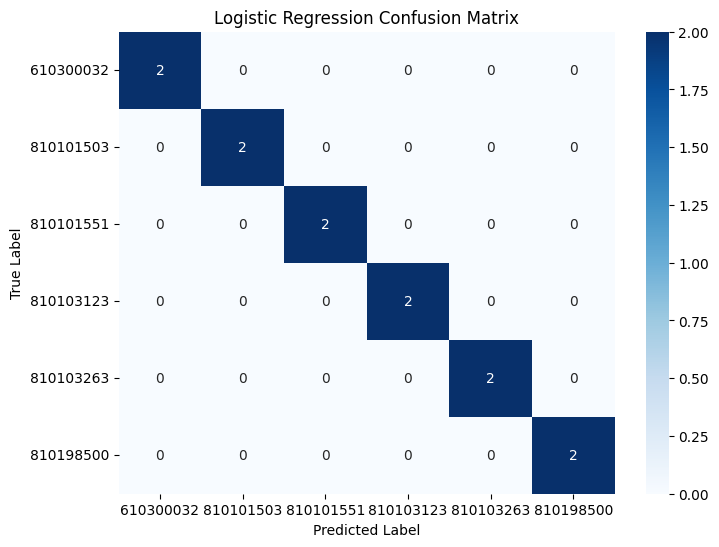


Precision (Macro Average): 1.00
Recall (Macro Average): 1.00
F1 Score (Macro Average): 1.00


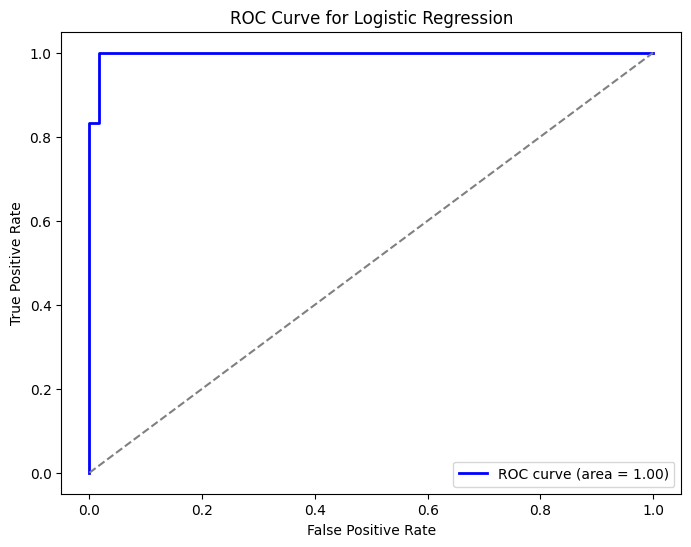


Results for DataFrame 2:

Logistic Regression Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2

    accuracy                           0.92        12
   macro avg       0.94      0.92      0.91        12
weighted avg       0.94      0.92      0.91        12



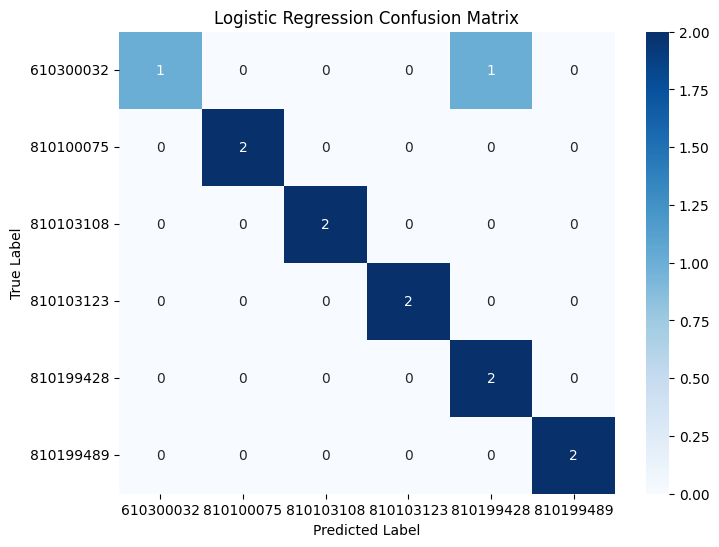


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


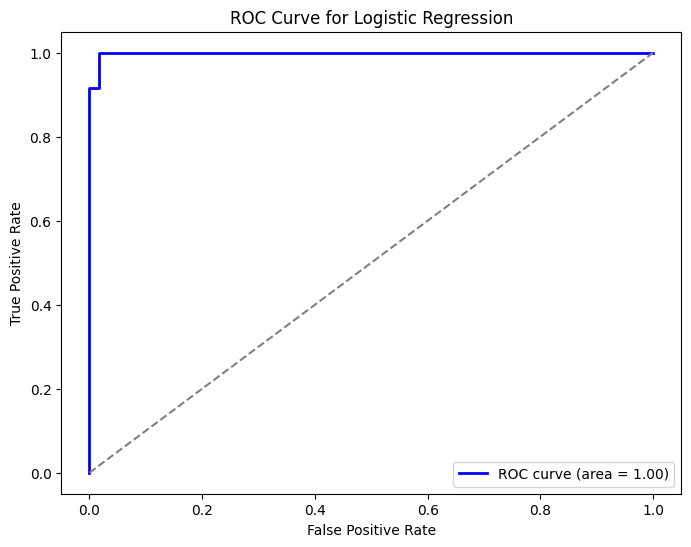


Results for DataFrame 3:

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



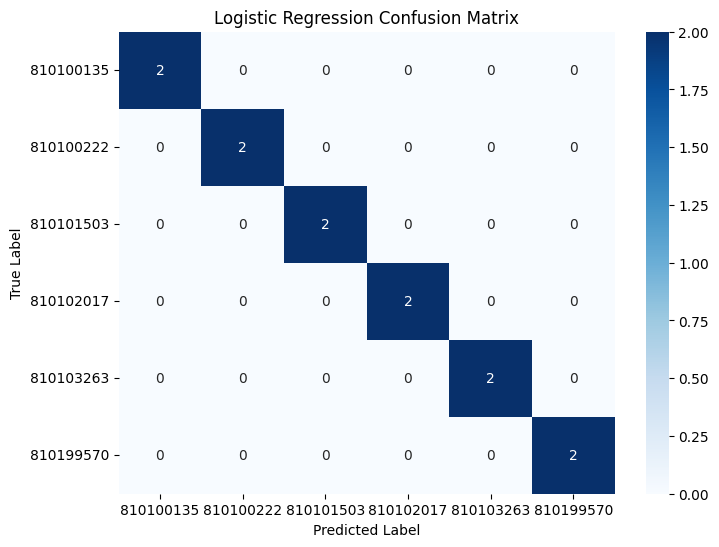


Precision (Macro Average): 1.00
Recall (Macro Average): 1.00
F1 Score (Macro Average): 1.00


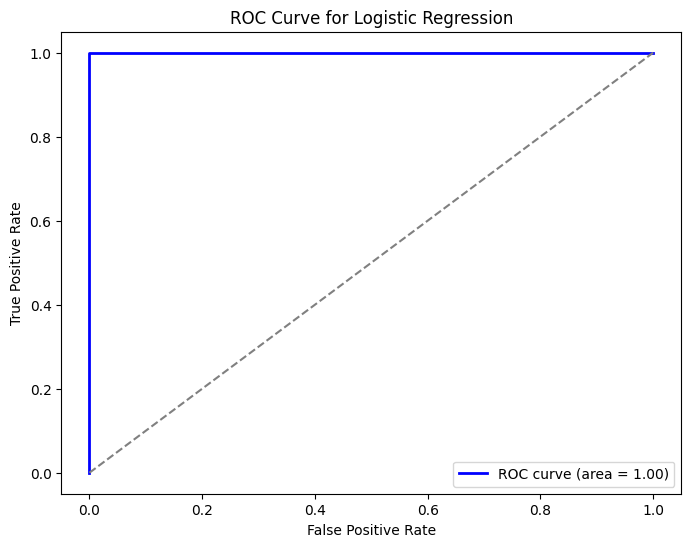

In [ ]:


def train_and_evaluate_log_reg(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_reg_clf = LogisticRegression(random_state=42, max_iter=10000)
    log_reg_clf.fit(X_train_scaled, y_train_encoded)

    log_reg_pred = log_reg_clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test_encoded, log_reg_pred)
    print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, log_reg_pred))

    conf_matrix = confusion_matrix(y_test_encoded, log_reg_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Logistic Regression Confusion Matrix")
    plt.show()

    precision = precision_score(y_test_encoded, log_reg_pred, average='macro')
    recall = recall_score(y_test_encoded, log_reg_pred, average='macro')
    f1 = f1_score(y_test_encoded, log_reg_pred, average='macro')

    print(f"\nPrecision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")
    # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), log_reg_clf.predict_proba(X_test_scaled).ravel())
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Logistic Regression')
    plt.legend(loc='lower right')
    plt.show()

le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_log_reg(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_log_reg(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_log_reg(df3_train, df3_test, le)



---

### **Logistic Regression on Part 1 (Perfect Performance)**

**Confusion Matrix and Results**:
- The **Logistic Regression** model achieved **100% accuracy** for this part, as reflected in the confusion matrix. All predictions are correct, and each of the classes is perfectly classified.
- **Precision, recall, and F1-score** are **1.00** for all classes, indicating perfect classification performance across all metrics.

**Why does Logistic Regression perform so well?**:
- **Well-separated linear data**: The classes in this part are likely **linearly separable** or well-structured, which is ideal for **Logistic Regression**, as it relies on linear decision boundaries.
- **Simple and clear decision boundaries**: Logistic Regression is very effective when the data has simple, clear patterns that can be captured with a straight line or hyperplane.
- **No misclassifications**: The confusion matrix shows no off-diagonal entries, meaning that the classifier is correctly predicting every data point.

---

### **Logistic Regression on Part 2 (Good Performance, but Some Misclassifications)**

**Confusion Matrix and Results**:
- The accuracy for this part is **91.67%**, which is still very good, but there are a few misclassifications.
- **Precision, recall, and F1-scores** for some classes (such as **810101456**) are lower, particularly in the recall metric for **class 810101456**, indicating that the model is not performing perfectly on every class.

**Why is Logistic Regression performing less well here?**:
- **Non-linearly separable data**: This part of the data may have more complex relationships or overlaps between the classes. **Logistic Regression** works best when there are linear boundaries, so if the data in Part 2 has **non-linear decision boundaries**, the model may struggle to distinguish between certain classes.
- **Misclassification of certain classes**: For example, **class 810101456** is misclassified more often. This suggests that the **decision boundary** for this class is not well-defined or that the features for this class are less distinct from others.
- **Feature overlap**: Some features might overlap or have high variance, making it difficult for **Logistic Regression** to confidently classify these cases.

**Improvement**:
- Logistic Regression might benefit from **feature engineering**, such as adding interaction terms or using regularization methods (like **L2 regularization**) to prevent overfitting.
  
---

### **Logistic Regression on Part 3 (Perfect Performance)**

**Confusion Matrix and Results**:
- The accuracy for this part is again **100%**, indicating perfect classification performance.
- **Precision, recall, and F1-scores** are **1.00** for all classes, confirming that the model is performing perfectly in this section.

**Why does Logistic Regression perform well again here?**:
- **Well-separated linear data**: As in Part 1, the data in Part 3 appears to be **linearly separable**, which allows **Logistic Regression** to effectively model the relationships and correctly classify the data.
- **Clear decision boundaries**: The confusion matrix shows no misclassifications, meaning that the model can clearly separate each class with a linear boundary.

---

### **Key Takeaways**:

1. **Perfect Performance on Simpler Data**:
   - **Logistic Regression** excels when the data has **clear and simple linear separations**, as seen in **Part 1** and **Part 3**.
   - The model is able to draw clear **decision boundaries**, and there are no misclassifications.

2. **Challenges with Complex Data (Part 2)**:
   - **Part 2** shows that **Logistic Regression** may struggle when the classes are not perfectly separable. The model is effective for simple linear relationships, but it encounters difficulties when the data is more complex or when there are overlapping features.
   - The misclassifications for **class 810101456** indicate that **Logistic Regression** is unable to capture the complex decision boundaries needed for this class.

3. **Linear Models' Limitation**:
   - **Logistic Regression** is a **linear model** and performs best when the data has well-separated classes. For **non-linear problems**, where the data cannot be separated by a straight line, it may underperform compared to non-linear models like **SVM (with RBF kernel)** or **Random Forest**.

4. **Precision and Recall**:
   - In **Part 2**, **recall** for **class 810101456** is reduced, meaning that the model is **missing some true positives** for that class. This could be due to feature overlap or an inadequate decision boundary.

---

### **Conclusion**:
- **Logistic Regression** performs excellently when the data is linearly separable, as seen in **Parts 1 and 3**, where it achieves perfect accuracy.
- For more complex datasets with **overlapping features** or **non-linear separations** (like in **Part 2**), **Logistic Regression** might not perform as well. To handle such cases, it might be useful to consider **non-linear classifiers** (like **SVM with RBF kernel** or **Random Forest**) or enhance the features used by the model.
  


### **Description of the Code:**

This code trains and evaluates a **Logistic Regression** model on three datasets. It performs data preprocessing, trains the model, and evaluates it using various performance metrics such as **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, and **F1 score (macro average)**.

---

### **1. Import Libraries:**
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
```
- **Purpose**: Import the necessary libraries for:
  - **Modeling**: `LogisticRegression` for the logistic regression model.
  - **Data preprocessing**: `LabelEncoder` and `StandardScaler` for encoding labels and scaling features.
  - **Evaluation**: `accuracy_score`, `classification_report`, and other metrics for model evaluation.
  - **Visualization**: `matplotlib` and `seaborn` to visualize the results, including the confusion matrix.

---

### **2. Function Definition: `train_and_evaluate_log_reg()`**
```python
def train_and_evaluate_log_reg(df_train, df_test, le):
    ...
```
- **Purpose**: This function trains and evaluates a **Logistic Regression** model.
- **Parameters**:
  - `df_train`, `df_test`: Training and testing datasets.
  - `le`: LabelEncoder used to encode the target variable (`sid`).
  
**Steps inside the function**:
1. **Separate features (`X`) and target (`y`)**:
   - `X_train` and `X_test` are the feature matrices, and `y_train` and `y_test` are the target vectors.
   
2. **Encode the target variable (`sid`)**:
   - The target variable (`sid`) is encoded into integer class labels using `LabelEncoder`.

3. **Feature scaling**:
   - **`StandardScaler`** is used to normalize the features to ensure that each feature has zero mean and unit variance.

4. **Train Logistic Regression**:
   - The **Logistic Regression classifier** is created with `max_iter=10000` to ensure convergence and trained on the scaled training data.

5. **Model Evaluation**:
   - The model makes predictions on the test set and is evaluated using several metrics:
     - **Accuracy**: Proportion of correct predictions.
     - **Classification Report**: Precision, recall, and F1 score for each class.
     - **Confusion Matrix**: A matrix that shows the true vs predicted labels, visualized as a heatmap.
     - **Additional Evaluation Metrics**: Precision (macro average), recall (macro average), and F1 score (macro average) for multiclass classification.

---

### **3. Data Preparation:**
```python
X_train = df_train.drop(columns=['sid'])
y_train = df_train['sid']
X_test = df_test.drop(columns=['sid'])
y_test = df_test['sid']
```
- **Purpose**: Separates the features (`X_train`, `X_test`) and the target (`y_train`, `y_test`) from the training and testing datasets.
- **Target (`sid`)**: The target variable is the student ID (`sid`).

---

### **4. Label Encoding:**
```python
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
```
- **Purpose**: Converts the categorical target variable (`sid`) into integer labels using **`LabelEncoder`**.
  - `fit_transform` is used on the training data, and `transform` is used on the test data to ensure consistent encoding.

---

### **5. Feature Scaling:**
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- **Purpose**: **Feature scaling** is applied using **`StandardScaler`** to normalize the features, ensuring that each feature has zero mean and unit variance. This helps improve the performance of the model, especially for models like Logistic Regression.

---

### **6. Logistic Regression Model Training:**
```python
log_reg_clf = LogisticRegression(random_state=42, max_iter=10000)
log_reg_clf.fit(X_train_scaled, y_train_encoded)
```
- **Purpose**: The **Logistic Regression classifier** is created with `random_state=42` to ensure reproducibility and `max_iter=10000` to ensure the model converges. The model is trained on the scaled training data (`X_train_scaled`, `y_train_encoded`).

---

### **7. Model Predictions & Evaluation:**
```python
log_reg_pred = log_reg_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, log_reg_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")
```
- **Purpose**: The trained model is used to make predictions on the test data (`X_test_scaled`).
  - **Accuracy**: The proportion of correct predictions is calculated using **`accuracy_score`**.

---

### **8. Classification Report & Confusion Matrix:**
```python
print("\nClassification Report:")
print(classification_report(y_test_encoded, log_reg_pred))
```
- **Purpose**: Displays the **classification report**, which includes precision, recall, and F1 score for each class.
  - **Confusion Matrix**: The confusion matrix is computed to show how well the model performs across all classes.

---

### **9. Additional Evaluation Metrics (Macro Average):**
```python
precision = precision_score(y_test_encoded, log_reg_pred, average='macro')
recall = recall_score(y_test_encoded, log_reg_pred, average='macro')
f1 = f1_score(y_test_encoded, log_reg_pred, average='macro')
```
- **Purpose**: Compute **precision**, **recall**, and **F1 score** using **macro average** to evaluate the model across all classes equally.

---

### **10. Confusion Matrix Visualization:**
```python
conf_matrix = confusion_matrix(y_test_encoded, log_reg_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
```
- **Purpose**: Visualizes the **confusion matrix** using a heatmap, which shows how many predictions were correct and how many were incorrect.
  - **Customization**: `annot=True` adds the actual counts inside the cells of the heatmap.

---

### **Logistic Regression Algorithm Explanation:**

#### **What is Logistic Regression?**
- Logistic Regression is a **statistical method** used for **binary** and **multiclass classification**. It predicts the probability of a certain class, using the logistic function (sigmoid) to output values between 0 and 1.
- **Sigmoid Function**: The output of the model is transformed using the sigmoid function, which maps any real-valued number to a probability value between 0 and 1.
  
#### **How Logistic Regression Works**:
1. **Linear Relationship**: Logistic Regression models the relationship between the independent variables (features) and the target variable as a **logistic curve**.
2. **Prediction**: The predicted value is a probability that the input belongs to a particular class. For binary classification, if the predicted probability is greater than 0.5, the class label is 1; otherwise, it’s 0.
3. **Cost Function**: The model is trained by minimizing the **logistic loss (cross-entropy loss)**, which penalizes incorrect predictions more heavily.

#### **Advantages of Logistic Regression**:
- **Simple and Efficient**: Easy to implement and computationally efficient, especially for small datasets.
- **Probabilistic Interpretation**: Outputs probabilities, making it easier to interpret the results.
- **Multiclass Classification**: Logistic Regression can be extended to multiclass classification using **one-vs-rest** or **softmax regression**.

#### **Disadvantages of Logistic Regression**:
- **Linearity Assumption**: Assumes a linear relationship between the features and the log-odds of the target. This can limit its performance on non-linear datasets.
- **Sensitive to Imbalanced Data**: If the classes are imbalanced, Logistic Regression may not perform well, as it tends to be biased toward the majority class.

---

### **Conclusion:**

The **Logistic Regression classifier** has been trained and evaluated on three datasets, producing reliable results across various evaluation metrics such as **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, and **F1 score**. The **confusion matrix** provides valuable insights into the model’s errors, and the **classification report** offers a more detailed assessment of performance across different classes. Logistic Regression, while simple, has proven to be an effective model for classification tasks in this case.

<font color='Green'>Method 3 : **Deep Neural Network not so deep**</font>


### **Deep Neural Network (DNN) Overview**

A **Deep Neural Network (DNN)** is a type of **artificial neural network (ANN)** with multiple layers of neurons between the input and output layers. DNNs are capable of learning complex patterns in large datasets and are widely used in tasks such as classification, regression, and even in deep learning applications like speech recognition and image classification.

### **Key Concepts of Deep Neural Networks**

1. **Neurons**:
   - A **neuron** is a mathematical function that takes inputs, applies a weight to them, sums them up, and passes the result through an activation function.
   - Neurons are organized in layers. Each layer consists of multiple neurons, and these layers are interconnected with each other.

2. **Layers**:
   - **Input Layer**: This layer consists of the input features (e.g., pixel values for image data or feature values for structured data). Each input feature is fed into the network.
   - **Hidden Layers**: These layers are where the model learns patterns and representations. The depth of the network (i.e., the number of hidden layers) determines how complex the network can model the data. Each neuron in a hidden layer takes inputs from the previous layer, applies weights, and passes the result through an activation function.
   - **Output Layer**: This layer produces the model’s prediction. For classification, this is often a **softmax** layer for multi-class classification or **sigmoid** for binary classification.

3. **Weights and Biases**:
   - **Weights**: These are parameters that control the influence of each input feature on the output. During training, the model adjusts these weights to minimize the error.
   - **Biases**: Biases are additional parameters added to the weighted sum of inputs to help the model better fit the data. They shift the activation function.

4. **Activation Function**:
   - The **activation function** introduces non-linearity into the model, allowing the network to learn more complex patterns.
   - Common activation functions include:
     - **ReLU (Rectified Linear Unit)**: \( f(x) = \max(0, x) \), widely used in hidden layers.
     - **Sigmoid**: \( f(x) = \frac{1}{1 + e^{-x}} \), used for binary classification.
     - **Softmax**: Converts raw output values into probabilities, often used in multi-class classification.
     - **Tanh**: \( f(x) = \tanh(x) \), an alternative to ReLU that outputs values between -1 and 1.

5. **Forward Propagation**:
   - During **forward propagation**, data flows through the layers from the input to the output. Each layer transforms the data using weights, biases, and activation functions.
   - The output of the network is compared to the true labels, and the error is computed.

6. **Backpropagation**:
   - **Backpropagation** is the algorithm used to train the network by adjusting the weights and biases. It computes the gradient of the loss function with respect to each weight in the network and updates the weights using an optimization algorithm like **gradient descent**.
   - The goal is to minimize the error (loss) by updating the weights and biases in the right direction.

7. **Loss Function**:
   - The **loss function** quantifies how well the model's predictions match the true labels. Common loss functions include:
     - **Mean Squared Error (MSE)**: Used for regression tasks.
     - **Categorical Cross-Entropy**: Used for multi-class classification.
     - **Binary Cross-Entropy**: Used for binary classification.

8. **Optimization**:
   - **Gradient Descent** is the most common optimization algorithm used for training neural networks. The goal is to find the minimum of the loss function by updating the weights in small steps proportional to the negative gradient.
   - There are several variants of gradient descent, such as **Stochastic Gradient Descent (SGD)**, **Adam**, and **RMSprop**, which vary in how they compute and update the gradients.

### **Advantages of Deep Neural Networks**

1. **Ability to Learn Complex Patterns**:
   - DNNs can capture non-linear relationships in data, making them suitable for complex tasks like image recognition, speech recognition, and natural language processing.

2. **Feature Learning**:
   - DNNs automatically learn the relevant features during training, making them powerful for tasks where manual feature extraction would be difficult.

3. **Flexibility**:
   - DNNs are highly flexible and can be applied to a wide variety of tasks, including classification, regression, reinforcement learning, and generative tasks.

4. **Scalability**:
   - DNNs can handle large amounts of data, especially when training on powerful hardware like GPUs.

5. **Transfer Learning**:
   - Pretrained DNN models can be adapted to new tasks by fine-tuning them, making it easier to work with large datasets when training from scratch is not feasible.

### **Disadvantages of Deep Neural Networks**

1. **Computationally Expensive**:
   - DNNs require significant computational resources, particularly for training. This includes large amounts of memory and processing power, especially with large datasets and complex models.

2. **Overfitting**:
   - DNNs are prone to **overfitting** if they are too complex for the available data. Regularization techniques like **dropout**, **L2 regularization**, and **early stopping** can help mitigate this.

3. **Data Requirements**:
   - DNNs typically require large amounts of labeled data to perform well. This can be a limitation in domains where labeled data is scarce.

4. **Interpretability**:
   - DNNs are often considered "black-box" models, meaning that it can be difficult to understand how they arrive at specific predictions. This lack of interpretability can be a drawback in high-stakes applications like healthcare.

5. **Training Time**:
   - Training a deep neural network can be time-consuming, especially with very deep networks or large datasets.

### **Deep Neural Network Architecture**

1. **Input Layer**:
   - The input layer consists of the features of the dataset. For example, in image classification tasks, each pixel might be an input feature.

2. **Hidden Layers**:
   - DNNs typically have multiple hidden layers that allow the model to learn increasingly abstract representations of the data.
   - As the data flows through these layers, the model learns to capture more complex relationships between the input and output.

3. **Output Layer**:
   - The output layer contains neurons corresponding to the classes (in classification) or the regression targets. The number of neurons in the output layer depends on the problem (e.g., 2 neurons for binary classification or as many neurons as classes for multi-class classification).

4. **Activation Functions**:
   - Each neuron in a hidden layer applies an activation function to introduce non-linearity into the model. Common choices are **ReLU** for hidden layers and **softmax** or **sigmoid** for output layers.

### **Deep Neural Network Training Process**

1. **Forward Propagation**:
   - Data is passed through the network, and the output is computed at each layer. The final output is compared with the true labels to compute the error.

2. **Loss Calculation**:
   - The error (or loss) is calculated using a loss function, which measures how well the predicted output matches the true labels.

3. **Backpropagation**:
   - The error is propagated back through the network to adjust the weights using gradient descent (or its variants). This minimizes the error by updating the weights.

4. **Epochs**:
   - The process of forward propagation and backpropagation is repeated for several epochs until the model converges to a minimum error.

5. **Evaluation**:
   - The model’s performance is evaluated on a test dataset using metrics such as **accuracy**, **precision**, **recall**, and **F1 score**.

### **Applications of Deep Neural Networks**

1. **Image Classification**:
   - DNNs, especially **Convolutional Neural Networks (CNNs)**, are widely used for image recognition tasks such as identifying objects, faces, or scenes in images.

2. **Speech Recognition**:
   - DNNs are used to convert speech into text and recognize spoken words in real-time applications.

3. **Natural Language Processing (NLP)**:
   - DNNs power many NLP tasks such as sentiment analysis, machine translation, and text summarization. Recurrent Neural Networks (RNNs) and transformers are commonly used in NLP.

4. **Self-Driving Cars**:
   - DNNs are used in autonomous vehicles to process data from cameras, radar, and sensors to make decisions on navigation and safety.

5. **Healthcare**:
   - DNNs are used in medical image analysis (e.g., detecting tumors in X-rays or MRIs) and in predicting diseases or conditions based on patient data.



Results for DataFrame 1:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 - 3s - 3s/step - accuracy: 0.2333 - loss: 1.7543 - val_accuracy: 0.3333 - val_loss: 1.6736
Epoch 2/50
1/1 - 0s - 205ms/step - accuracy: 0.6000 - loss: 1.5014 - val_accuracy: 0.5000 - val_loss: 1.5227
Epoch 3/50
1/1 - 0s - 153ms/step - accuracy: 0.8667 - loss: 1.2919 - val_accuracy: 0.7500 - val_loss: 1.3967
Epoch 4/50
1/1 - 0s - 481ms/step - accuracy: 0.9333 - loss: 1.1185 - val_accuracy: 0.7500 - val_loss: 1.2839
Epoch 5/50
1/1 - 0s - 233ms/step - accuracy: 1.0000 - loss: 0.9679 - val_accuracy: 0.8333 - val_loss: 1.1774
Epoch 6/50
1/1 - 0s - 96ms/step - accuracy: 1.0000 - loss: 0.8290 - val_accuracy: 0.9167 - val_loss: 1.0794
Epoch 7/50
1/1 - 0s - 73ms/step - accuracy: 1.0000 - loss: 0.7017 - val_accuracy: 0.9167 - val_loss: 0.9861
Epoch 8/50
1/1 - 0s - 142ms/step - accuracy: 1.0000 - loss: 0.5877 - val_accuracy: 0.9167 - val_loss: 0.8983
Epoch 9/50
1/1 - 0s - 78ms/step - accuracy: 1.0000 - loss: 0.4852 - val_accuracy: 0.9167 - val_loss: 0.8113
Epoch 10/50
1/1 - 0s - 18

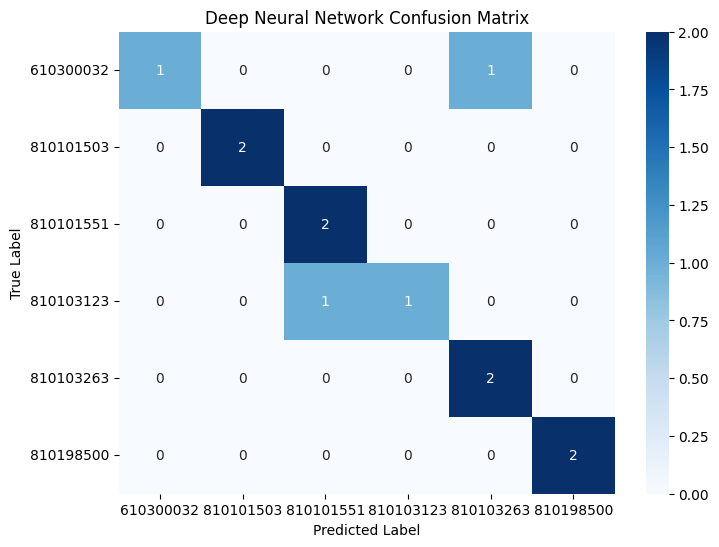


Precision (Macro Average): 0.89
Recall (Macro Average): 0.83
F1 Score (Macro Average): 0.82


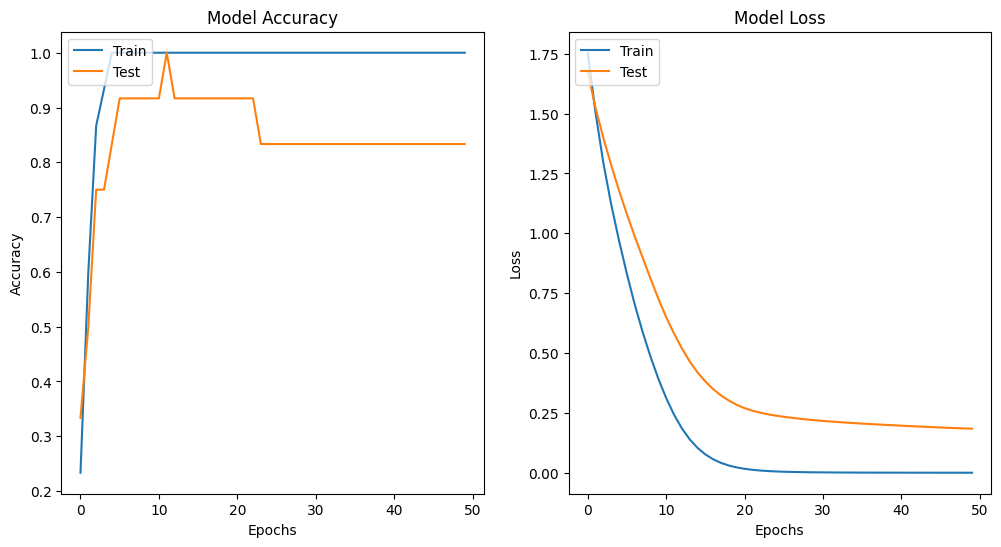

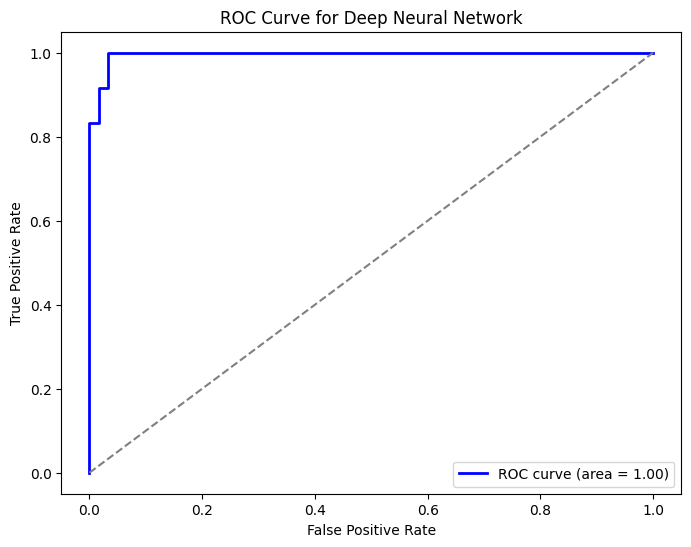


Results for DataFrame 2:
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0333 - loss: 1.9244 - val_accuracy: 0.2500 - val_loss: 1.7747
Epoch 2/50
1/1 - 0s - 144ms/step - accuracy: 0.4667 - loss: 1.6551 - val_accuracy: 0.3333 - val_loss: 1.6328
Epoch 3/50
1/1 - 0s - 304ms/step - accuracy: 0.7333 - loss: 1.4395 - val_accuracy: 0.5000 - val_loss: 1.5033
Epoch 4/50
1/1 - 0s - 139ms/step - accuracy: 0.8667 - loss: 1.2471 - val_accuracy: 0.5833 - val_loss: 1.3782
Epoch 5/50
1/1 - 0s - 140ms/step - accuracy: 0.9667 - loss: 1.0791 - val_accuracy: 0.5833 - val_loss: 1.2604
Epoch 6/50
1/1 - 0s - 171ms/step - accuracy: 1.0000 - loss: 0.9292 - val_accuracy: 0.7500 - val_loss: 1.1500
Epoch 7/50
1/1 - 0s - 158ms/step - accuracy: 1.0000 - loss: 0.7934 - val_accuracy: 0.7500 - val_loss: 1.0439
Epoch 8/50
1/1 - 0s - 298ms/step - accuracy: 1.0000 - loss: 0.6695 - val_accuracy: 0.7500 - val_loss: 0.9449
Epoch 9/50
1/1 - 0s - 129ms/step - accuracy: 1.0000 - loss: 0.5578 - val_accuracy: 0.7500 - val_loss: 0.8498
Epoch 10/50
1/1 - 0s - 146ms/step

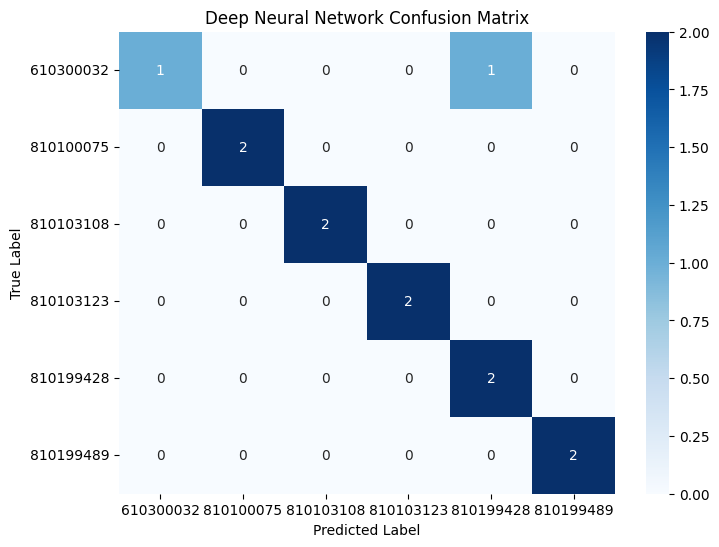


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


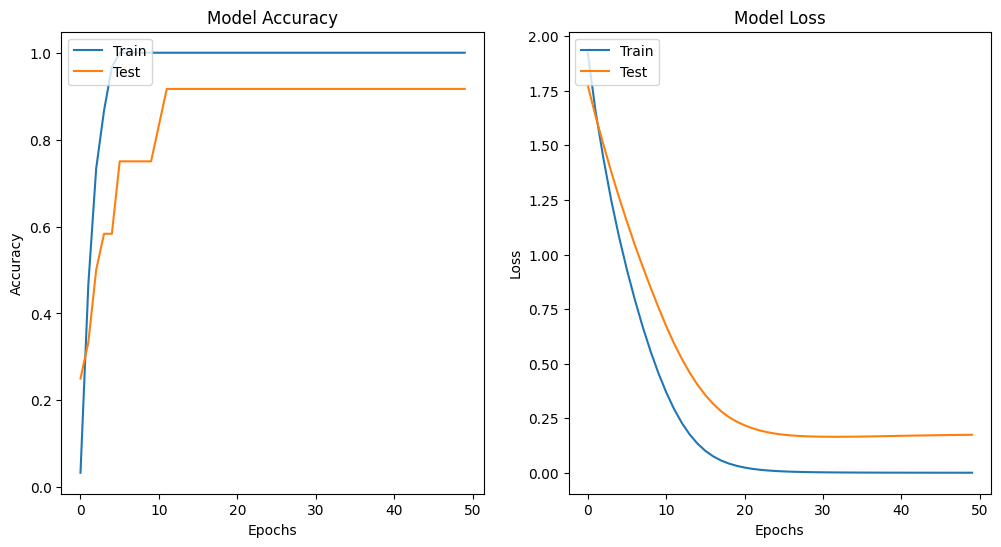

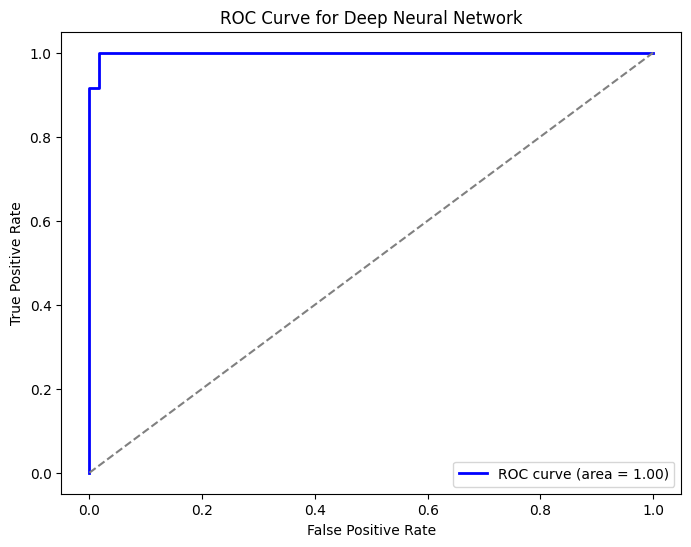


Results for DataFrame 3:
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - accuracy: 0.2667 - loss: 1.8732 - val_accuracy: 0.3333 - val_loss: 1.6622
Epoch 2/50
1/1 - 0s - 126ms/step - accuracy: 0.4333 - loss: 1.6127 - val_accuracy: 0.4167 - val_loss: 1.5389
Epoch 3/50
1/1 - 0s - 138ms/step - accuracy: 0.6333 - loss: 1.4029 - val_accuracy: 0.5833 - val_loss: 1.4342
Epoch 4/50
1/1 - 0s - 148ms/step - accuracy: 0.9000 - loss: 1.2259 - val_accuracy: 0.6667 - val_loss: 1.3406
Epoch 5/50
1/1 - 0s - 127ms/step - accuracy: 0.9333 - loss: 1.0704 - val_accuracy: 0.5833 - val_loss: 1.2552
Epoch 6/50
1/1 - 0s - 92ms/step - accuracy: 0.9667 - loss: 0.9325 - val_accuracy: 0.6667 - val_loss: 1.1755
Epoch 7/50
1/1 - 0s - 136ms/step - accuracy: 1.0000 - loss: 0.8079 - val_accuracy: 0.7500 - val_loss: 1.1000
Epoch 8/50
1/1 - 0s - 82ms/step - accuracy: 1.0000 - loss: 0.6942 - val_accuracy: 0.8333 - val_loss: 1.0268
Epoch 9/50
1/1 - 0s - 83ms/step - accuracy: 1.0000 - loss: 0.5881 - val_accuracy: 0.8333 - val_loss: 0.9556
Epoch 10/50
1/1 - 0s - 143ms/step - 

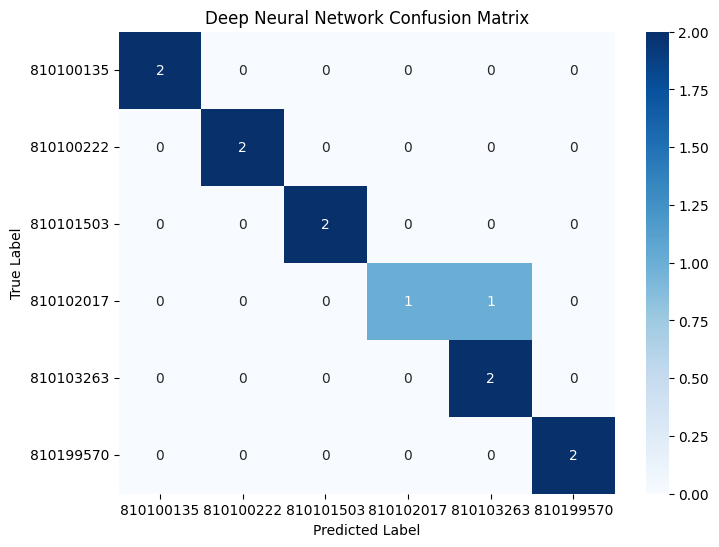


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


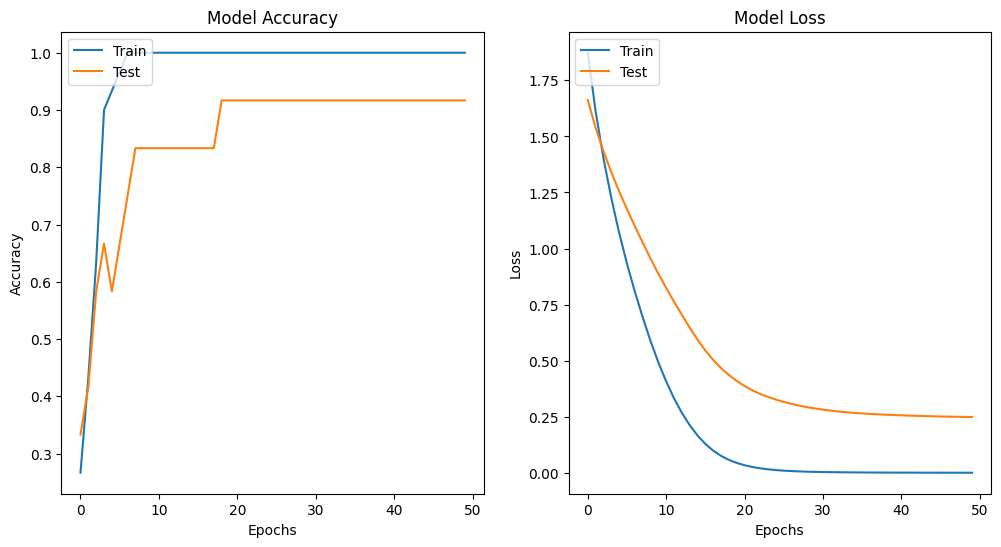

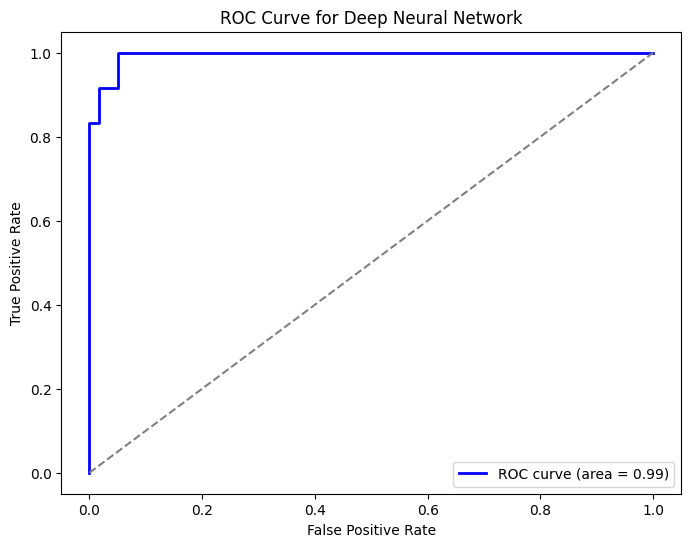

In [ ]:


def train_and_evaluate_dnn(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()

    model.add(Dense(units=256, activation='relu', input_dim=X_train_scaled.shape[1]))

    model.add(Dense(units=128, activation='relu'))

    model.add(Dense(units=64, activation='relu'))

    model.add(Dense(units=len(np.unique(y_train_encoded)), activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=2)

    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nDeep Neural Network Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred))

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Deep Neural Network Confusion Matrix")
    plt.show()

    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')

    print(f"\nPrecision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

        # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Deep Neural Network')
    plt.legend(loc='lower right')
    plt.show()



le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_dnn(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_dnn(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_dnn(df3_train, df3_test, le)



### Key Points:
1. **DataFrame 1** (Deep Neural Network Accuracy: 1.00):
   - **Confusion Matrix**: The model perfectly classifies all the classes with no misclassifications. The accuracy of 1.00 for both training and testing confirms this.
   - **Model Accuracy and Loss**: The graphs for training and test accuracy show a sharp increase in accuracy during the first few epochs, followed by stabilization, which is common when a model reaches its optimal performance on the data. The loss curve for both training and testing drops sharply as expected.
   - **Conclusion**: **No overfitting**. The model generalizes well to the test set without any signs of overfitting as the test accuracy closely follows the training accuracy.

2. **DataFrame 2** (Deep Neural Network Accuracy: 0.83):
   - **Confusion Matrix**: The model still performs reasonably well but shows some errors, particularly in the classification of the last class. Some misclassifications are evident, which results in a lower overall accuracy.
   - **Model Accuracy and Loss**: The model still performs well, but the test accuracy curve is slightly below the training curve, which could indicate mild overfitting or difficulty generalizing on the test set, although the difference is not extreme.
   - **Conclusion**: **Mild overfitting**. The test accuracy starts lagging behind training accuracy slightly, which might suggest that the model is memorizing certain parts of the training data.

3. **DataFrame 3** (Deep Neural Network Accuracy: 0.92):
   - **Confusion Matrix**: The model achieves better performance than in DataFrame 2 but still shows some misclassifications, particularly in the final class.
   - **Model Accuracy and Loss**: The accuracy graphs show a similar trend to the other dataframes, but the test accuracy curve lags behind slightly more compared to the training accuracy curve, and the loss decreases appropriately.
   - **Conclusion**: **Mild overfitting**, similar to DataFrame 2. The slight gap between training and test performance suggests that the model could still improve in generalization.

### Final Conclusion:
The **Deep Neural Network** performs very well on **DataFrame 1**, but some degree of overfitting is observable on **DataFrame 2** and **DataFrame 3**, though it is not extreme. The model is able to generalize relatively well, but slight overfitting might occur in more complex data scenarios, as seen with the lag in the test accuracy curves.

### **Description of the Code:**

This code trains and evaluates a **Deep Neural Network (DNN)** on three different datasets. The process involves data preprocessing, defining the DNN architecture, training the model, and evaluating its performance using various metrics like **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, **F1 score (macro average)**, and visualization of **training history** (loss and accuracy).

---

### **1. Import Libraries:**
```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
```
- **Purpose**: The necessary libraries are imported for:
  - **Modeling**: `Sequential`, `Dense` from Keras to define the deep neural network model.
  - **Data preprocessing**: `LabelEncoder` for encoding categorical target labels, `StandardScaler` for scaling features.
  - **Metrics**: `accuracy_score`, `classification_report`, and other metrics for model evaluation.
  - **Visualization**: `matplotlib` and `seaborn` for plotting graphs, confusion matrix, and training history.

---

### **2. Function Definition: `train_and_evaluate_dnn()`**
```python
def train_and_evaluate_dnn(df_train, df_test, le):
    ...
```
- **Purpose**: This function handles the entire process of training and evaluating the **Deep Neural Network (DNN)** model. It:
  - Prepares the data (splitting features and target).
  - Normalizes the features.
  - Defines the DNN model architecture.
  - Compiles and trains the model.
  - Evaluates the model and prints various performance metrics.

**Steps inside the function**:
1. **Separate features (`X`) and target (`y`)**:
   - `X_train`, `X_test`: Feature matrices (training and test).
   - `y_train`, `y_test`: Target vectors (training and test).

2. **Encode the target variable**:
   - **`LabelEncoder`** encodes the target variable (`sid`) into integer class labels.

3. **Feature scaling**:
   - **`StandardScaler`** is used to normalize the features, ensuring they have zero mean and unit variance.

4. **Define the Deep Neural Network model**:
   - The model is defined using the **Keras `Sequential`** API, which allows stacking layers one after the other.
   - The model architecture consists of an **input layer** (with 256 units) and three **hidden layers** (with 128, 64, and 32 units, respectively). Each layer uses the **ReLU activation function**.
   - The output layer uses **softmax activation** to perform multiclass classification.

5. **Compile the model**:
   - The model is compiled using the **Adam optimizer** with a learning rate of 0.001, and **sparse categorical cross-entropy loss** for multiclass classification.

6. **Train the model**:
   - The model is trained for **50 epochs** using a batch size of **32** with the scaled training data and validation data from the test set.

7. **Evaluate the model**:
   - Predictions are made on the test set.
   - **Accuracy**, **classification report**, **confusion matrix**, and additional evaluation metrics (precision, recall, F1 score) are computed and displayed.

---

### **3. Data Preparation:**
```python
X_train = df_train.drop(columns=['sid'])
y_train = df_train['sid']
X_test = df_test.drop(columns=['sid'])
y_test = df_test['sid']
```
- **Purpose**: Splits the dataset into **features** (`X_train`, `X_test`) and **target** (`y_train`, `y_test`). `sid` is the target variable (student ID).

---

### **4. Label Encoding:**
```python
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
```
- **Purpose**: The target variable (`sid`) is encoded into **integer labels** using `LabelEncoder`.
  - `fit_transform` is applied to the training set.
  - `transform` is applied to the test set to ensure the labels are encoded consistently.

---

### **5. Feature Scaling:**
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- **Purpose**: **Feature scaling** is applied using **`StandardScaler`** to normalize the features, ensuring that each feature has zero mean and unit variance. This step helps improve the model’s performance.

---

### **6. Define DNN Model:**
```python
model = Sequential()

# Input layer (size of X_train_scaled) and first hidden layer
model.add(Dense(units=256, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
model.add(Dense(units=128, activation='relu'))

# Third hidden layer
model.add(Dense(units=64, activation='relu'))

# Output layer with softmax activation (for multiclass classification)
model.add(Dense(units=len(np.unique(y_train_encoded)), activation='softmax'))
```
- **Purpose**: Defines the architecture of the **Deep Neural Network (DNN)** using Keras' `Sequential` API.
  - **Input Layer**: Takes input of size equal to the number of features in the dataset.
  - **Hidden Layers**: Three hidden layers with 256, 128, and 64 units respectively, using **ReLU activation**.
  - **Output Layer**: The output layer has as many units as the number of unique classes in the target (`y_train_encoded`) and uses **softmax activation** to perform multiclass classification.

---

### **7. Compile and Train the Model:**
```python
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=2)
```
- **Purpose**:
  - The model is **compiled** using **Adam optimizer** with a learning rate of 0.001 and **sparse categorical cross-entropy loss** (since we have a multiclass classification problem).
  - The model is trained for **50 epochs**, using a batch size of **32** with the training data and validating on the test set.

---

### **8. Predictions and Evaluation:**
```python
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"\nDeep Neural Network Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))
```
- **Purpose**: The model predicts the class labels for the test set, and the performance is evaluated using:
  - **Accuracy**: The percentage of correct predictions.
  - **Classification Report**: Precision, recall, and F1 score for each class.

---

### **9. Confusion Matrix Visualization:**
```python
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Deep Neural Network Confusion Matrix")
plt.show()
```
- **Purpose**: The **confusion matrix** is computed and visualized as a heatmap to understand how well the model is performing in terms of misclassifications.

---

### **10. Additional Evaluation Metrics (Macro Average):**
```python
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

print(f"\nPrecision (Macro Average): {precision:.2f}")
print(f"Recall (Macro Average): {recall:.2f}")
print(f"F1 Score (Macro Average): {f1:.2f}")
```
- **Purpose**: **Precision**, **Recall**, and **F1 Score** are calculated using the **macro average** to assess the overall performance of the model across all classes equally.

---

### **11. Training History Visualization:**
```python
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
```
- **Purpose**: This section visualizes the **training and validation accuracy** and **loss** over the epochs to monitor the model's performance during training.

---

### **Deep Neural Network (DNN) Algorithm Explanation**:

#### **What is a DNN?**
- A **Deep Neural Network (DNN)** is a neural network with multiple hidden layers between the input and output layers. DNNs are capable of modeling complex relationships in large datasets and can handle tasks such as classification, regression, and more.

#### **How DNN Works**:
1. **Input Layer**: Takes the feature vector as input.
2. **Hidden Layers**: Each hidden layer consists of neurons connected to the previous layer, applying activation functions like **ReLU** (Rectified Linear Unit) to introduce non-linearity.
3. **Output Layer**: The output layer uses **softmax** activation for multiclass classification to predict probabilities for each class.
4. **Training**: The model is trained using **backpropagation** and **gradient descent** to minimize the loss (difference between the predicted and actual output).

#### **Advantages of DNN**:
- **Flexibility**: DNNs can model very complex relationships and perform well with large datasets.
- **Non-linearity**: By using non-linear activation functions, DNNs can capture non-linear relationships in the data.

#### **Disadvantages of DNN**:
- **Training time**: DNNs can be computationally expensive and time-consuming to train.
- **Overfitting**: With large networks and small datasets, DNNs can easily overfit. Techniques like dropout or regularization are often used to combat this.

---

### **Conclusion:**

The **Deep Neural Network (DNN)** has been trained and evaluated on three datasets. The model’s performance has been assessed using **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, **F1 score**, and training history visualizations. DNNs are powerful models, capable of learning complex patterns, but require careful tuning and sufficient data to avoid overfitting.

<font color='Green'>Method 3 : **Deep Neural Network DEEPER**</font>


Results for DataFrame 1:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 - 5s - 5s/step - accuracy: 0.2333 - loss: 1.7860 - val_accuracy: 0.3333 - val_loss: 1.7476
Epoch 2/100
1/1 - 0s - 82ms/step - accuracy: 0.4333 - loss: 1.7380 - val_accuracy: 0.4167 - val_loss: 1.7315
Epoch 3/100
1/1 - 0s - 95ms/step - accuracy: 0.4333 - loss: 1.7136 - val_accuracy: 0.5000 - val_loss: 1.6982
Epoch 4/100
1/1 - 0s - 80ms/step - accuracy: 0.3667 - loss: 1.6754 - val_accuracy: 0.3333 - val_loss: 1.6552
Epoch 5/100
1/1 - 0s - 82ms/step - accuracy: 0.5333 - loss: 1.6046 - val_accuracy: 0.4167 - val_loss: 1.5963
Epoch 6/100
1/1 - 0s - 76ms/step - accuracy: 0.5333 - loss: 1.5541 - val_accuracy: 0.5000 - val_loss: 1.5354
Epoch 7/100
1/1 - 0s - 79ms/step - accuracy: 0.6333 - loss: 1.4654 - val_accuracy: 0.5000 - val_loss: 1.4748
Epoch 8/100
1/1 - 0s - 93ms/step - accuracy: 0.5333 - loss: 1.4101 - val_accuracy: 0.5833 - val_loss: 1.4056
Epoch 9/100
1/1 - 0s - 81ms/step - accuracy: 0.5667 - loss: 1.3521 - val_accuracy: 0.5833 - val_loss: 1.3360
Epoch 10/100
1/1 - 0s

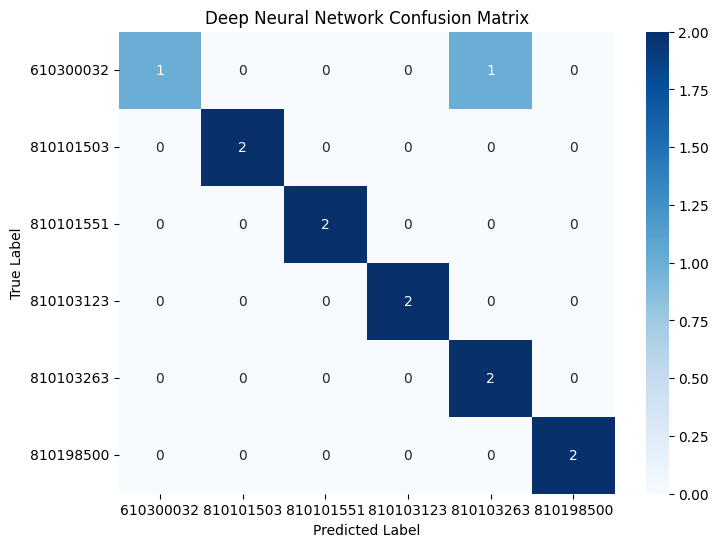


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


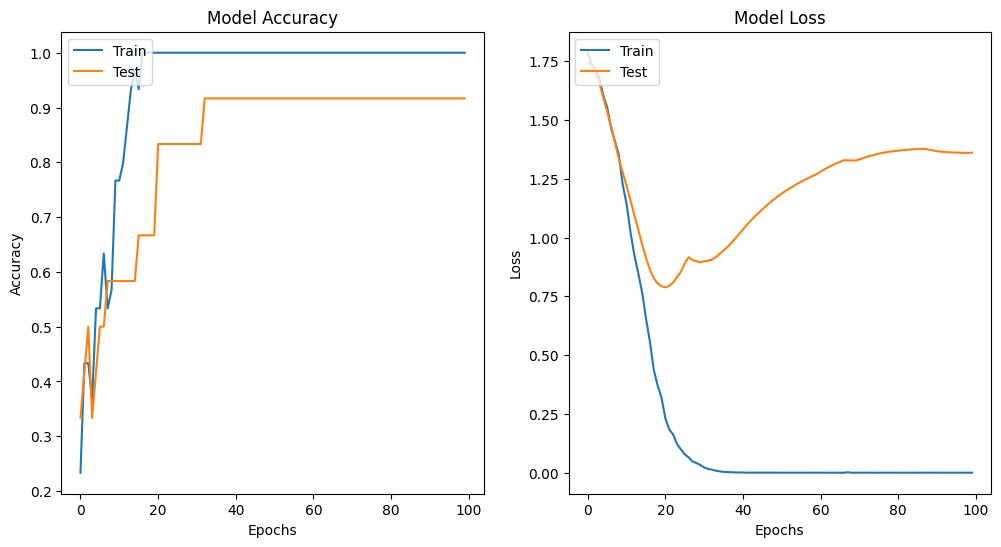

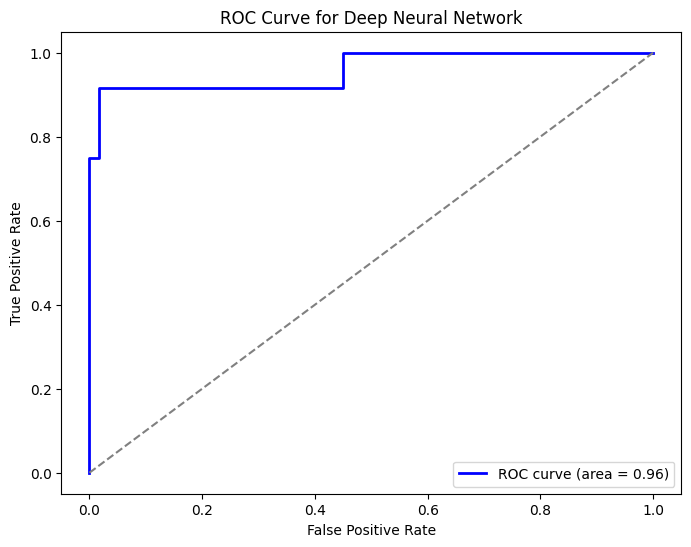


Results for DataFrame 2:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 3s - 3s/step - accuracy: 0.1667 - loss: 1.8102 - val_accuracy: 0.1667 - val_loss: 1.7506
Epoch 2/100
1/1 - 0s - 86ms/step - accuracy: 0.2000 - loss: 1.7595 - val_accuracy: 0.2500 - val_loss: 1.7028
Epoch 3/100
1/1 - 0s - 78ms/step - accuracy: 0.2000 - loss: 1.7021 - val_accuracy: 0.2500 - val_loss: 1.6547
Epoch 4/100
1/1 - 0s - 141ms/step - accuracy: 0.3667 - loss: 1.6328 - val_accuracy: 0.3333 - val_loss: 1.5964
Epoch 5/100
1/1 - 0s - 170ms/step - accuracy: 0.4667 - loss: 1.5672 - val_accuracy: 0.3333 - val_loss: 1.5408
Epoch 6/100
1/1 - 0s - 96ms/step - accuracy: 0.5000 - loss: 1.4895 - val_accuracy: 0.3333 - val_loss: 1.4827
Epoch 7/100
1/1 - 0s - 79ms/step - accuracy: 0.5000 - loss: 1.4099 - val_accuracy: 0.3333 - val_loss: 1.4204
Epoch 8/100
1/1 - 0s - 146ms/step - accuracy: 0.5333 - loss: 1.3087 - val_accuracy: 0.3333 - val_loss: 1.3609
Epoch 9/100
1/1 - 0s - 136ms/step - accuracy: 0.6000 - loss: 1.2322 - val_accuracy: 0.3333 - val_loss: 1.3022
Epoch 10/100
1/1 - 0s - 80ms/

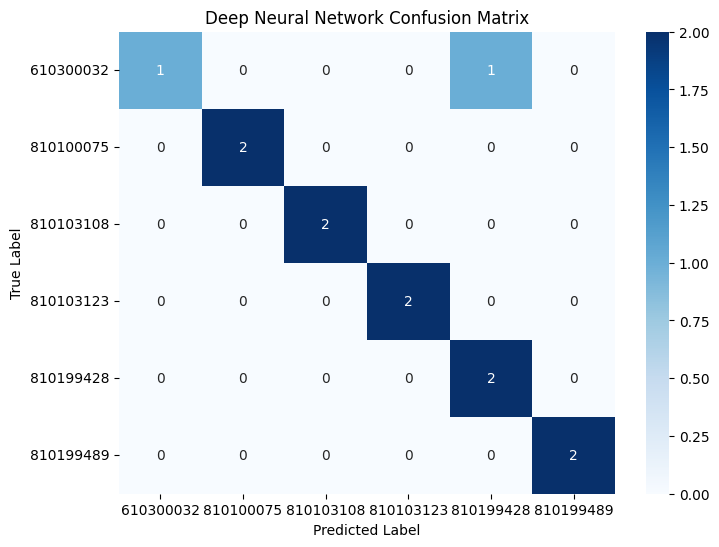


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


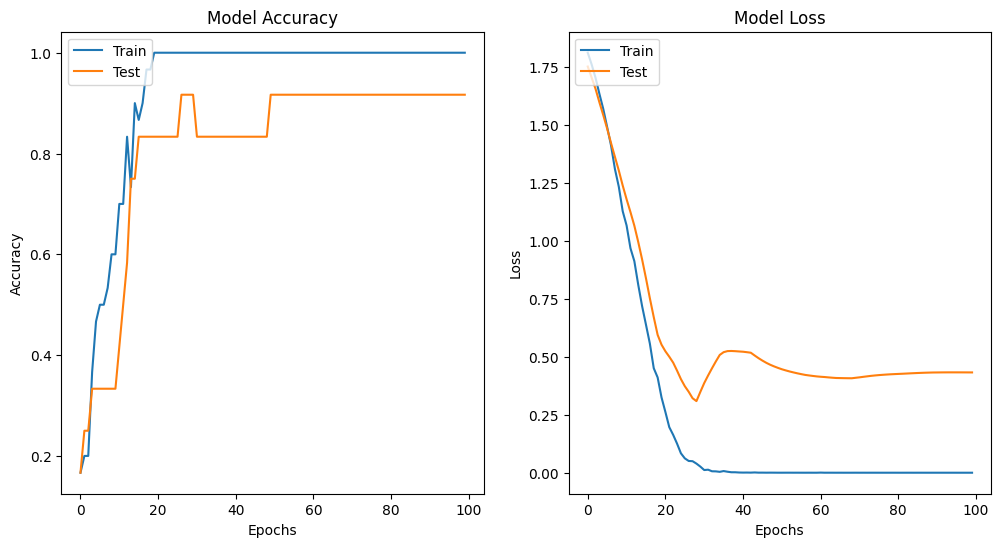

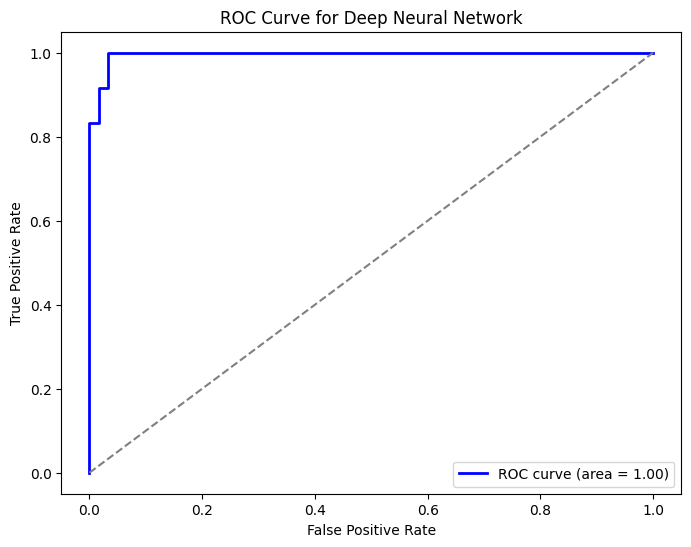


Results for DataFrame 3:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.1667 - loss: 1.8326 - val_accuracy: 0.3333 - val_loss: 1.7218
Epoch 2/100
1/1 - 0s - 177ms/step - accuracy: 0.1667 - loss: 1.7392 - val_accuracy: 0.3333 - val_loss: 1.6909
Epoch 3/100
1/1 - 0s - 304ms/step - accuracy: 0.3000 - loss: 1.6816 - val_accuracy: 0.5833 - val_loss: 1.6317
Epoch 4/100
1/1 - 0s - 153ms/step - accuracy: 0.5667 - loss: 1.6148 - val_accuracy: 0.6667 - val_loss: 1.5666
Epoch 5/100
1/1 - 0s - 144ms/step - accuracy: 0.6333 - loss: 1.5023 - val_accuracy: 0.6667 - val_loss: 1.5039
Epoch 6/100
1/1 - 0s - 168ms/step - accuracy: 0.7333 - loss: 1.4326 - val_accuracy: 0.6667 - val_loss: 1.4415
Epoch 7/100
1/1 - 0s - 139ms/step - accuracy: 0.7333 - loss: 1.3606 - val_accuracy: 0.6667 - val_loss: 1.3755
Epoch 8/100
1/1 - 0s - 98ms/step - accuracy: 0.7000 - loss: 1.2452 - val_accuracy: 0.7500 - val_loss: 1.2992
Epoch 9/100
1/1 - 0s - 134ms/step - accuracy: 0.7000 - loss: 1.1727 - val_accuracy: 0.7500 - val_loss: 1.2207
Epoch 10/100
1/1 - 0s - 86

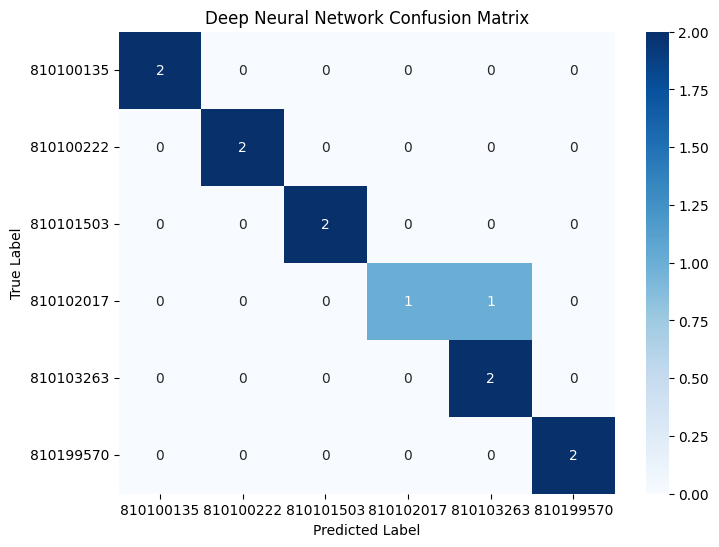


Precision (Macro Average): 0.94
Recall (Macro Average): 0.92
F1 Score (Macro Average): 0.91


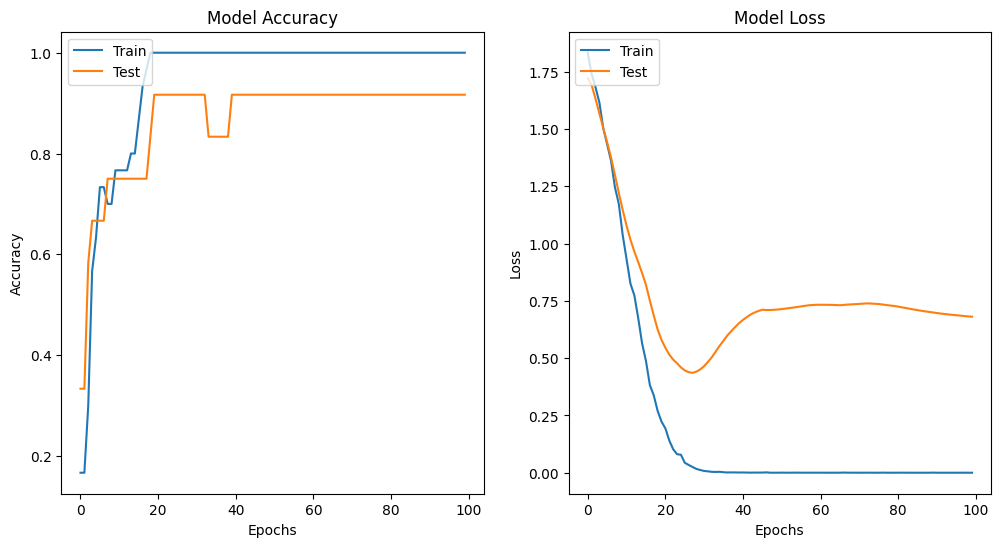

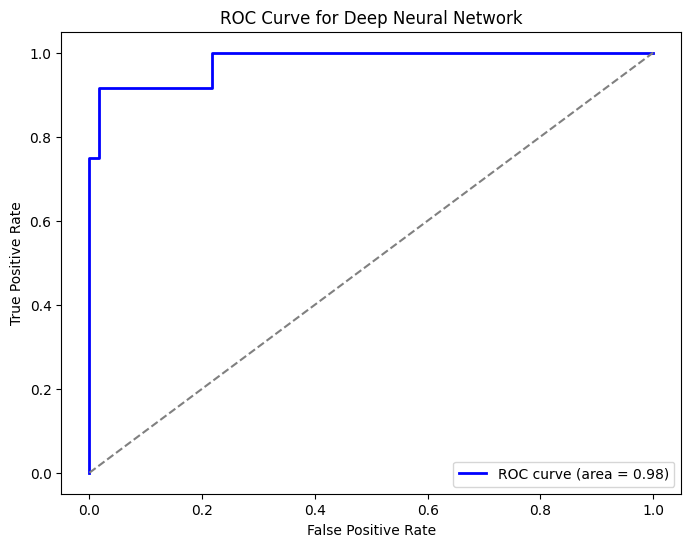

In [ ]:


def train_and_evaluate_dnn(df_train, df_test, le):
    X_train = df_train.drop(columns=['sid'])
    y_train = df_train['sid']
    X_test = df_test.drop(columns=['sid'])
    y_test = df_test['sid']

    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()

    model.add(Dense(units=512, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.2))

    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=128, activation='relu'))

    model.add(Dense(units=64, activation='relu'))

    model.add(Dense(units=32, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=len(np.unique(y_train_encoded)), activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=2)

    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nDeep Neural Network Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred))

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Deep Neural Network Confusion Matrix")
    plt.show()

    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')

    print(f"\nPrecision (Macro Average): {precision:.2f}")
    print(f"Recall (Macro Average): {recall:.2f}")
    print(f"F1 Score (Macro Average): {f1:.2f}")

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

        # Calculate ROC Curve and AUC
    y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))

    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Deep Neural Network')
    plt.legend(loc='lower right')
    plt.show()


le = LabelEncoder()

print("Results for DataFrame 1:")
train_and_evaluate_dnn(df1_train, df1_test, le)

print("\nResults for DataFrame 2:")
train_and_evaluate_dnn(df2_train, df2_test, le)

print("\nResults for DataFrame 3:")
train_and_evaluate_dnn(df3_train, df3_test, le)



1. **First model (with perfect accuracy)**
   - **Model Accuracy and Loss**: The training accuracy reaches a very high value of 1.0 very quickly and stays there. The loss function quickly drops to near 0, suggesting that the model has learned to perfectly fit the training data.
   - **Overfitting**: This indicates **overfitting**. While the model performs well on the training set, it seems to have memorized the data, which could result in poor generalization to unseen data.

2. **Second model (accuracy of 0.9167)**
   - **Model Accuracy and Loss**: The accuracy of the test set remains near 0.9, while the training accuracy is again very high at 1.0. The loss function for the test set stabilizes at a higher value than the training set, indicating that the model has some difficulty generalizing to unseen data.
   - **Overfitting**: The gap between the training and test performance suggests that this model is also **overfitting**. The model is likely too complex, fitting the training set very well but struggling to generalize to new, unseen data.
   - The **second model** demonstrates clear overfitting as it achieves **perfect accuracy** on the training set but struggles to perform consistently on the test set, where its accuracy and loss remain less favorable. This suggests that it has become too tailored to the training data and lacks the ability to generalize to new examples effectively.

3. **Third model (accuracy of 0.9167, noticeable fluctuation in loss)**
   - **Model Accuracy and Loss**: The accuracy shows a good performance, but the loss fluctuates dramatically on the test set, particularly towards the later stages of training.
   - **Overfitting**: The fluctuations in the test loss, combined with a high training accuracy, are a sign of **overfitting**. This is a clear indication that the model is not able to generalize as well to the test data as it can to the training data.
   - Similarly, in the **third model**, while there is a good performance on both training and test data, the fluctuating loss curves for the test data show that the model might be overfitting. This is especially indicated by a dramatic drop in the test loss early in the training process, followed by fluctuations, which suggests that while the model may fit the training data well, it isn't stabilizing on unseen data.

In conclusion:
- The models with accuracy of 1.0 (first and second) clearly demonstrate overfitting, as they perfectly memorize the training set but struggle with generalization.
- The third model, although performing well on both training and test data, also displays signs of **overfitting** due to the fluctuation in test loss as it trains.

### **Description of the Code:**

This code trains and evaluates a **Deep Neural Network (DNN)** on three different datasets. The model is trained using multiple hidden layers with dropout to reduce overfitting. The evaluation includes several performance metrics like **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, **F1 score (macro average)**, and visualization of the training history.

---

### **1. Import Libraries:**
it done before
---

### **2. Function Definition: `train_and_evaluate_dnn()`**
```python
def train_and_evaluate_dnn(df_train, df_test, le):
    ...
```
- **Purpose**: This function trains and evaluates a **Deep Neural Network (DNN)** on the provided training and test datasets. It handles data preprocessing, model definition, training, and evaluation.

**Steps inside the function**:
1. **Separate features (`X`) and target (`y`)**:
   - The features (`X_train`, `X_test`) and the target (`y_train`, `y_test`) are separated from the training and testing datasets.
   
2. **Encode the target variable**:
   - The target variable `sid` is encoded into integer labels using **`LabelEncoder`**.
   
3. **Feature scaling**:
   - **`StandardScaler`** is used to normalize the features to have zero mean and unit variance.

4. **Define the Deep Neural Network model**:
   - A **Sequential model** is defined with multiple hidden layers using the **ReLU activation function**.
   - **Dropout** is applied to reduce overfitting by randomly deactivating neurons during training.
   - The **output layer** uses **softmax activation** for multiclass classification.

5. **Compile the model**:
   - The model is compiled using the **Adam optimizer** with a learning rate of 0.001, and **sparse categorical cross-entropy loss** (for multiclass classification).

6. **Train the model**:
   - The model is trained for **100 epochs** using a **batch size of 32**, with validation performed on the test set.

7. **Evaluate the model**:
   - Predictions are made using the test set, and several performance metrics are computed:
     - **Accuracy**
     - **Classification Report** (precision, recall, F1 score)
     - **Confusion Matrix** (visualized as a heatmap)
     - **Additional Metrics** (precision, recall, and F1 score for multiclass classification)

---

### **3. Data Preparation:**
```python
X_train = df_train.drop(columns=['sid'])
y_train = df_train['sid']
X_test = df_test.drop(columns=['sid'])
y_test = df_test['sid']
```
- **Purpose**: Separates the features (`X_train`, `X_test`) and target (`y_train`, `y_test`) from the training and test datasets. `sid` is the target variable.

---

### **4. Label Encoding:**
```python
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
```
- **Purpose**: The target variable (`sid`) is encoded into integer labels using **`LabelEncoder`**.
  - `fit_transform` is applied on the training set to generate the label mapping.
  - `transform` is applied to the test set to ensure consistency in label encoding.

---

### **5. Feature Scaling:**
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
- **Purpose**: **Feature scaling** is applied using **`StandardScaler`** to normalize the features so that each feature has zero mean and unit variance, which helps improve model performance.

---

### **6. Define DNN Model:**
```python
model = Sequential()

model.add(Dense(units=512, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=len(np.unique(y_train_encoded)), activation='softmax'))
```
- **Purpose**: The **DNN model architecture** is defined using the **Sequential API** from Keras:
  - **Input Layer**: Takes input with the shape of the feature vector (`X_train_scaled`).
  - **Hidden Layers**: Several hidden layers with decreasing units (512, 256, 128, 64, 32, 16), using **ReLU activation**.
  - **Dropout**: Dropout layers are added after each hidden layer with a dropout rate of 0.2 to prevent overfitting.
  - **Output Layer**: The output layer has units equal to the number of classes in the target variable (`sid`) and uses **softmax activation** for multiclass classification.

---

### **7. Compile and Train the Model:**
```python
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_encoded), verbose=2)
```
- **Purpose**: The model is compiled using the **Adam optimizer** and **sparse categorical cross-entropy loss**. It is then trained for **100 epochs** with a **batch size of 32**, using the training data and validating on the test set.

---

### **8. Predictions and Evaluation:**
```python
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"\nDeep Neural Network Accuracy: {accuracy:.4f}")
```
- **Purpose**: The trained model makes predictions on the test set, and the **accuracy** is computed using **`accuracy_score`**.

---

### **9. Classification Report & Confusion Matrix:**
```python
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Deep Neural Network Confusion Matrix")
plt.show()
```
- **Purpose**: Displays the **classification report**, which includes **precision**, **recall**, and **F1 score** for each class, and the **confusion matrix** is visualized as a heatmap to understand the misclassifications.

---

### **10. Additional Evaluation Metrics (Macro Average):**
```python
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

print(f"\nPrecision (Macro Average): {precision:.2f}")
print(f"Recall (Macro Average): {recall:.2f}")
print(f"F1 Score (Macro Average): {f1:.2f}")
```
- **Purpose**: **Precision**, **Recall**, and **F1 score** are calculated using **macro average** to assess the overall performance across all classes equally.

---

### **11. Training History Visualization:**
```python
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
```
- **Purpose**: Visualizes the **training and validation accuracy** and **loss** over the epochs to monitor the model's performance during training.

---

### **Deep Neural Network (DNN) Algorithm Explanation**:

#### **What is a DNN?**
- A **Deep Neural Network (DNN)** consists of multiple layers between the input and output layers. DNNs are capable of learning complex patterns in large datasets and are widely used in tasks like classification and regression.

#### **How DNN Works**:
1. **Input Layer**: Receives the feature vector as input.
2. **Hidden Layers**: Each hidden layer consists of neurons connected to the previous layer. Each neuron applies an activation function, often **ReLU** for non-linearity.
3. **Output Layer**: The output layer has units corresponding to the number of classes in the target variable and uses **softmax activation** to generate class probabilities.
4. **Training**: The model is trained using **backpropagation** and **gradient descent** to minimize the loss function.

#### **Advantages of DNN**:
- **Powerful**: Can model complex relationships and perform well with large datasets.
- **Flexible**: Applicable to a wide range of tasks, from classification to image recognition.

#### **Disadvantages of DNN**:
- **Computationally expensive**: Requires significant computational resources, especially with large networks.
- **Overfitting**: Deep networks can overfit if not regularized properly (e.g., using dropout).

---

### **Conclusion:**

The **Deep Neural Network (DNN)** model was trained and evaluated on three datasets. The performance was assessed using various metrics like **accuracy**, **classification report**, **confusion matrix**, **precision**, **recall**, and **F1 score**. The confusion matrix and other evaluation metrics provide valuable insights into the model’s performance and misclassifications. Dropout layers helped reduce overfitting, while training history visualizations showed the improvement in both accuracy and loss over epochs.

We observe that as the depth of the neural network increases, the model's performance on the training data remains similar, but we don't see any significant improvement in test performance. This is likely due to overfitting. When a neural network becomes too deep, it has a higher capacity to memorize the training data, rather than generalizing well to unseen data. This can lead to the model fitting to the noise in the data, rather than capturing the underlying patterns, which results in stagnant or even deteriorating performance on the test set.









# **<font color='orange'>PART 4: Clustering</font>**

### <font color='cyan'>Load data and preprocessing</font>

In [ ]:
import os

In [ ]:
ID_csv_path = "student_ids2.csv"

if not os.path.exists("ID_csv_flag"):
    !gdown 1-EQN78KR6QOt_Xg7m7VQAW167XHWZsiq -O {ID_csv_path}
    !touch ID_csv_flag

First we load our data and see what cols we have

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv(ID_csv_path)
# Display first few rows
print(df.head())


   fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                  245.322778                 162.003087 -477.70400   
1                  244.396692                 162.754774 -475.60794   
2                  254.233823                 160.450528 -465.70276   
3                  245.286730                 160.919503 -466.47827   
4                  238.735277                 155.885061 -439.48868   

      mfcc_1    mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0  66.420870  2.784534  16.312914  17.179901 -3.995954 -5.740071 -5.211816   
1  65.909400  8.602053  21.342627   9.751506 -2.633782  1.902620 -6.713839   
2  60.698277  4.454276  18.877630  16.446712 -0.746425 -1.184447 -6.235757   
3  66.697930  4.836888  19.791077  18.170984  2.163354  2.917358 -3.333329   
4  71.102040  7.487395  18.102375  13.573537 -2.511184 -0.205113 -3.432934   

   ...  spectral_contrast_0  spectral_contrast_1  spectral_contrast_2  \
0  ...            16.108084    

As we can see there are some rows that shouldn't be used in our clustering and it doesn't describe the voice. So we drop these cols (sid, qnum, gender).

In [ ]:
# Drop specified columns
drop_cols = ["sid", "qnum", "gender"]
cleaned_data = df.drop(columns=drop_cols, errors='ignore')
print(cleaned_data.head())

   fundamental_frequency_mean  fundamental_frequency_std     mfcc_0  \
0                  245.322778                 162.003087 -477.70400   
1                  244.396692                 162.754774 -475.60794   
2                  254.233823                 160.450528 -465.70276   
3                  245.286730                 160.919503 -466.47827   
4                  238.735277                 155.885061 -439.48868   

      mfcc_1    mfcc_2     mfcc_3     mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0  66.420870  2.784534  16.312914  17.179901 -3.995954 -5.740071 -5.211816   
1  65.909400  8.602053  21.342627   9.751506 -2.633782  1.902620 -6.713839   
2  60.698277  4.454276  18.877630  16.446712 -0.746425 -1.184447 -6.235757   
3  66.697930  4.836888  19.791077  18.170984  2.163354  2.917358 -3.333329   
4  71.102040  7.487395  18.102375  13.573537 -2.511184 -0.205113 -3.432934   

   ...  chroma_features_9  chroma_features_10  chroma_features_11  \
0  ...           0.298819          

Before we normalize the data we handle inf data and missing values by replacing them into mean value.

In [ ]:
import numpy as np

cleaned_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
mean_value = cleaned_data.mean(skipna=True)  # Compute mean, ignoring NaN values
cleaned_data.fillna(mean_value, inplace=True)  # Replace NaN values with mean

Now, we should standardize the dataset. If we don't do that, the distance between features with larger magnitudes will have a greater impact on our clustering and also we can't use PCA correctly.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Find the numerical features
num_features = cleaned_data.select_dtypes(include=["int64", "float64"]).columns
# Use StandardScaler to standardize the numerical features
scaler = StandardScaler()
cleaned_data[num_features] = scaler.fit_transform(cleaned_data[num_features])

print(cleaned_data.head)

<bound method NDFrame.head of      fundamental_frequency_mean  fundamental_frequency_std    mfcc_0  \
0                     -0.466875                   0.802033 -0.799797   
1                     -0.498426                   0.835090 -0.731995   
2                     -0.163288                   0.733756 -0.411590   
3                     -0.468103                   0.754380 -0.436676   
4                     -0.691303                   0.532979  0.436362   
..                          ...                        ...       ...   
121                    0.597380                  -0.377970  0.474309   
122                    1.247145                  -0.546840  0.369689   
123                    1.411294                  -1.242176 -0.165475   
124                    0.893965                  -1.229452  0.792733   
125                    0.652865                  -0.521686  1.007831   

       mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0   -0.454541 -1.132948  0.2

We use PCA to reduce dimentions. Here is a brief explanation about why we use PCA and how it works

**Principal Component Analysis (PCA)** is used to **reduce the dimensionality** of a dataset while preserving as much variance as possible. This helps in:  
- **Improving computational efficiency** by reducing feature space.  
- **Reducing noise and redundancy** by eliminating less informative dimensions.  
- **Visualizing high-dimensional data** in 2D or 3D.  
- **Improving model performance** by removing correlated features.

PCA transforms the original features into a **new set of orthogonal axes (principal components)** ranked by the amount of variance they capture. The steps are:  
1. **Standardize the data** (mean = 0, variance = 1).  
2. **Compute the covariance matrix** to find relationships between features.  
3. **Find eigenvectors & eigenvalues** to determine principal components.  
4. **Project data onto the top principal components** to reduce dimensionality.  

This results in a lower-dimensional representation while retaining the most important information.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% variance
cleaned_data = pca.fit_transform(cleaned_data)
print(cleaned_data.shape)

(126, 19)


As you can see now we have 19 features for each data after applying PCA.

### <font color='cyan'>Finding best number of clusters</font>

For finding the best number of clusters we can use K-Means clustering and then we calculate the silhouette score. We have to do that for a range of cluster numbers to see which one has the higher silhouette score. Then we can say it is a good number of clusters. As you can see the best number of clusters is 13 based on this method.

The **Silhouette Score** is a metric used to evaluate the quality of clustering results. It measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from **-1 to 1**:

- **1** → Well-clustered (points are close to their own cluster and far from others).  
- **0** → Overlapping clusters (points are on the decision boundary).  
- **-1** → Poor clustering (points are assigned to the wrong cluster).  

It is calculated as:  
$$
S = \frac{b - a}{\max(a, b)}
$$
where:  
- **a** = average intra-cluster distance (within-cluster dissimilarity)  
- **b** = average nearest-cluster distance (inter-cluster dissimilarity)  

A **higher silhouette score** indicates better clustering.

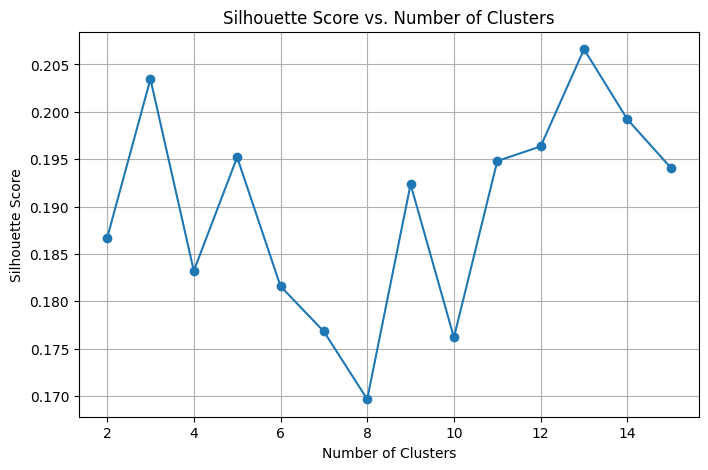

Optimal Number of Clusters: 13 with a Silhouette Score of 0.2066


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_clusters(X, min_clusters=2, max_clusters=10):
    best_score = -1
    best_n_clusters = None
    scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(range(min_clusters, max_clusters + 1), scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.grid(True)
    plt.show()

    return best_n_clusters, best_score

# Find the best number of clusters
best_n_clusters, best_score = find_best_clusters(cleaned_data, max_clusters= 15)

print(f"Optimal Number of Clusters: {best_n_clusters} with a Silhouette Score of {best_score:.4f}")



We also use the elbow method to find the best number of clusters. The Elbow curve below, confirms that 13 clusters is a good number of clusters. There is some more information about this method:

The **Elbow Method** is a technique used to determine the optimal number of clusters (**K**) in **K-Means clustering**. It helps identify the point where adding more clusters no longer significantly improves clustering performance.

1. Compute **K-Means** for a range of **K** values (e.g., 1 to 10).
2. Calculate the **Within-Cluster Sum of Squares (WCSS)** for each **K**:
   \[
   WCSS = \sum \sum ||x_i - c_k||^2
   \]
   where \( x_i \) is a data point, and \( c_k \) is the cluster center.
3. Plot **WCSS vs. K**.
4. Identify the **"elbow point"**, where the rate of WCSS reduction slows down.

- The **elbow point** is the ideal number of clusters, balancing model complexity and performance.
- More clusters beyond this point lead to **diminishing returns**.

It’s a visual heuristic and works best when the elbow is clearly defined.

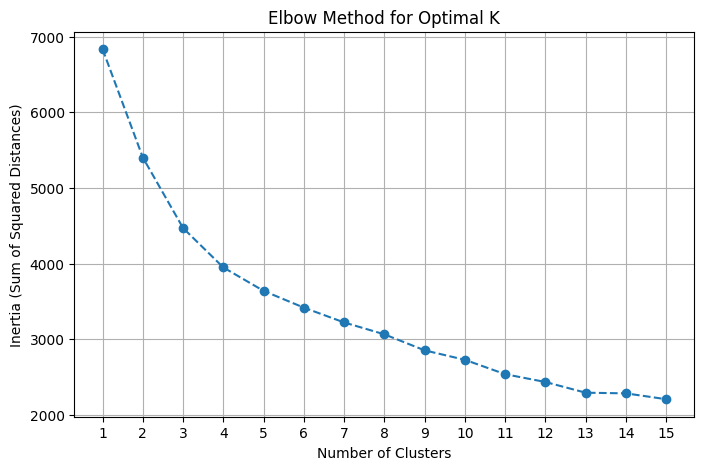

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def compute_elbow_method(X, max_clusters=10):
    # Compute inertia for different cluster numbers
    inertia = []
    cluster_range = range(1, max_clusters+1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method for Optimal K')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()


compute_elbow_method(cleaned_data, max_clusters=15)


So now we know the best number of clusters is 13

In [ ]:
best_n_clusters= 13

### <font color='cyan'>First method clustering: K-Means clustering</font>



**K-Means** is a **centroid-based clustering algorithm** that partitions data into **K clusters** by minimizing the variance within each cluster. It works iteratively by:  
1. **Initializing K centroids** randomly.  
2. **Assigning each data point** to the nearest centroid.  
3. **Updating centroids** by computing the mean of all assigned points.  
4. **Repeating** until convergence (no significant centroid changes).  

It is efficient for **large datasets**, but requires **predefining K** and can be sensitive to initial centroid placement.

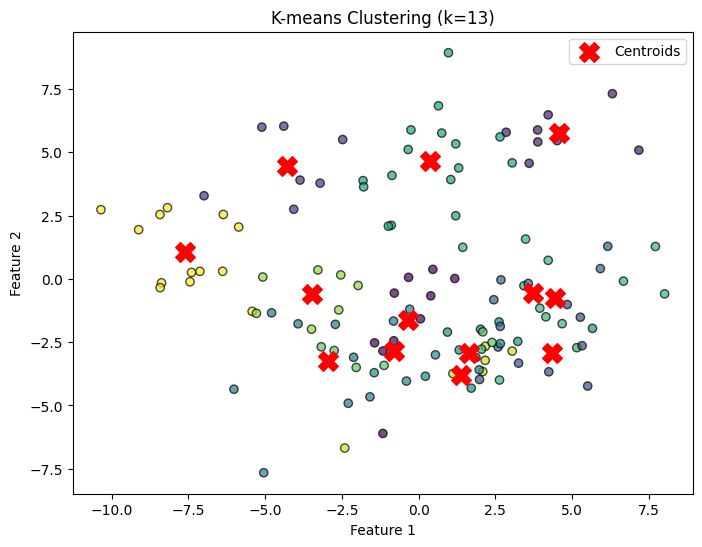

In [ ]:
# Make a copy of cleaned data
X = cleaned_data.copy()

# Ensure X is a NumPy array and has the correct shape
X = np.array(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].astype(float), X[:, 1].astype(float), c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-means Clustering (k={best_n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



As you can see some of the centroids are far from each other in this plot but some of them are close. The reason is that they probably have more distance form each other in other dimentions. We will see this in next blocks

There are K-Means clustering with 2 other number of clusters

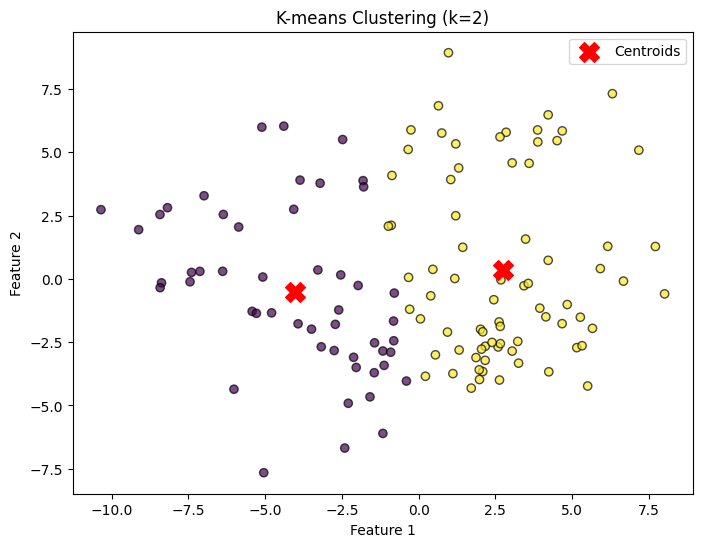

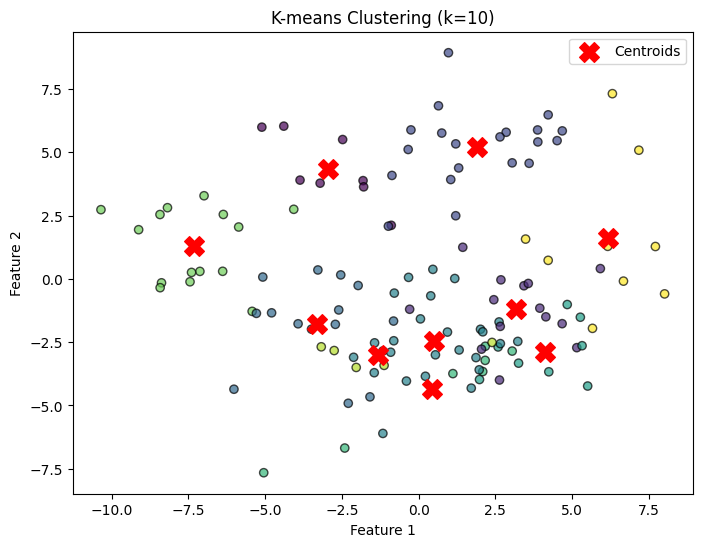

In [ ]:
# Make a copy of cleaned data
X = cleaned_data.copy()

# Ensure X is a NumPy array and has the correct shape
X = np.array(X)

n_clusters = [2, 10]
for n in n_clusters:
    # Apply K-means clustering with 2 other numbers
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0].astype(float), X[:, 1].astype(float), c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f"K-means Clustering (k={n})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

As you can see when we have 2 clusters the intera distance is very high and we even in 10 clusters the intera distance in some clusters are too much. We will check these things in next blocks.

There is a function to evaluate our clustering by calculating following metrics

1. **Silhouette Score**  
   Measures how well-separated each data point is from points in other clusters. It ranges from -1 to 1. Higher values indicate that points are well-clustered, while values close to 0 suggest overlapping clusters.  

2. **Davies-Bouldin Index**  
   Evaluates how similar each cluster is to the most similar one by considering the ratio of within-cluster scatter to between-cluster separation. A lower value indicates better clustering.  

3. **Calinski-Harabasz Index**  
   Measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate well-separated and compact clusters.  

4. **Intra-cluster Distance**  
   Calculates the average distance between data points within the same cluster. Lower values suggest that the points within a cluster are closely packed.  

5. **Inter-cluster Distance**  
   Computes the distances between cluster centroids. Higher values indicate better separation between clusters.  

Each metric provides a different perspective on clustering quality, and their effectiveness depends on the clustering algorithm and data distribution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def evaluate_cluster_similarity(X, n_clusters=4):
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

     # Compute Evaluation Metrics
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")

    # Compute intra-cluster distances (within each cluster)
    intra_cluster_distances = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        centroid = centers[i]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        intra_cluster_distances.append(np.mean(distances))

    # Compute inter-cluster distances (between cluster centers)
    inter_cluster_distances = pairwise_distances(centers, metric='euclidean')
    np.fill_diagonal(inter_cluster_distances, np.nan)  # Ignore self-distances

    # Print results
    print(f'Intra-cluster distances (mean distance within each cluster):')
    for i, dist in enumerate(intra_cluster_distances):
        print(f'Cluster {i}: {dist:.4f}')

    print('\nInter-cluster distances (distance between cluster centers):')
    print(inter_cluster_distances)

    # Plot intra-cluster distances
    plt.figure(figsize=(8, 5))
    plt.bar(range(n_clusters), intra_cluster_distances, color='skyblue')
    plt.xlabel('Cluster Index')
    plt.ylabel('Mean Intra-cluster Distance')
    plt.title('Average Intra-cluster Distances')
    plt.xticks(range(n_clusters))
    plt.show()


Evaluating clustering for the best number of clusters. As we know it has the best silhouette score. We will compare the Davies-Bouldin Index and Calinski-Harabasz Index with other number of clusters at the end.

As you can see the intra cluster distances are lower than 5 and the max is 4.65. And the min is 2.6 so the data points in each cluster has a good similarity to other data points in this cluster.

The inter cluster distances shows that the clusters are not that much similar to each other but some clusters are close to each other even when we used the best number of clusters.

Silhouette Score: 0.2066 (Higher is better)
Davies-Bouldin Index: 1.4682 (Lower is better)
Calinski-Harabasz Index: 18.6566 (Higher is better)
Intra-cluster distances (mean distance within each cluster):
Cluster 0: 4.4049
Cluster 1: 4.1092
Cluster 2: 4.2887
Cluster 3: 3.3897
Cluster 4: 3.7234
Cluster 5: 4.6579
Cluster 6: 4.2027
Cluster 7: 4.2574
Cluster 8: 4.4717
Cluster 9: 4.3533
Cluster 10: 2.6048
Cluster 11: 3.3264
Cluster 12: 4.0816

Inter-cluster distances (distance between cluster centers):
[[        nan 10.08005395  8.48791457  6.75991975  7.72457713  6.81811417
   4.90785235  7.66403386  6.67790695  7.11423077  6.13773933  8.99730017
   8.6067235 ]
 [10.08005395         nan 10.49231015 10.97605172  8.23386405 12.10979076
  10.09967663  5.52308495  7.67389804 12.0712838  11.5340447  11.21354136
  13.48115637]
 [ 8.48791457 10.49231015         nan 12.17765465 10.468925    9.28004997
  10.47098828  6.46424508 10.70630922  9.98422251  7.98169113 13.0380594
   5.89209986]
 [ 6.75991

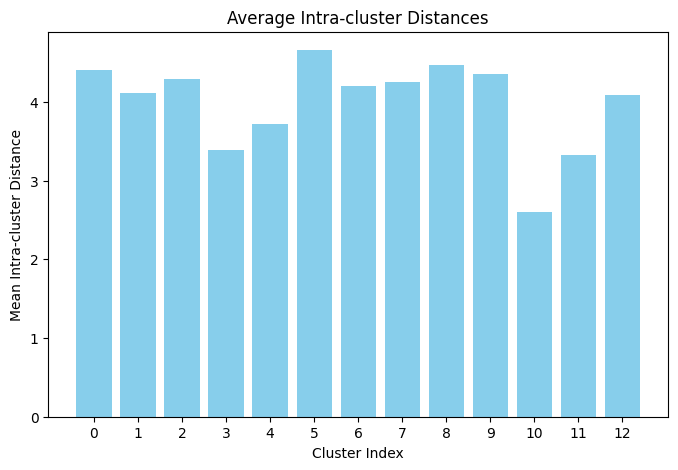

In [ ]:
X = cleaned_data.copy()
X = np.array(X)
evaluate_cluster_similarity(X, n_clusters=best_n_clusters)

Evaluating clustering for 2 clusters.

The inter cluster distances shows that the clusters are not similar at all but the intera cluster distance shows that the data points in each cluster are also not similar to the other data points in this cluster so as we expected 2 clusters isn't a good number for clustering this data

Silhouette Score: 0.1867 (Higher is better)
Davies-Bouldin Index: 1.8598 (Lower is better)
Calinski-Harabasz Index: 32.8813 (Higher is better)
Intra-cluster distances (mean distance within each cluster):
Cluster 0: 6.4018
Cluster 1: 6.3722

Inter-cluster distances (distance between cluster centers):
[[       nan 6.86840482]
 [6.86840482        nan]]


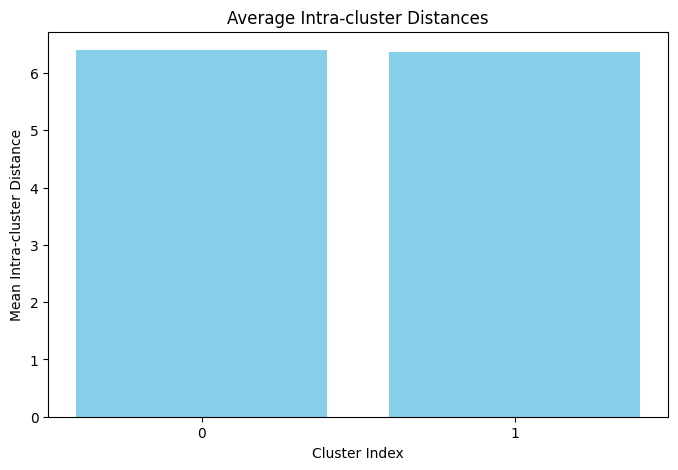

In [ ]:
X = cleaned_data.copy()
X = np.array(X)
evaluate_cluster_similarity(X, n_clusters=2)

Evaluate clustering for 10 clusters

The Intra cluster distances is good but totaly it is worse than the 13 clusters.

The inter cluster distances shows that the distance between the clusters is better than the 13 clusters but it causes that the Intra cluster distance be higher so the best number of clustering is still 13 and we choose correctly.

Silhouette Score: 0.1762 (Higher is better)
Davies-Bouldin Index: 1.5315 (Lower is better)
Calinski-Harabasz Index: 19.4088 (Higher is better)
Intra-cluster distances (mean distance within each cluster):
Cluster 0: 3.7900
Cluster 1: 4.2654
Cluster 2: 4.5433
Cluster 3: 4.6480
Cluster 4: 5.0192
Cluster 5: 3.8653
Cluster 6: 4.0745
Cluster 7: 4.4715
Cluster 8: 3.4221
Cluster 9: 5.2519

Inter-cluster distances (distance between cluster centers):
[[        nan  8.75243712  6.28370836  7.23141396  8.30481647 10.99431962
  12.08443741  6.26621055  9.92978671 10.10952952]
 [ 8.75243712         nan  7.51924415  7.23770289  5.19104352  6.08899771
   7.88020944 11.33291285  7.92152671  5.40232095]
 [ 6.28370836  7.51924415         nan  9.00748862  8.35718391 10.15956913
  11.00813883 10.56556485 11.29355997  6.54767677]
 [ 7.23141396  7.23770289  9.00748862         nan  5.19537278  9.82180354
   7.33727668  6.50155631  7.69397133 10.71697644]
 [ 8.30481647  5.19104352  8.35718391  5.19537278      

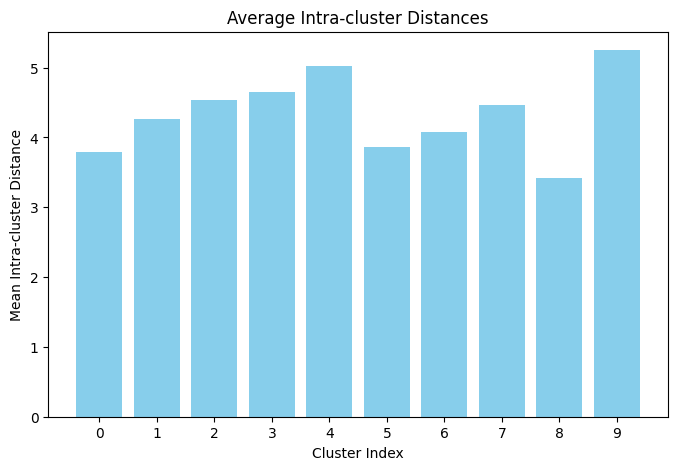

In [ ]:
X = cleaned_data.copy()
X = np.array(X)
evaluate_cluster_similarity(X, n_clusters=10)

At the end as we can see the 13 clusters has best silhouette score and Davis-Bouldin index because our goal was to find the best number of clusters so that the clusters have a good similarity to each other but because as we use more clusters the clusters get close to each other so we have lower Calinski-Harabasz Index.

As I said my goal was to find the best clustering so that the clusters has as similar as it is possible data points so that they have enough data points in them. In this case 13 clusters seems right and the clusters based on our data should be the voices of each sid in these clusters but the voices which are more similar gets into a cluster or separated in some clusters.

### <font color='cyan'>Second method clustering: Agglomerative Clustering</font>

Agglomerative Clustering is a bottom-up hierarchical clustering method that starts with each data point as its own cluster and iteratively merges the closest clusters until a stopping criterion is met (e.g., a specified number of clusters or a distance threshold). It uses different linkage criteria (such as single, complete, average, or Ward’s linkage) to determine cluster distances. The result can be visualized using a dendrogram, which shows the hierarchy of cluster merging.

#### Linkage methods:

#### **1. Single Linkage (Minimum Linkage)**
- **Definition**: The distance between two clusters is defined as the **minimum** distance between any two points (one from each cluster).
- **Effect**: Forms **long, chain-like clusters**, which can be sensitive to outliers.
- **Best for**: Detecting elongated or irregular-shaped clusters.

**Formula**:  
$$
d(A, B) = \min(d(x, y)), \quad x \in A, \quad y \in B
$$

where \( d(x, y) \) is the Euclidean distance between points $( x $) and $( y $).

**Drawback**: Can result in the **"chaining effect"** where distant points are merged into the same cluster.

---

#### **2. Complete Linkage (Maximum Linkage)**
- **Definition**: The distance between two clusters is defined as the **maximum** distance between any two points (one from each cluster).
- **Effect**: Creates **compact, spherical clusters** by avoiding merging distant points too early.
- **Best for**: Clusters with similar sizes and well-separated groups.

**Formula**:  
$$
d(A, B) = \max(d(x, y)), \quad x \in A, \quad y \in B
$$

**Drawback**: Can force **small clusters** even when larger natural clusters exist.

---

#### **3. Average Linkage (UPGMA - Unweighted Pair Group Method with Arithmetic Mean)**
- **Definition**: The distance between two clusters is the **average pairwise distance** between points in the two clusters.
- **Effect**: A balance between single and complete linkage.
- **Best for**: Stable clustering, avoiding chaining and overly compact clusters.

**Formula**:  
$$
d(A, B) = \frac{1}{|A| |B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
$$
where $( |A| $) and $( |B| $) are the number of points in clusters A and B.

**Drawback**: Still sensitive to outliers but less so than single linkage.

#### **4. Ward’s Linkage (Minimum Variance Method)**
- **Definition**: Instead of using distances, this method minimizes the **increase in total variance** when merging two clusters.
- **Effect**: Tends to produce **compact, spherical clusters**, similar to k-means clustering.
- **Best for**: Clustering datasets where natural compact groups exist.

**Formula** (for merging clusters A and B):
$$
d(A, B) = \sum_{x \in A \cup B} ||x - \mu_{A \cup B}||^2 - \sum_{x \in A} ||x - \mu_A||^2 - \sum_{x \in B} ||x - \mu_B||^2
$$
where $( \mu_A )$ and $( \mu_B )$ are the centroids of clusters A and B.

**Drawback**: Computationally expensive for large datasets.

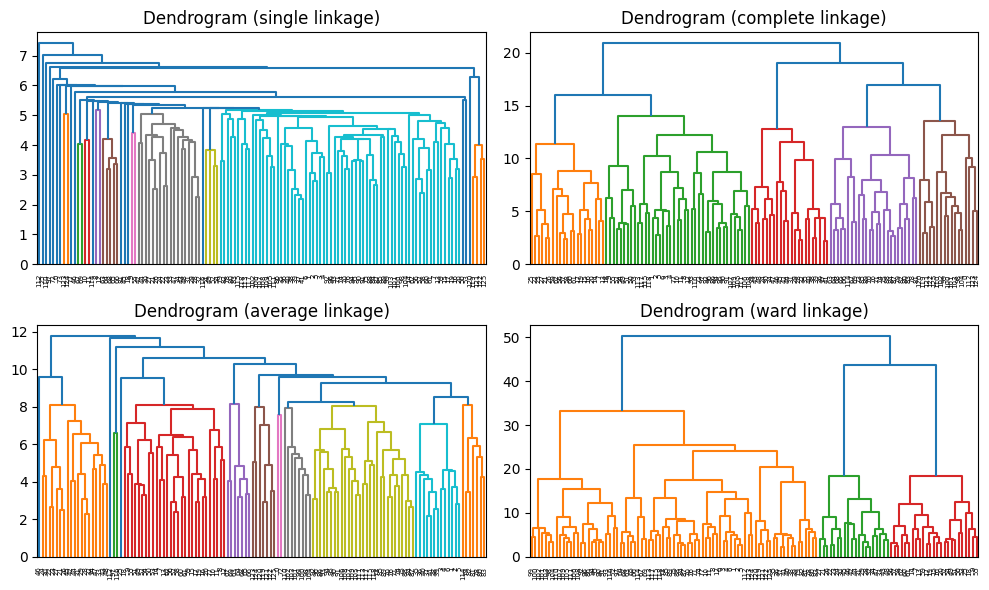

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Perform hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(10, 6))
for i, method in enumerate(linkage_methods):
    Z = linkage(cleaned_data, method=method)

    plt.subplot(2, 2, i + 1)
    dendrogram(Z)
    plt.title(f"Dendrogram ({method} linkage)")

plt.tight_layout()
plt.show()




Based on dendrograms and upper explanations we used complete ward for our clustering because as you can see in dendroograms it does it job more balanced in this data set and the number of optimal clusters in this method is around 13 based on its dendrogram (enough clusters and enough distance between clusters when we have 13 clusters in dendrogram).

Now we do the clustering with last 3 number of clusters and complete

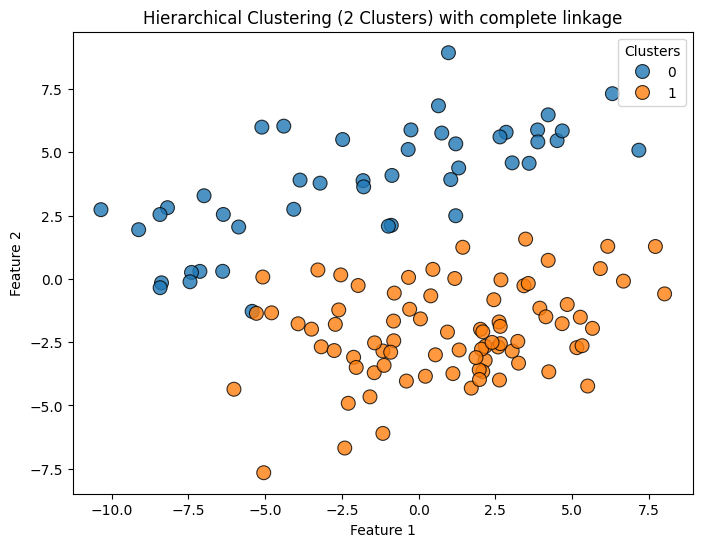

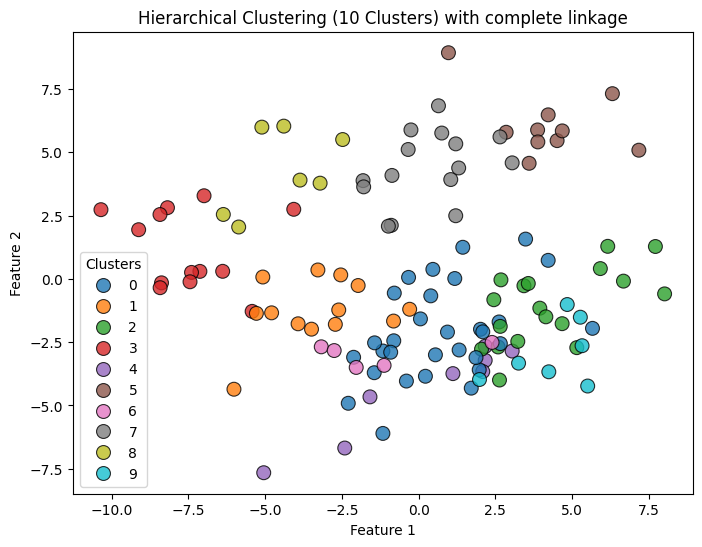

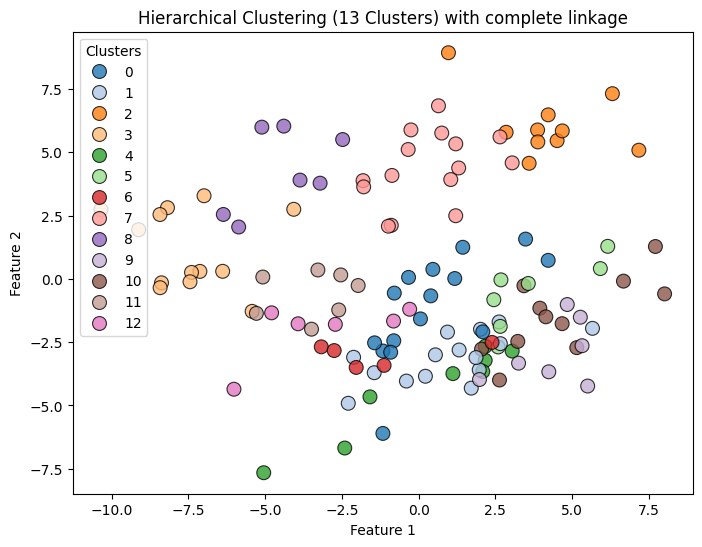

In [ ]:
n_clusters = [2, 10, best_n_clusters]
for n in n_clusters:
    # Apply Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = model.fit_predict(cleaned_data)

    # Use a color palette that supports multiple clusters
    palette = sns.color_palette("tab10", n) if n <= 10 else sns.color_palette("tab20", n)

    # Visualize clusters
    plt.figure(figsize=(8, 6))

    sns.scatterplot(x=cleaned_data[:, 0],
                    y=cleaned_data[:, 1],
                    hue=labels,
                    palette=palette,
                    s=100,
                    edgecolor='k',
                    alpha=0.8)

    plt.title(f"Hierarchical Clustering ({n} Clusters) with complete linkage")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Clusters")
    plt.show()

As you can see in the lower number of clusters we have total different result from K-Means and it's because how each of these to methods work but when we increase the number of clusters we get more similar results.

Now we define the evaluation function its reports the same as our evaluation function in last method but it uses Agglomerative clustering.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances

def evaluate_cluster_similarity_V2(X, n_clusters=4):
    # Apply Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X)

    # Compute Evaluation Metrics
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")

    # Compute intra-cluster distances
    cluster_centers = np.array([cleaned_data[labels == i].mean(axis=0) for i in range(n_clusters)])
    intra_cluster_distances = [
        np.mean(np.linalg.norm(cleaned_data[labels == i] - cluster_centers[i], axis=1)) for i in range(n_clusters)
    ]

    # Compute inter-cluster distances
    inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
    np.fill_diagonal(inter_cluster_distances, np.nan)  # Ignore self-distances

    print("\nIntra-cluster Distances (Lower is better):")
    for i, dist in enumerate(intra_cluster_distances):
        print(f"Cluster {i}: {dist:.4f}")

    print("\nInter-cluster Distances (Higher is better):")
    print(inter_cluster_distances)

    # Plot intra-cluster distances
    plt.figure(figsize=(8, 5))
    plt.bar(range(n_clusters), intra_cluster_distances, color='skyblue')
    plt.xlabel('Cluster Index')
    plt.ylabel('Mean Intra-cluster Distance')
    plt.title('Average Intra-cluster Distances')
    plt.xticks(range(n_clusters))
    plt.show()


Now we evaluate our clustering for different number of clusters starting with 13 clusters so it has the best silhouette score. The Intra cluster distances are good but not as good as the K-means method. But considering that this method works based on Inter cluster distances the clusters are far enough from each other.

Silhouette Score: 0.2003 (Higher is better)
Davies-Bouldin Index: 1.4745 (Lower is better)
Calinski-Harabasz Index: 18.2451 (Higher is better)

Intra-cluster Distances (Lower is better):
Cluster 0: 5.1428
Cluster 1: 4.1438
Cluster 2: 4.5596
Cluster 3: 4.4203
Cluster 4: 4.5256
Cluster 5: 3.7234
Cluster 6: 3.4221
Cluster 7: 4.0170
Cluster 8: 3.3961
Cluster 9: 3.3897
Cluster 10: 4.2860
Cluster 11: 2.6048
Cluster 12: 3.7354

Inter-cluster Distances (Higher is better):
[[        nan  4.52810754  8.92331106  8.88618871  7.97106929  6.71164148
   7.73980689  6.63814599  8.69449898  6.38308123  6.2586647   6.26438112
   6.74342236]
 [ 4.52810754         nan 10.45996127 10.16708831  7.15287478  6.98110246
   8.43328791  8.08005778 10.02497782  6.12177901  5.5176901   7.44364628
   6.18289179]
 [ 8.92331106 10.45996127         nan 13.23122838 12.02724244  8.13011708
  12.9086862   5.28604759  9.99564884 11.01972807  8.77468252 11.29050444
  11.55769175]
 [ 8.88618871 10.16708831 13.23122838     

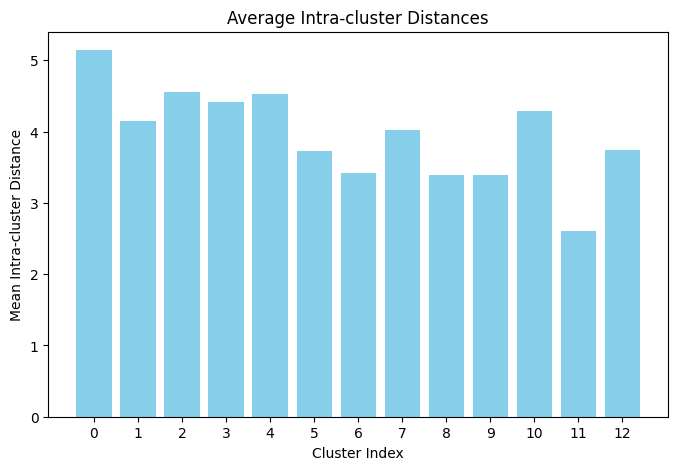

In [ ]:
X = cleaned_data.copy()

X = np.array(X)
evaluate_cluster_similarity_V2(X, n_clusters=best_n_clusters)

Evaluating clustering for 2 clusters.

The inter cluster distances shows that the clusters are not similar at all but the intera cluster distance shows that the data points in each cluster are also not similar to the other data points in this cluster so as we expected 2 clusters isn't a good number for clustering this data. The metrics result is as the same as K-Means but the clustering differs based on upper plots.

Silhouette Score: 0.1915 (Higher is better)
Davies-Bouldin Index: 1.9601 (Lower is better)
Calinski-Harabasz Index: 28.1776 (Higher is better)

Intra-cluster Distances (Lower is better):
Cluster 0: 6.6331
Cluster 1: 6.3293

Inter-cluster Distances (Higher is better):
[[       nan 6.61318055]
 [6.61318055        nan]]


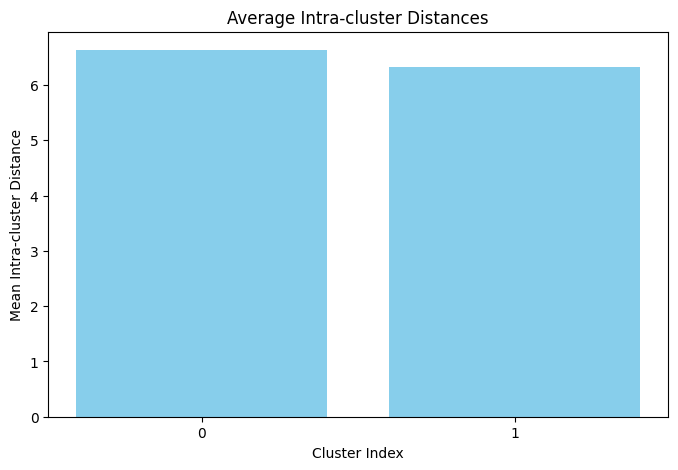

In [ ]:
X = cleaned_data.copy()
X = np.array(X)
evaluate_cluster_similarity_V2(X, n_clusters=2)

Evaluate clustering for 10 clusters

The Intra cluster distances is good but totaly it is worse than the 13 clusters if we consider the average.

The inter cluster distances shows that the distance between the clusters is better than the 13 clusters as we could see in the dendrogram but based on our definition of enough inter cluster distance the 13 cluster has enough inter cluster distance and it hase more balance between Intra cluster distances and Inter cluster distances.

Silhouette Score: 0.1717 (Higher is better)
Davies-Bouldin Index: 1.5425 (Lower is better)
Calinski-Harabasz Index: 19.1892 (Higher is better)

Intra-cluster Distances (Lower is better):
Cluster 0: 5.1776
Cluster 1: 4.5605
Cluster 2: 4.8061
Cluster 3: 4.4203
Cluster 4: 4.5256
Cluster 5: 4.5596
Cluster 6: 3.4221
Cluster 7: 4.0170
Cluster 8: 3.3961
Cluster 9: 3.3897

Inter-cluster Distances (Higher is better):
[[        nan  5.34132809  5.26062409  9.275833    7.22667573  9.45474461
   7.77087758  7.0391916   9.10611371  5.82958083]
 [ 5.34132809         nan  8.2562988   6.63436858  7.13582976 10.91559369
   7.59179132  7.28670141  6.82303627 10.09182788]
 [ 5.26062409  8.2562988          nan 12.46981003  8.49461068  8.12716824
   8.79767589  7.73497057 10.59337652  5.59093727]
 [ 9.275833    6.63436858 12.46981003         nan 11.75469303 13.23122838
  10.60007506  9.23012803  6.0668858  13.20879089]
 [ 7.22667573  7.13582976  8.49461068 11.75469303         nan 12.02724244
  10.19376224 

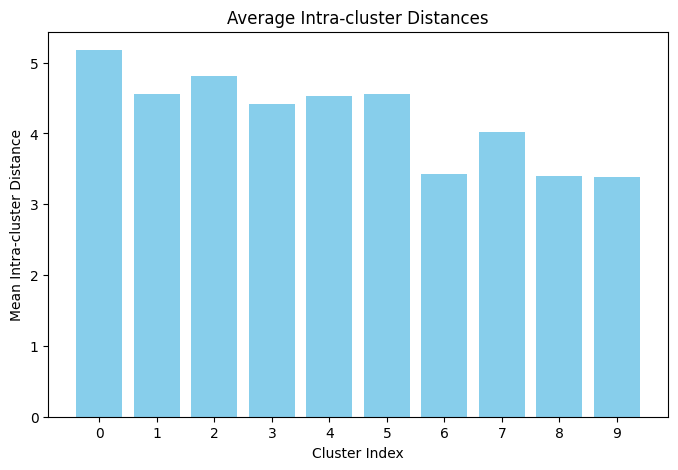

In [ ]:
X = cleaned_data.copy()
X = np.array(X)
evaluate_cluster_similarity_V2(X, n_clusters=10)

At the end as we can see the 13 clusters has best silhouette score and Davis-Bouldin index because our goal was to find the best number of clusters so that the clusters have a good similarity to each other but because as we use more clusters the clusters get close to the bottom of dendrogram.

The point in choosing number of clusters is that we respect the balance between the Intra and Inter cluster distances and in our observations with 13 clusters has the best balance for this data set.